<a href="https://colab.research.google.com/github/fireteamtorch/genshin_survey_analysis/blob/main/Vol.%204/GenshinSurveyVol4Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import itertools
import warnings

In [ ]:
sheet_id = '1vSqKOweBrYfzE1KK27i78TUmz3xeGWsQGnwtgBvh8pU'
sheet_name_rank = 'CharacterRanks'
sheet_name_meta = 'CharacterData'
url_rank = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name_rank}'
url_meta = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name_meta}'

In [ ]:
pdf_rank_raw = pd.read_csv(url_rank)
pdf_meta_raw = pd.read_csv(url_meta)

In [ ]:
char_names_dict = {
    'Yunjin' : 'Yun Jin',
    'Arataki Itto' : 'Itto',
    'Arleccino' : 'Arlecchino',
    'Candice' : 'Candace',
    'Chevereuse' : 'Chevreuse',
    'Childe' : 'Tartaglia',
    'Fischel' : 'Fischl',
    'Goro' : 'Gorou',
    'Kaedehara Kazuha' : 'Kazuha',
    'Kamisato Ayaka' : 'Ayaka',
    'Kamisato Ayato' : 'Ayato',
    'Kazhua' : 'Kazuha',
    'Kiara' : 'Kirara',
    'Kujou Sara' : 'Sara',
    'Kuki' : 'Shinobu',
    'Kuki Shinobu' : 'Shinobu',
    'Neuvilette': 'Neuvillette',
    'Ninguang' : 'Ningguang',
    'Raiden Shogun' : 'Raiden',
    'Sangonomiya Kokomi' : 'Kokomi',
    'Scara' : 'Wanderer',
    'Shikanoin Heizou' : 'Heizou',
    'Tigenari' : 'Tighnari',
    'Tignari' : 'Tighnari',
    'Wriothesly' : 'Wriothesley',
    'Yae Miko' : 'Yae',
    'Yao Yao' : 'Yaoyao',
    'Yu Jin' : 'Yun Jin',
    'Zhong Li' : 'Zhongli',
    'Zhonngli' : 'Zhongli',
    'Lynette (DUPE)' : 'Freminet',
    'Fischl (DUPE)' : 'Razor',
}

responder_list = [
    'David', 'Aerin', 'Qihan', 'Jason',
    'Frozen', 'Alice', 'Zabrina', 'Amy',
    'Fei', 'Benji', 'Amethyst', 'Seika'
]

lettergrade_dict = {
    'D' : 1,
    'C' : 2,
    'B' : 3,
    'A' : 4,
    'S' : 5,
}

genshincolor_dict = {
    'Pyro': '#EF7938',
    'Hydro' : '#4CC2F1',
    'Anemo' : '#74C2A8',
    'Cryo' : '#9FD6E3',
    'Geo' : '#FAB632',
    'Electro' : '#AF8EC1',
    'Dendro' : '#A5C83B',
    '4star' : '#8D6DB3',
    '5star' : '#FFCA45',
    '5star_standard' : '#BE7531',
}

In [ ]:
def CorrectCharacterName(char_name_old):
  if char_name_old in char_names_dict:
    return char_names_dict[char_name_old]
  else:
    return char_name_old

In [ ]:
pdf_all_chars = pdf_meta_raw[['Name']]
pdf_all_chars = pdf_all_chars.rename(columns = {'Name' : 'Character'})

num_characters = len(pdf_all_chars)

# Edit the dataframes

In [ ]:
pdf_rank_edit = pdf_rank_raw.copy()
pdf_rank_edit = pdf_rank_edit.drop(columns = ['Sample', 'Sample Grade', 'Shoe', 'Shoe Grade'])

# Remove leading & trailing spaces from all strings
for curr_column in pdf_rank_edit.columns:
  if pdf_rank_edit[curr_column].dtype == 'string':
    pdf_rank_edit[curr_column] = pdf_rank_edit[curr_column].apply(lambda x : x.strip())

pdf_rank_edit

,Rank,David,David Grade,Aerin,Aerin Grade,Qihan,Qihan Grade,Jason,Jason Grade,Frozen,...,Amy,Amy Grade,Fei,Fei Grade,Benji,Benji Grade,Amethyst,Amethyst Grade,Seika,Seika Grade
0,1,Ganyu,S,Mona,S,Ningguang,S,ZhongLi,S,Yun Jin,...,Hu Tao,S,Nahida,S,Itto,S,Lisa,S,Lumine,S
1,2,Sigewinne,S,Lisa,S,Yae,S,Neuvillette,S,Baizhu,...,Kaveh,S,Klee,S,Navia,S,Yae,S,Zhongli,S
2,3,Nahida,S,Dori,S,Raiden,S,Furina,S,Chiori,...,Wriothesley,S,Sigewinne,S,Nilou,S,Raiden,S,Baizhu,S
3,4,Dehya,A,Dehya,S,Furina,S,Hu Tao,S,Klee,...,Neuvillette,S,Wriothesley,S,Charlotte,S,Xianyun,S,Neuvillette,S
4,5,Xianyun,A,Sigewinne,S,Shenhe,S,Kazuha,S,Qiqi,...,Itto,S,Ayaka,S,Wriothesly,S,Navia,S,Nahida,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Gorou,D,Shinobu,D,Xiangling,C,Sayu,D,Razor,...,Noelle,D,Sucrose,D,Noelle,D,Kokomi,D,Freminet,D
82,83,Aloy,D,Aloy,D,Aloy,C,Keqing,D,Dori,...,Mika,D,Xinyan,D,Childe,D,Sayu,D,Gorou,D
83,84,Mika,D,Wriothesley,D,Baizhu,D,Dori,D,Gorou,...,Xinyan,D,Layla,D,Albedo,D,Mika,D,Lyney,D
84,85,Heizou,D,Lynette,D,Diluc,D,Aloy,D,Bennett,...,Aloy,D,Dori,D,Amber,D,Dori,D,Aloy,D


In [ ]:
num_characters

86

In [ ]:
pdf_rank_all_wide = pdf_all_chars.copy()
pdf_rank_all_long = None

for curr_responder in responder_list[:]:

  # Wide DF
  curr_pdf_rank_wide = pdf_rank_edit.loc[:, ['Rank', f'{curr_responder}', f'{curr_responder} Grade']]
  for curr_column in [f'{curr_responder}', f'{curr_responder} Grade']:
    curr_pdf_rank_wide[curr_column] = curr_pdf_rank_wide[curr_column].apply(lambda x: x.strip())

  curr_pdf_rank_wide[f'{curr_responder} Points'] = curr_pdf_rank_wide[f'{curr_responder} Grade'].apply(lambda x : lettergrade_dict[x])
  curr_pdf_rank_wide = curr_pdf_rank_wide.rename(
      columns = {
          'Rank' : f'{curr_responder} Rank',
          curr_responder : 'Character',
      }
  )
  curr_pdf_rank_wide['Character'] = curr_pdf_rank_wide['Character'].apply(lambda x : CorrectCharacterName(x)).str.title()

  # Long DF
  curr_pdf_rank_long = curr_pdf_rank_wide.rename(
      columns = {
          f'{curr_responder} Rank' : 'Rank',
          f'{curr_responder} Grade' : 'Grade',
          f'{curr_responder} Points' : 'Points',
      }
  )
  curr_pdf_rank_long['Borda'] = num_characters - curr_pdf_rank_long['Rank']
  curr_pdf_rank_long['Responder'] = curr_responder
  curr_pdf_rank_long = curr_pdf_rank_long[['Character', 'Responder', 'Rank', 'Grade', 'Points', 'Borda']]
  curr_pdf_rank_long = curr_pdf_rank_long.sort_values(by = ['Character']).reset_index(drop = True)

  # Merge
  pdf_rank_all_wide = pdf_rank_all_wide.merge(
      curr_pdf_rank_wide, on = ['Character'], how = 'outer'
  )
  if pdf_rank_all_long is None:
    pdf_rank_all_long = curr_pdf_rank_long.copy()
  else:
    pdf_rank_all_long = pd.concat([pdf_rank_all_long, curr_pdf_rank_long], axis = 0)

pdf_rank_all_long

,Character,Responder,Rank,Grade,Points,Borda
0,Aether,David,86,D,1,0
1,Albedo,David,58,C,2,28
2,Alhaitham,David,36,B,3,50
3,Aloy,David,83,D,1,3
4,Amber,David,33,B,3,53
...,...,...,...,...,...,...
81,Yaoyao,Seika,33,B,3,53
82,Yelan,Seika,66,C,2,20
83,Yoimiya,Seika,27,B,3,59
84,Yun Jin,Seika,54,C,2,32


# Overall ranks

In [ ]:
pdf_rank_all_long_agg = pdf_rank_all_long.groupby('Character').agg(
    {
        'Points' : ['mean', 'median', 'std'],
        'Borda' : 'sum',
        'Rank' : ['mean', 'median', 'min', 'max'],
    }
)
pdf_rank_all_long_agg.columns = pdf_rank_all_long_agg.columns.to_flat_index()
pdf_rank_all_long_agg = pdf_rank_all_long_agg.reset_index()
pdf_rank_all_long_agg = pdf_rank_all_long_agg.sort_values(by = [('Borda', 'sum'), ('Points', 'mean'), ('Points', 'median')], ascending = [False, False, False]).reset_index()
pdf_rank_all_long_agg['Borda Rank'] = pdf_rank_all_long_agg.index + 1
# pdf_rank_all_long_agg = pdf_rank_all_long_agg.sort_values(by = [('Points', 'mean'), ('Borda', 'sum')], ascending = False).reset_index()
display(pdf_rank_all_long_agg)

,index,Character,"(Points, mean)","(Points, median)","(Points, std)","(Borda, sum)","(Rank, mean)","(Rank, median)","(Rank, min)","(Rank, max)",Borda Rank
0,51,Nahida,4.333333,4.0,0.492366,903,10.750000,10.5,1,29,1
1,52,Navia,4.083333,4.0,0.792961,850,15.166667,12.0,2,40,2
2,85,Zhongli,4.083333,4.0,0.900337,843,15.750000,11.0,1,39,3
3,29,Furina,4.000000,4.0,1.128152,834,16.500000,7.0,3,55,4
4,34,Hu Tao,3.666667,3.5,0.984732,778,21.166667,25.0,1,37,5
...,...,...,...,...,...,...,...,...,...,...,...
81,28,Freminet,1.833333,2.0,0.834847,278,62.833333,66.0,39,82,82
82,59,Razor,1.500000,1.5,0.522233,211,68.416667,76.0,39,82,83
83,32,Gorou,1.500000,1.0,0.797724,146,73.833333,77.5,43,84,84
84,49,Mika,1.583333,1.0,0.996205,101,77.583333,82.0,55,86,85


In [ ]:
pdf_rank_all_long

,Character,Responder,Rank,Grade,Points,Borda
0,Aether,David,86,D,1,0
1,Albedo,David,58,C,2,28
2,Alhaitham,David,36,B,3,50
3,Aloy,David,83,D,1,3
4,Amber,David,33,B,3,53
...,...,...,...,...,...,...
81,Yaoyao,Seika,33,B,3,53
82,Yelan,Seika,66,C,2,20
83,Yoimiya,Seika,27,B,3,59
84,Yun Jin,Seika,54,C,2,32


In [ ]:
temp_pdf_rank = pdf_rank_all_long.copy()
temp_pdf_rank = temp_pdf_rank.sort_values(by = ['Character', 'Rank'], ascending = [True, False])
temp_pdf_rank

,Character,Responder,Rank,Grade,Points,Borda
0,Aether,David,86,D,1,0
0,Aether,Alice,85,D,1,1
0,Aether,Fei,81,D,1,5
0,Aether,Amy,74,D,1,12
0,Aether,Frozen,61,B,3,25
...,...,...,...,...,...,...
85,Zhongli,Benji,10,S,5,76
85,Zhongli,Amy,8,S,5,78
85,Zhongli,Alice,4,A,4,82
85,Zhongli,Seika,2,S,5,84


In [ ]:
# Q = list(pdf_rank_all_long_agg.sort_values(by = 'Character')['Character'])
# for curr_item in Q:
#   print(curr_item)

## Peronal favorite popularity

In [ ]:
pdf_personal_favorite_rank = pdf_rank_all_long.copy()
pdf_personal_favorite_rank = pdf_personal_favorite_rank[pdf_personal_favorite_rank['Rank'] == 1]
pdf_personal_favorite_rank = pdf_personal_favorite_rank.merge(
    pdf_rank_all_long_agg[['Character', 'Borda Rank']], on = 'Character', how = 'left'
)
pdf_personal_favorite_rank = pdf_personal_favorite_rank.sort_values(by = ['Borda Rank'])
pdf_personal_favorite_rank

,Character,Responder,Rank,Grade,Points,Borda,Borda Rank
5,Nahida,Alice,1,S,5,85,1
8,Nahida,Fei,1,S,5,85,1
3,Zhongli,Jason,1,S,5,85,3
7,Hu Tao,Amy,1,S,5,85,5
2,Ningguang,Qihan,1,S,5,85,6
6,Yae,Zabrina,1,S,5,85,11
11,Lumine,Seika,1,S,5,85,12
10,Lisa,Amethyst,1,S,5,85,15
0,Ganyu,David,1,S,5,85,17
9,Itto,Benji,1,S,5,85,20


In [ ]:
pdf_personal_favorite_borda = pdf_rank_all_long.copy()
pdf_personal_favorite_borda = pdf_personal_favorite_borda.merge(
    pdf_rank_all_long_agg[['Character', 'Borda Rank']], on = 'Character', how = 'left'
)
pdf_personal_favorite_borda = pdf_personal_favorite_borda[pdf_personal_favorite_borda['Borda Rank'] >= 84]
pdf_personal_favorite_borda = pdf_personal_favorite_borda.sort_values(by = ['Borda Rank', 'Rank'], ascending = [False, True])
pdf_personal_favorite_borda

,Character,Responder,Rank,Grade,Points,Borda,Borda Rank
3,Aloy,David,83,D,1,3,86
89,Aloy,Aerin,83,D,1,3,86
175,Aloy,Qihan,83,C,2,3,86
261,Aloy,Jason,85,D,1,1,86
605,Aloy,Amy,85,D,1,1,86
949,Aloy,Seika,85,D,1,1,86
347,Aloy,Frozen,86,D,1,0,86
433,Aloy,Alice,86,D,1,0,86
519,Aloy,Zabrina,86,C,2,0,86
691,Aloy,Fei,86,D,1,0,86


# Correlations

In [ ]:
# pdf_rank_all_long.groupby(['Character', 'Responder']).size().reset_index().rename(columns={0:'count'})
pdf_rank_all_long.groupby(['Character']).size().reset_index().rename(columns={0:'count'})

,Character,count
0,Aether,12
1,Albedo,12
2,Alhaitham,12
3,Aloy,12
4,Amber,12
...,...,...
81,Yaoyao,12
82,Yelan,12
83,Yoimiya,12
84,Yun Jin,12


In [ ]:
pdf_rank_all_wide_onchar = pdf_rank_all_long[['Character', 'Responder', 'Rank']]
pdf_rank_all_wide_onchar = pdf_rank_all_wide_onchar.pivot(
    index = ['Responder'], columns = ['Character']
)
pdf_rank_all_wide_onchar.columns = pdf_rank_all_wide_onchar.columns.droplevel()
pdf_rank_all_wide_onchar = pdf_rank_all_wide_onchar.reset_index()

pdf_rank_all_wide_onchar

Character,Responder,Aether,Albedo,Alhaitham,Aloy,Amber,Arlecchino,Ayaka,Ayato,Baizhu,...,Xiao,Xingqiu,Xinyan,Yae,Yanfei,Yaoyao,Yelan,Yoimiya,Yun Jin,Zhongli
0,Aerin,32,71,63,83,57,86,18,51,27,...,26,41,14,23,67,52,53,22,10,12
1,Alice,85,25,11,86,62,28,82,81,48,...,26,45,27,70,65,60,50,56,7,4
2,Amethyst,61,60,48,86,53,70,74,47,36,...,50,46,42,2,17,62,8,23,41,39
3,Amy,74,11,19,85,56,20,40,25,44,...,6,48,84,38,63,58,32,41,47,8
4,Benji,34,84,48,86,85,6,41,67,49,...,39,58,62,44,14,56,21,42,65,10
5,David,86,58,36,83,33,10,61,69,14,...,15,51,7,39,56,67,41,22,35,11
6,Fei,81,70,10,86,31,22,5,40,76,...,20,52,83,24,57,79,30,37,54,27
7,Frozen,61,12,33,86,63,70,39,40,2,...,48,32,81,17,30,35,28,50,1,29
8,Jason,50,39,19,85,42,17,54,18,63,...,27,59,76,21,48,53,24,43,13,1
9,Qihan,41,32,34,83,40,68,75,81,84,...,36,55,64,2,38,52,13,26,50,35


In [ ]:
# with warnings.catch_warnings():
#   warnings.simplefilter("ignore")

character_list = list(pdf_rank_all_long['Character'].unique())
character_combinations = list(itertools.combinations(character_list, 2))
character_combinations

pdf_all_character_pairs = None

for curr_pair in character_combinations:

  curr_char_pair_dict = {}
  character_1 = curr_pair[0]
  character_2 = curr_pair[1]

  array_char_1 = np.array(pdf_rank_all_wide_onchar[character_1])
  array_char_2 = np.array(pdf_rank_all_wide_onchar[character_2])

  std_char_1 = np.std(array_char_1)
  std_char_2 = np.std(array_char_2)

  diff_array = np.abs(array_char_2 - array_char_1)
  mean_diff = np.mean(diff_array)
  median_diff = np.median(diff_array)

  # range_char_1 = [np.min(array_char_1), np.max(array_char_1)]
  # range_char_2 = [np.min(array_char_2), np.max(array_char_2)]

  curr_cov = np.corrcoef(array_char_1, array_char_2)
  curr_corr = curr_cov[0,1]

  curr_char_pair_dict['Character 1'] = [character_1]
  curr_char_pair_dict['Character 2'] = [character_2]
  curr_char_pair_dict['Correlation'] = [curr_corr]
  curr_char_pair_dict['Mean Diff'] = [mean_diff]
  curr_char_pair_dict['Median Diff'] = [median_diff]
  curr_char_pair_dict['Std Character 1'] = [std_char_1]
  curr_char_pair_dict['Std Character 2'] = [std_char_2]
  # curr_char_pair_dict['Range Character 1'] = [range_char_1]
  # curr_char_pair_dict['Range Character 2'] = [range_char_2]

  pdf_curr_character_pair = pd.DataFrame(curr_char_pair_dict)

  if pdf_all_character_pairs is None:
    pdf_all_character_pairs = pdf_curr_character_pair.copy()
  else:
    pdf_all_character_pairs = pd.concat([pdf_all_character_pairs, pdf_curr_character_pair], axis = 0)

# Remove super low variance characters because it's not meaningful for this analysis
pdf_all_character_pairs = pdf_all_character_pairs.reset_index(drop = True)
pdf_all_character_pairs = pdf_all_character_pairs[
    (pdf_all_character_pairs['Std Character 1'] >= 15.0) &
    (pdf_all_character_pairs['Std Character 2'] >= 15.0)
]
pdf_all_character_pairs

,Character 1,Character 2,Correlation,Mean Diff,Median Diff,Std Character 1,Std Character 2
0,Aether,Albedo,-0.349463,31.666667,31.0,19.062762,23.788419
1,Aether,Alhaitham,-0.477140,33.083333,29.5,19.062762,17.862709
4,Aether,Arlecchino,-0.478816,40.416667,39.5,19.062762,28.756038
5,Aether,Ayaka,0.183314,21.166667,17.0,19.062762,22.289135
6,Aether,Ayato,0.164566,26.250000,24.0,19.062762,22.455357
...,...,...,...,...,...,...,...
3636,Yae,Yelan,0.751253,11.916667,9.0,21.394444,16.615547
3638,Yae,Yun Jin,-0.155435,27.083333,18.5,21.394444,22.803965
3641,Yanfei,Yelan,0.300831,19.416667,15.0,21.495478,16.615547
3643,Yanfei,Yun Jin,-0.530415,34.083333,32.0,21.495478,22.803965


<Axes: xlabel='Std Character 1', ylabel='Count'>

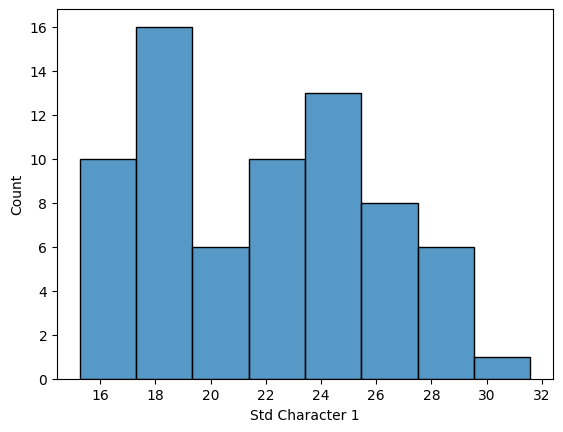

In [ ]:
sns.histplot(pdf_all_character_pairs.drop_duplicates(subset = ['Character 1' , 'Std Character 1']), x = 'Std Character 1')

# Heatmap

Character,Aether,Albedo,Alhaitham,Aloy,Amber,Arlecchino,Ayaka,Ayato,Baizhu,Barbara,...,Xiao,Xingqiu,Xinyan,Yae,Yanfei,Yaoyao,Yelan,Yoimiya,Yun Jin,Zhongli
Responder,,,,,,,,,,,,,,,,,,,,,
Aerin,32,71,63,83,57,86,18,51,27,34,...,26,41,14,23,67,52,53,22,10,12
Alice,85,25,11,86,62,28,82,81,48,80,...,26,45,27,70,65,60,50,56,7,4
Amethyst,61,60,48,86,53,70,74,47,36,58,...,50,46,42,2,17,62,8,23,41,39
Amy,74,11,19,85,56,20,40,25,44,59,...,6,48,84,38,63,58,32,41,47,8
Benji,34,84,48,86,85,6,41,67,49,74,...,39,58,62,44,14,56,21,42,65,10
David,86,58,36,83,33,10,61,69,14,79,...,15,51,7,39,56,67,41,22,35,11
Fei,81,70,10,86,31,22,5,40,76,14,...,20,52,83,24,57,79,30,37,54,27
Frozen,61,12,33,86,63,70,39,40,2,42,...,48,32,81,17,30,35,28,50,1,29
Jason,50,39,19,85,42,17,54,18,63,58,...,27,59,76,21,48,53,24,43,13,1


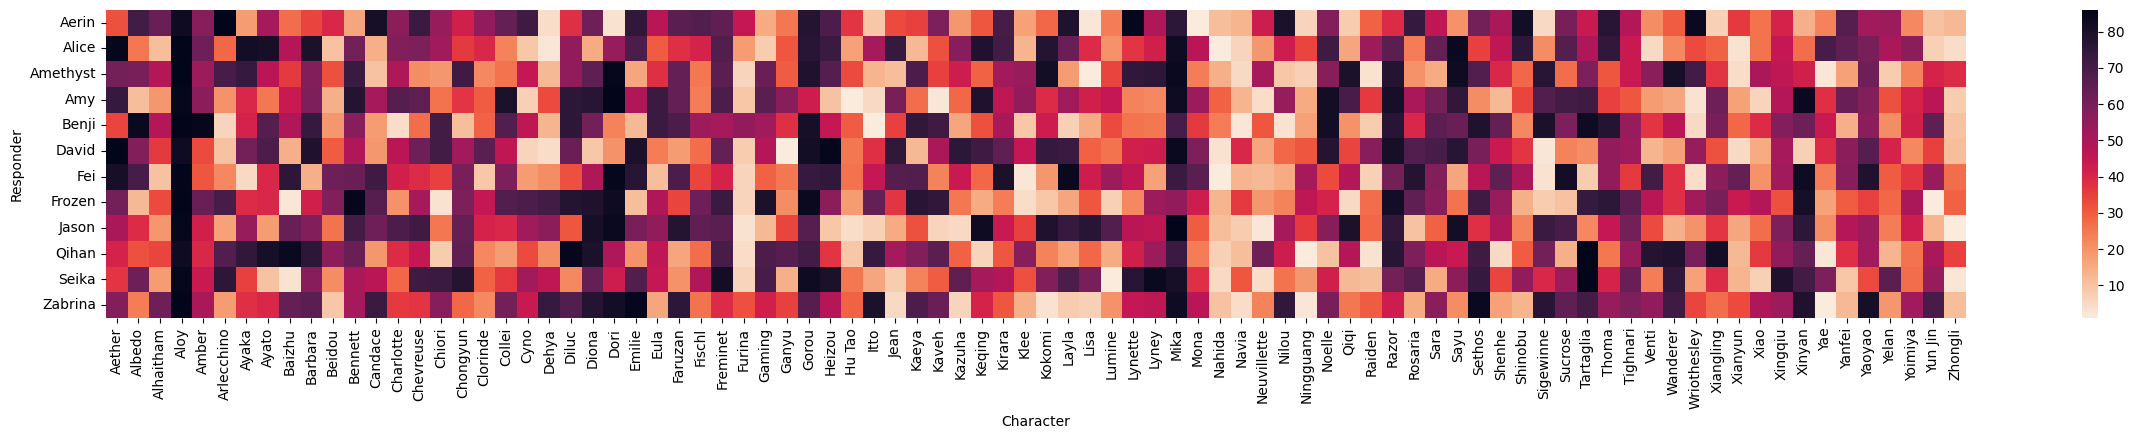

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(30, 4)

pdf_rank_heatmap = pdf_rank_all_long.copy()
pdf_rank_heatmap = pdf_rank_heatmap.drop(columns = ['Grade', 'Points', 'Borda'])
pdf_rank_heatmap = pdf_rank_heatmap.pivot(index='Responder', columns='Character', values='Rank')

ax = sns.heatmap(pdf_rank_heatmap, cmap = sns.cm.rocket_r)
pdf_rank_heatmap

Character,Aether,Albedo,Alhaitham,Aloy,Amber,Arlecchino,Ayaka,Ayato,Baizhu,Barbara,...,Xiao,Xingqiu,Xinyan,Yae,Yanfei,Yaoyao,Yelan,Yoimiya,Yun Jin,Zhongli
Responder,,,,,,,,,,,,,,,,,,,,,
Aerin,2,1,1,1,1,1,3,2,3,2,...,3,2,3,3,1,2,2,3,4,3
Alice,1,3,4,1,1,3,1,1,2,1,...,3,2,3,1,1,1,2,2,4,4
Amethyst,1,1,2,1,2,1,1,2,3,1,...,2,2,2,5,4,1,5,4,2,3
Amy,1,5,4,1,2,4,3,4,2,2,...,5,2,1,3,2,2,3,3,2,5
Benji,3,1,3,1,1,5,3,2,3,1,...,3,2,2,3,4,2,4,3,2,5
David,1,2,3,1,3,4,2,2,4,1,...,4,2,4,3,2,2,3,4,3,4
Fei,1,1,4,1,3,4,5,3,1,4,...,4,2,1,3,2,1,3,3,2,3
Frozen,3,5,5,1,3,3,4,4,5,4,...,4,5,2,5,5,5,5,4,5,5
Jason,2,2,4,1,2,4,2,4,1,1,...,3,1,1,4,2,2,3,2,4,5


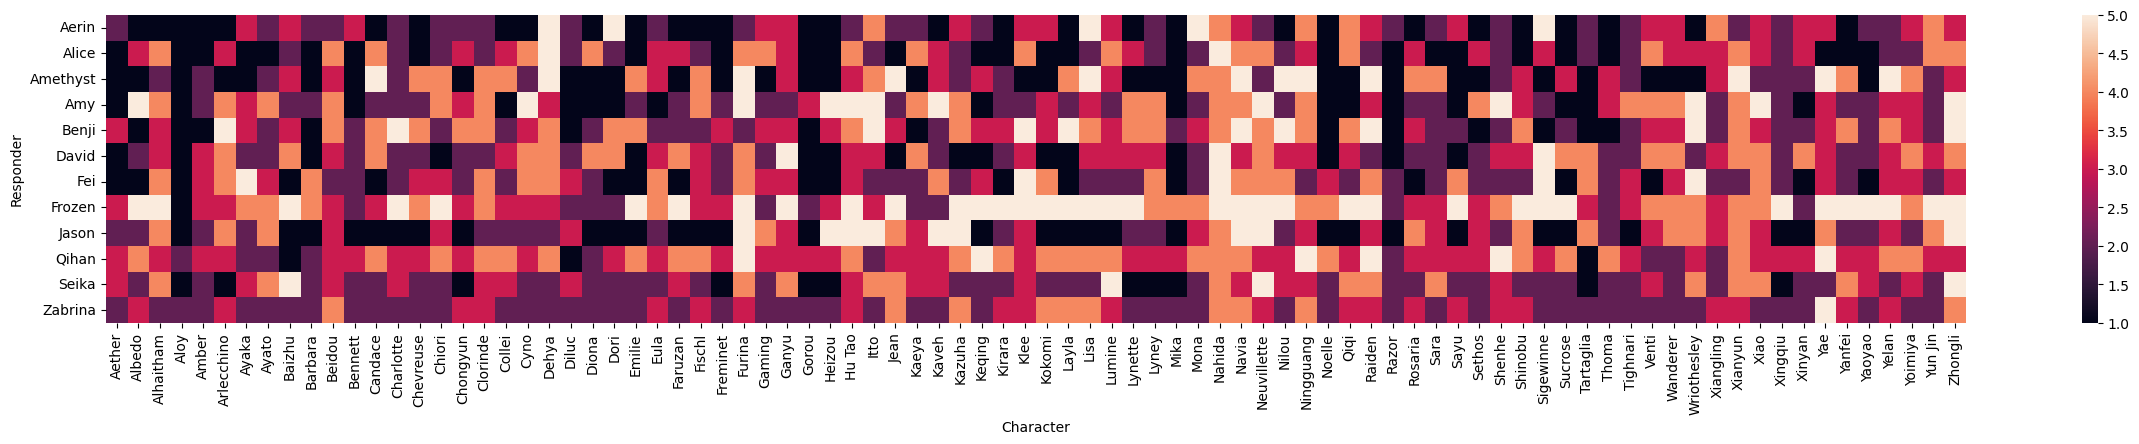

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(30, 4)

pdf_rank_heatmap = pdf_rank_all_long.copy()
pdf_rank_heatmap = pdf_rank_heatmap.drop(columns = ['Grade', 'Rank', 'Borda'])
pdf_rank_heatmap = pdf_rank_heatmap.pivot(index='Responder', columns='Character', values='Points')

ax = sns.heatmap(pdf_rank_heatmap, cmap = sns.cm.rocket)
pdf_rank_heatmap

# Total letter grade distributions

<Figure size 640x480 with 0 Axes>

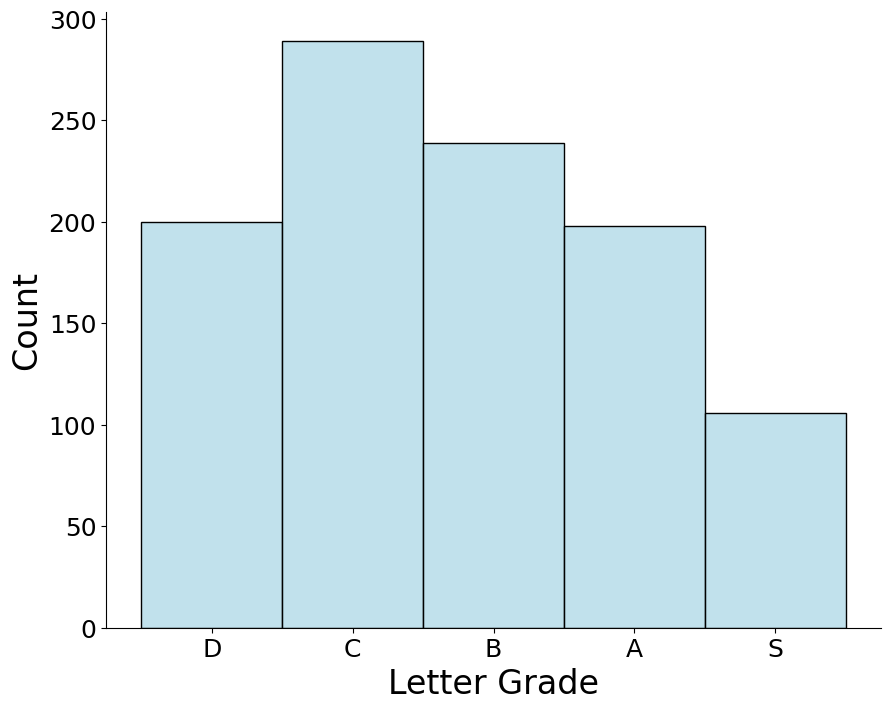

In [ ]:
plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

pdf_rank_all_long['Grade'] = pd.Categorical(pdf_rank_all_long['Grade'], ['D','C','B','A', 'S'])
sns.histplot(pdf_rank_all_long, x = 'Grade', color = 'lightblue')

#plt.ylim([1, 5])
#plt.yticks(np.arange(1, 6), ('D', 'C', 'B', 'A', 'S'))
plt.xlabel('Letter Grade', size = 24)
plt.ylabel('Count', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

# By attribute

In [ ]:
pdf_meta_edit = pdf_meta_raw.iloc[:, :13]
pdf_meta_edit = pdf_meta_edit.rename(columns = {'Name' : 'Character'})
pdf_meta_edit

,Character,Body Type,Height,Gender,Affiliated Area,Vision,Rarity,Rarity 2,First Appears,Last Appears,Num Appearances,Unit Release Patch,Unit Release Year
0,Aether,Short Male,Short,Male,Outlander,Unknown,5,Outlander,1.0,NaN,NaN,NaN,2020
1,Albedo,Short Male,Short,Male,Mondstadt,Geo,5,Limited 5*,1.2,4.8,NaN,1.2,2020
2,Alhaitham,Tall Male,Tall,Male,Sumeru,Dendro,5,Limited 5*,3.0,4.8,NaN,3.4,2023
3,Aloy,Short Female,Short,Female,Outlander,Cryo,5,Outlander,NaN,NaN,NaN,NaN,2021
4,Amber,Short Female,Short,Female,Mondstadt,Pyro,4,4*,1.0,4.5,NaN,1.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Yaoyao,Child,Child,Female,Liyue,Dendro,4,4*,3.4,4.4,NaN,3.4,2023
82,Yelan,Tall Female,Tall,Female,Liyue,Hydro,5,Limited 5*,2.7,3.4,NaN,2.7,2022
83,Yoimiya,Short Female,Short,Female,Inazuma,Pyro,5,Limited 5*,2.0,4.6,NaN,2.0,2021
84,Yun Jin,Short Female,Short,Female,Liyue,Geo,4,4*,2.4,3.4,NaN,2.4,2022


In [ ]:
pdf_rank_meta_merge = pdf_rank_all_long.merge(pdf_meta_edit, on = ['Character'], how = 'left')
pdf_rank_meta_merge['Unit Release Block'] = pdf_rank_meta_merge['Unit Release Patch'].apply(lambda x : '0.0' if x == 1 else str(np.floor(x)))
# pdf_rank_meta_merge = pdf_rank_all_long_agg.merge(pdf_meta_edit, on = ['Character'], how = 'left')
pdf_rank_meta_merge

,Character,Responder,Rank,Grade,Points,Borda,Body Type,Height,Gender,Affiliated Area,Vision,Rarity,Rarity 2,First Appears,Last Appears,Num Appearances,Unit Release Patch,Unit Release Year,Unit Release Block
0,Aether,David,86,D,1,0,Short Male,Short,Male,Outlander,Unknown,5,Outlander,1.0,NaN,NaN,NaN,2020,nan
1,Albedo,David,58,C,2,28,Short Male,Short,Male,Mondstadt,Geo,5,Limited 5*,1.2,4.8,NaN,1.2,2020,1.0
2,Alhaitham,David,36,B,3,50,Tall Male,Tall,Male,Sumeru,Dendro,5,Limited 5*,3.0,4.8,NaN,3.4,2023,3.0
3,Aloy,David,83,D,1,3,Short Female,Short,Female,Outlander,Cryo,5,Outlander,NaN,NaN,NaN,NaN,2021,nan
4,Amber,David,33,B,3,53,Short Female,Short,Female,Mondstadt,Pyro,4,4*,1.0,4.5,NaN,1.0,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Yaoyao,Seika,33,B,3,53,Child,Child,Female,Liyue,Dendro,4,4*,3.4,4.4,NaN,3.4,2023,3.0
1028,Yelan,Seika,66,C,2,20,Tall Female,Tall,Female,Liyue,Hydro,5,Limited 5*,2.7,3.4,NaN,2.7,2022,2.0
1029,Yoimiya,Seika,27,B,3,59,Short Female,Short,Female,Inazuma,Pyro,5,Limited 5*,2.0,4.6,NaN,2.0,2021,2.0
1030,Yun Jin,Seika,54,C,2,32,Short Female,Short,Female,Liyue,Geo,4,4*,2.4,3.4,NaN,2.4,2022,2.0


In [ ]:
pdf_rank_agg_meta_merge = pdf_rank_all_long_agg.merge(pdf_meta_edit, on = ['Character'], how = 'left')
pdf_rank_agg_meta_merge['Overall Rank'] = pdf_rank_agg_meta_merge.index + 1
pdf_rank_agg_meta_merge['Unit Release Block'] = pdf_rank_agg_meta_merge['Unit Release Patch'].apply(lambda x : '0.0' if x == 1 else str(np.floor(x)))
pdf_rank_agg_meta_merge

,index,Character,"(Points, mean)","(Points, median)","(Points, std)","(Borda, sum)","(Rank, mean)","(Rank, median)","(Rank, min)","(Rank, max)",...,Vision,Rarity,Rarity 2,First Appears,Last Appears,Num Appearances,Unit Release Patch,Unit Release Year,Overall Rank,Unit Release Block
0,51,Nahida,4.333333,4.0,0.492366,903,10.750000,10.5,1,29,...,Dendro,5,Limited 5*,2.8,4.8,NaN,3.2,2022,1,3.0
1,52,Navia,4.083333,4.0,0.792961,850,15.166667,12.0,2,40,...,Geo,5,Limited 5*,NaN,4.8,NaN,4.3,2023,2,4.0
2,85,Zhongli,4.083333,4.0,0.900337,843,15.750000,11.0,1,39,...,Geo,5,Limited 5*,1.0,4.4,NaN,1.1,2020,3,1.0
3,29,Furina,4.000000,4.0,1.128152,834,16.500000,7.0,3,55,...,Hydro,5,Limited 5*,NaN,4.7,NaN,4.2,2023,4,4.0
4,34,Hu Tao,3.666667,3.5,0.984732,778,21.166667,25.0,1,37,...,Pyro,5,Limited 5*,1.3,4.4,NaN,1.3,2021,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,28,Freminet,1.833333,2.0,0.834847,278,62.833333,66.0,39,82,...,Cryo,4,4*,NaN,4.6,NaN,4.0,2023,82,4.0
82,59,Razor,1.500000,1.5,0.522233,211,68.416667,76.0,39,82,...,Electro,4,4*,1.0,4.5,NaN,1.0,2020,83,0.0
83,32,Gorou,1.500000,1.0,0.797724,146,73.833333,77.5,43,84,...,Geo,4,4*,2.0,4.6,NaN,2.3,2021,84,2.0
84,49,Mika,1.583333,1.0,0.996205,101,77.583333,82.0,55,86,...,Cryo,4,4*,3.1,4.4,NaN,3.5,2023,85,3.0


In [ ]:
pdf_rank_agg_meta_merge[['Character', 'Unit Release Patch']]

,Character,Unit Release Patch
0,Nahida,3.2
1,Navia,4.3
2,Zhongli,1.1
3,Furina,4.2
4,Hu Tao,1.3
...,...,...
81,Freminet,4.0
82,Razor,1.0
83,Gorou,2.3
84,Mika,3.5


## Element

/tmp/ipython-input-2487429200.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(pdf_rank_meta_filt, x="Vision", y='Points',


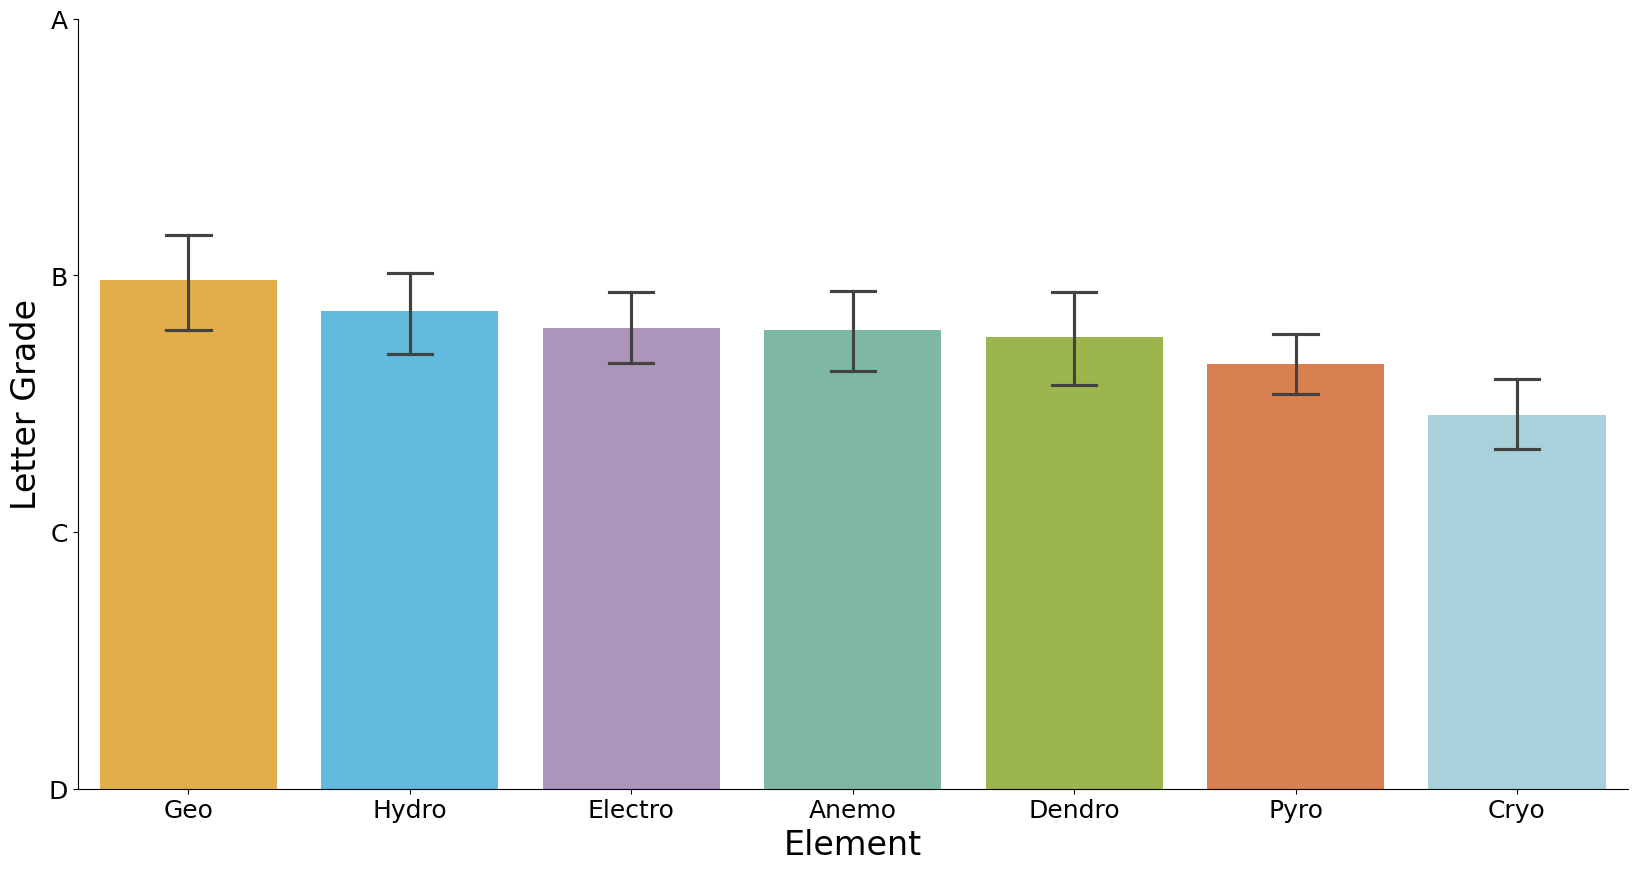

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(20, 10)

pdf_rank_meta_filt = pdf_rank_meta_merge[
    pdf_rank_meta_merge['Vision'] != 'Unknown'
]
# list_order = ['Geo', 'Dendro', 'Anemo', 'Pyro', 'Hydro', 'Electro', 'Cryo']
list_order = ['Geo', 'Hydro', 'Electro', 'Anemo', 'Dendro', 'Pyro', 'Cryo']
list_palette = [genshincolor_dict[i] for i in list_order]
ax = sns.barplot(pdf_rank_meta_filt, x="Vision", y='Points',
            estimator=np.mean, errorbar=('ci', 85), capsize=.2, order = list_order,
            palette=list_palette
)
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Element', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

In [ ]:
# prompt: For each value of Element in pdf_rank_agg_meta_merge, get the Character with the highest and lowest value of Overall Rank. Put the results in a dataframe with columns 'Element', 'Highest Character', 'Highest Character Rank', 'Lowest Character', 'Lowest Character Rank'

elements = pdf_rank_agg_meta_merge['Vision'].unique()
element_rank_summary = []

for element in elements:
    element_df = pdf_rank_agg_meta_merge[pdf_rank_agg_meta_merge['Vision'] == element].copy()

    if not element_df.empty:
        # Find character with the lowest rank (highest Overall Rank value)
        lowest_rank_char_info = element_df.loc[element_df['Overall Rank'].idxmax()]
        highest_rank_char = lowest_rank_char_info['Character']
        highest_rank_value = lowest_rank_char_info['Overall Rank']

        # Find character with the highest rank (lowest Overall Rank value)
        highest_rank_char_info = element_df.loc[element_df['Overall Rank'].idxmin()]
        lowest_rank_char = highest_rank_char_info['Character']
        lowest_rank_value = highest_rank_char_info['Overall Rank']

        element_rank_summary.append({
            'Element': element,
            'Highest Character': lowest_rank_char,
            'Highest Character Rank': lowest_rank_value,
            'Lowest Character': highest_rank_char,
            'Lowest Character Rank': highest_rank_value,
        })

pdf_element_rank_summary = pd.DataFrame(element_rank_summary)
pdf_element_rank_summary

,Element,Highest Character,Highest Character Rank,Lowest Character,Lowest Character Rank
0,Dendro,Nahida,1,Yaoyao,74
1,Geo,Navia,2,Gorou,84
2,Hydro,Furina,4,Barbara,77
3,Pyro,Hu Tao,5,Bennett,80
4,Anemo,Xianyun,7,Heizou,70
5,Electro,Raiden,9,Razor,83
6,Unknown,Lumine,12,Aether,78
7,Cryo,Ganyu,17,Aloy,86


## Region

/tmp/ipython-input-727257120.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(pdf_rank_meta_filt, x="Affiliated Area", y='Points',


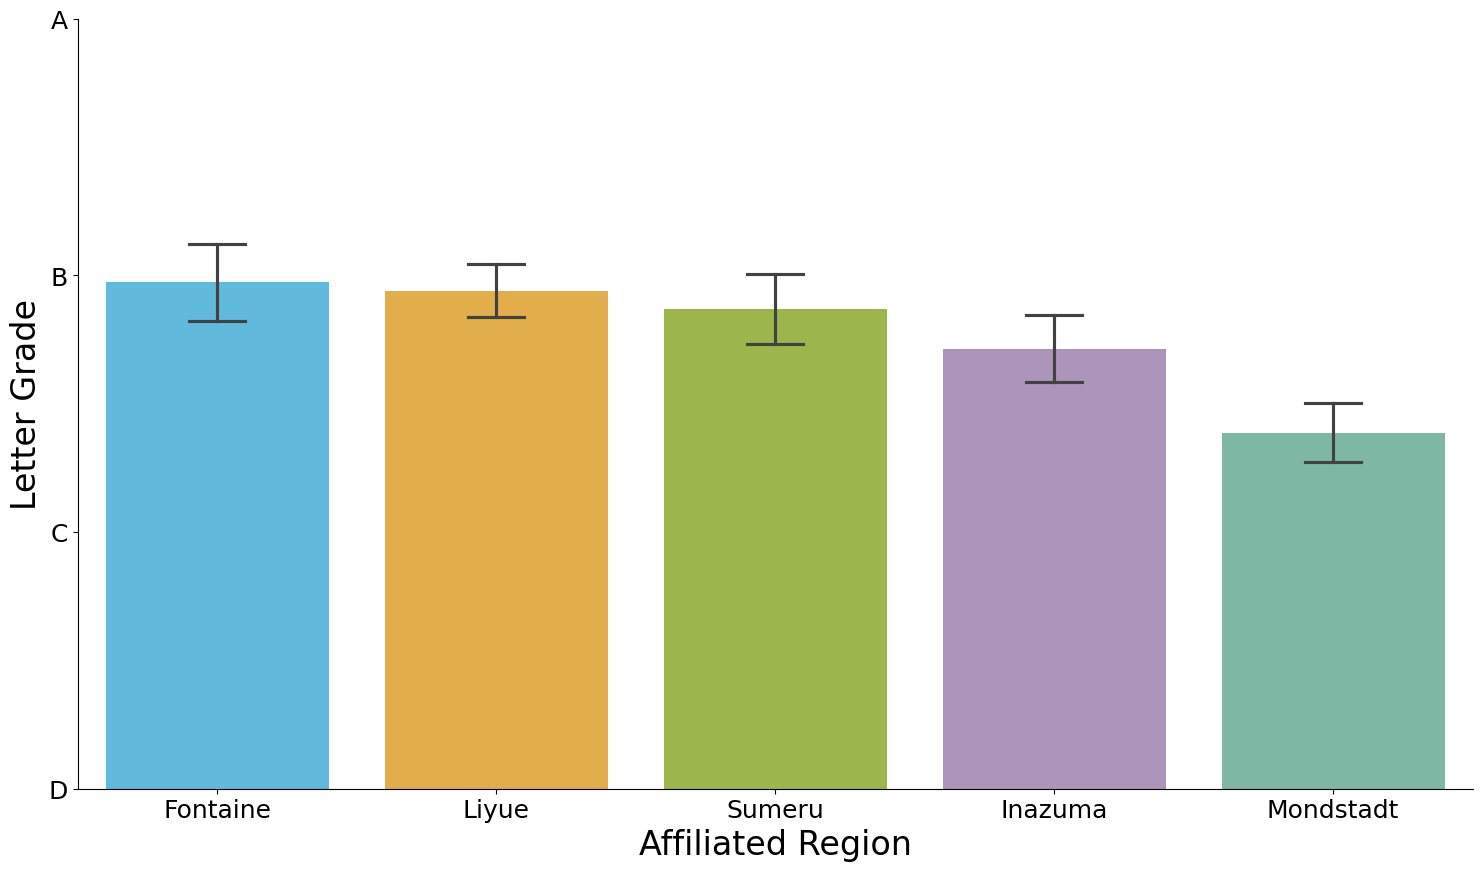

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18, 10)

pdf_rank_meta_filt = pdf_rank_meta_merge[
    (pdf_rank_meta_merge['Affiliated Area'] != 'Outlander') &
    (pdf_rank_meta_merge['Affiliated Area'] != 'Snezhnaya')
]
list_order = ['Fontaine', 'Liyue', 'Sumeru', 'Inazuma', 'Mondstadt']
ax = sns.barplot(pdf_rank_meta_filt, x="Affiliated Area", y='Points',
            estimator=np.mean, errorbar=('ci', 85), capsize=.2, order = list_order,
            palette=[genshincolor_dict['Hydro'], genshincolor_dict['Geo'], genshincolor_dict['Dendro'], genshincolor_dict['Electro'], genshincolor_dict['Anemo']]
)
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Affiliated Region', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

In [ ]:
# prompt: For each value of Element in pdf_rank_agg_meta_merge, get the Character with the highest and lowest value of Overall Rank. Put the results in a dataframe with columns 'Element', 'Highest Character', 'Highest Character Rank', 'Lowest Character', 'Lowest Character Rank'

elements = pdf_rank_agg_meta_merge['Affiliated Area'].unique()
element_rank_summary = []

for element in elements:
    element_df = pdf_rank_agg_meta_merge[pdf_rank_agg_meta_merge['Affiliated Area'] == element].copy()

    if not element_df.empty:
        # Find character with the lowest rank (highest Overall Rank value)
        lowest_rank_char_info = element_df.loc[element_df['Overall Rank'].idxmax()]
        highest_rank_char = lowest_rank_char_info['Character']
        highest_rank_value = lowest_rank_char_info['Overall Rank']

        # Find character with the highest rank (lowest Overall Rank value)
        highest_rank_char_info = element_df.loc[element_df['Overall Rank'].idxmin()]
        lowest_rank_char = highest_rank_char_info['Character']
        lowest_rank_value = highest_rank_char_info['Overall Rank']

        element_rank_summary.append({
            'Element': element,
            'Highest Character': lowest_rank_char,
            'Highest Character Rank': lowest_rank_value,
            'Lowest Character': highest_rank_char,
            'Lowest Character Rank': highest_rank_value,
        })

pdf_element_rank_summary = pd.DataFrame(element_rank_summary)
pdf_element_rank_summary

,Element,Highest Character,Highest Character Rank,Lowest Character,Lowest Character Rank
0,Sumeru,Nahida,1,Sethos,79
1,Fontaine,Navia,2,Freminet,82
2,Liyue,Zhongli,3,Xinyan,75
3,Inazuma,Raiden,9,Gorou,84
4,Mondstadt,Klee,10,Mika,85
5,Outlander,Lumine,12,Aloy,86
6,Snezhnaya,Tartaglia,72,Tartaglia,72


## Rarity

/tmp/ipython-input-313458900.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(pdf_rank_meta_filt, x="Rarity 2", y="Points",


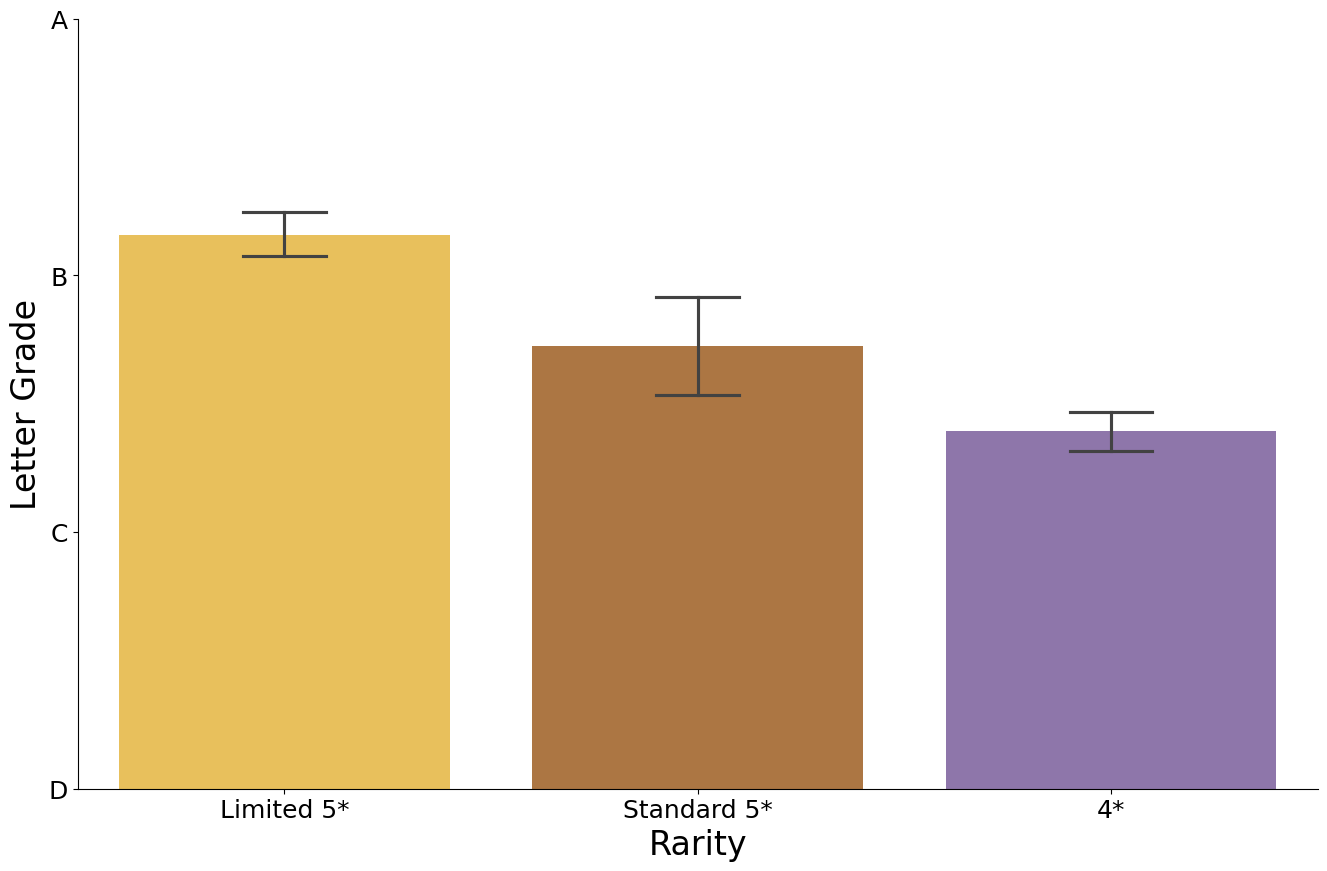

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(16, 10)

pdf_rank_meta_filt = pdf_rank_meta_merge[
    pdf_rank_meta_merge['Rarity 2'] != 'Outlander'
]
list_order = ['Limited 5*', 'Standard 5*', '4*']
ax = sns.barplot(pdf_rank_meta_filt, x="Rarity 2", y="Points",
            estimator=np.mean, errorbar=('ci', 85), capsize=.2, order = list_order,
            palette=[genshincolor_dict['5star'], genshincolor_dict['5star_standard'], genshincolor_dict['4star']]
)
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Rarity', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

In [ ]:
# prompt: For each value of Element in pdf_rank_agg_meta_merge, get the Character with the highest and lowest value of Overall Rank. Put the results in a dataframe with columns 'Element', 'Highest Character', 'Highest Character Rank', 'Lowest Character', 'Lowest Character Rank'

elements = pdf_rank_agg_meta_merge['Rarity 2'].unique()
element_rank_summary = []

for element in elements:
    element_df = pdf_rank_agg_meta_merge[pdf_rank_agg_meta_merge['Rarity 2'] == element].copy()

    if not element_df.empty:
        # Find character with the lowest rank (highest Overall Rank value)
        lowest_rank_char_info = element_df.loc[element_df['Overall Rank'].idxmax()]
        highest_rank_char = lowest_rank_char_info['Character']
        highest_rank_value = lowest_rank_char_info['Overall Rank']

        # Find character with the highest rank (lowest Overall Rank value)
        highest_rank_char_info = element_df.loc[element_df['Overall Rank'].idxmin()]
        lowest_rank_char = highest_rank_char_info['Character']
        lowest_rank_value = highest_rank_char_info['Overall Rank']

        element_rank_summary.append({
            'Element': element,
            'Highest Character': lowest_rank_char,
            'Highest Character Rank': lowest_rank_value,
            'Lowest Character': highest_rank_char,
            'Lowest Character Rank': highest_rank_value,
        })

pdf_element_rank_summary = pd.DataFrame(element_rank_summary)
pdf_element_rank_summary

,Element,Highest Character,Highest Character Rank,Lowest Character,Lowest Character Rank
0,Limited 5*,Nahida,1,Tartaglia,72
1,4*,Ningguang,6,Mika,85
2,Outlander,Lumine,12,Aloy,86
3,Standard 5*,Dehya,14,Diluc,73


## Height

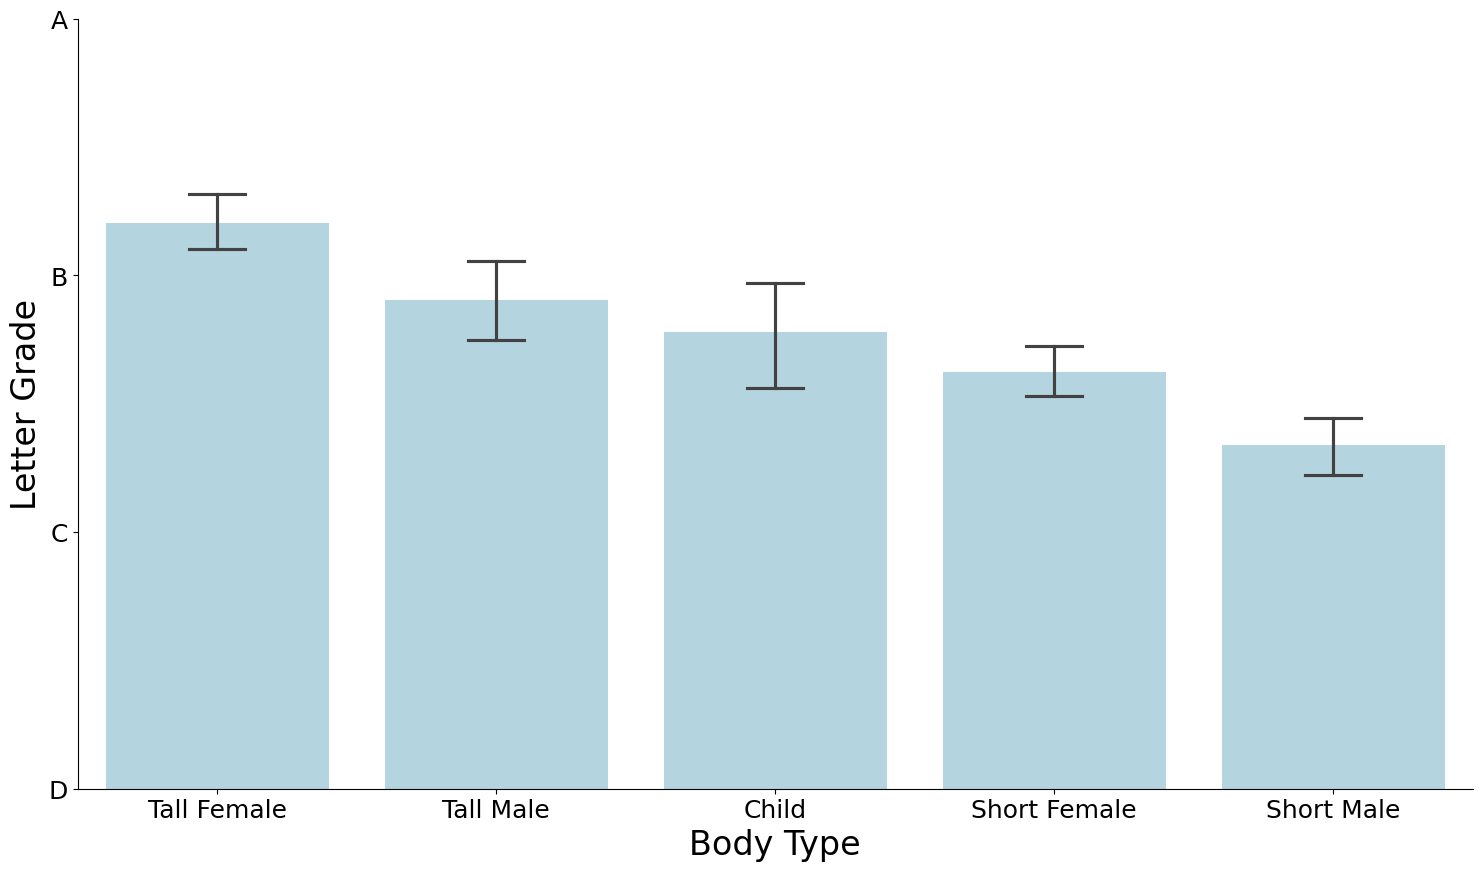

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18, 10)

# list_order = ['Tall Male', 'Tall Female', 'Child', 'Short Male', 'Short Female']
list_order = ['Tall Female', 'Tall Male', 'Child', 'Short Female', 'Short Male']
ax = sns.barplot(pdf_rank_meta_merge, x="Body Type", y="Points", estimator=np.mean, errorbar=('ci', 85), capsize=.2, order = list_order, color = 'lightblue')
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Body Type', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

In [ ]:
# prompt: For each value of Element in pdf_rank_agg_meta_merge, get the Character with the highest and lowest value of Overall Rank. Put the results in a dataframe with columns 'Element', 'Highest Character', 'Highest Character Rank', 'Lowest Character', 'Lowest Character Rank'

elements = pdf_rank_agg_meta_merge['Body Type'].unique()
element_rank_summary = []

for element in elements:
    element_df = pdf_rank_agg_meta_merge[pdf_rank_agg_meta_merge['Body Type'] == element].copy()

    if not element_df.empty:
        # Find character with the lowest rank (highest Overall Rank value)
        lowest_rank_char_info = element_df.loc[element_df['Overall Rank'].idxmax()]
        highest_rank_char = lowest_rank_char_info['Character']
        highest_rank_value = lowest_rank_char_info['Overall Rank']

        # Find character with the highest rank (lowest Overall Rank value)
        highest_rank_char_info = element_df.loc[element_df['Overall Rank'].idxmin()]
        lowest_rank_char = highest_rank_char_info['Character']
        lowest_rank_value = highest_rank_char_info['Overall Rank']

        element_rank_summary.append({
            'Element': element,
            'Highest Character': lowest_rank_char,
            'Highest Character Rank': lowest_rank_value,
            'Lowest Character': highest_rank_char,
            'Lowest Character Rank': highest_rank_value,
        })

pdf_element_rank_summary = pd.DataFrame(element_rank_summary)
pdf_element_rank_summary

,Element,Highest Character,Highest Character Rank,Lowest Character,Lowest Character Rank
0,Child,Nahida,1,Diona,81
1,Tall Female,Navia,2,Sara,57
2,Tall Male,Zhongli,3,Diluc,73
3,Short Female,Furina,4,Aloy,86
4,Short Male,Xiao,13,Mika,85


## Release patch

/tmp/ipython-input-211007292.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


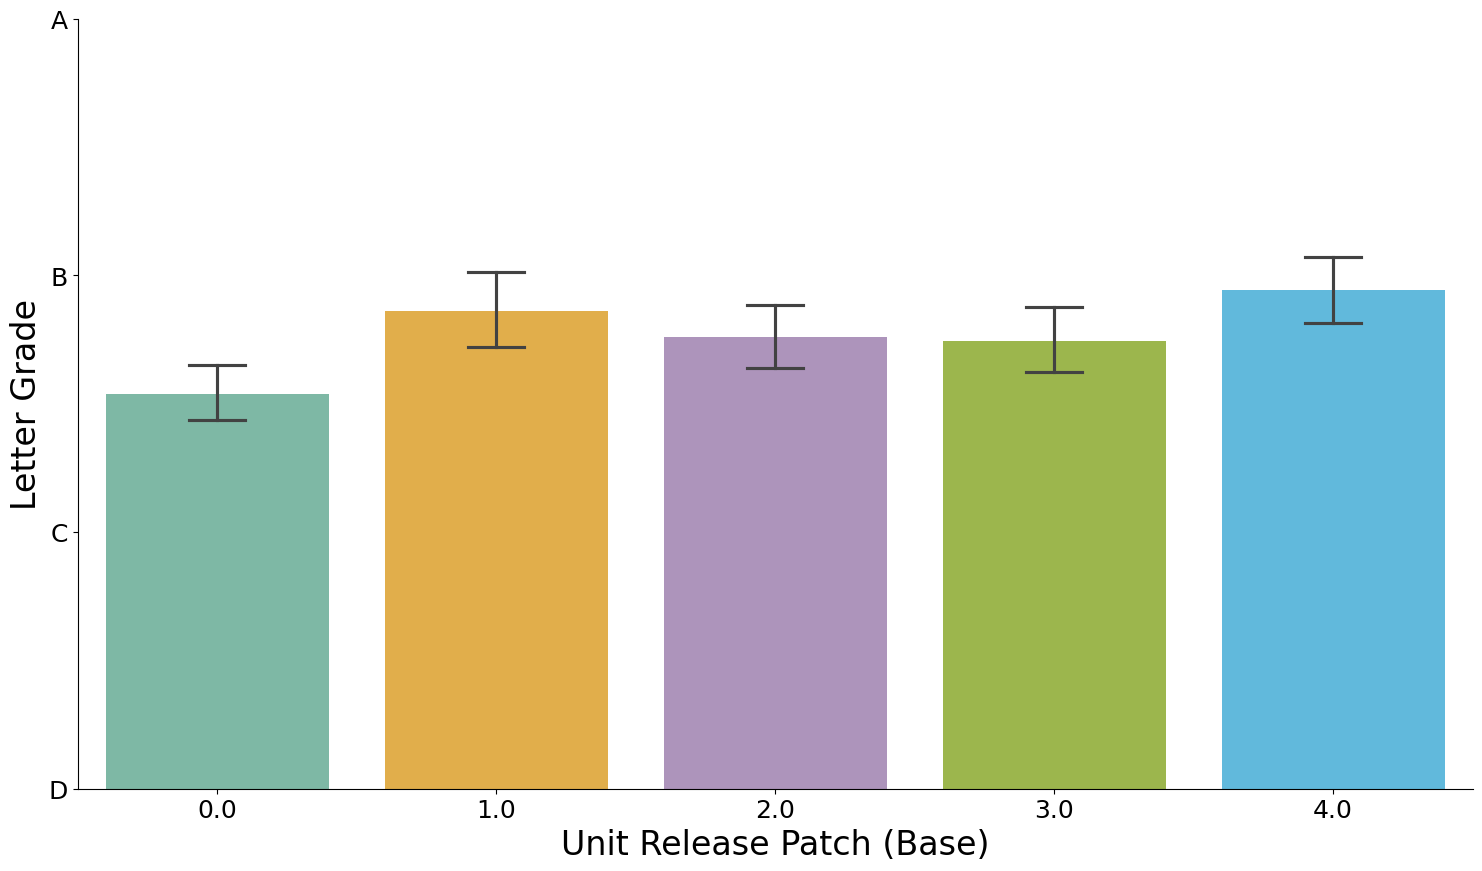

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18, 10)

pdf_rank_meta_filt = pdf_rank_meta_merge[
    pdf_rank_meta_merge['Unit Release Block'].isin(['0.0', '1.0', '2.0', '3.0', '4.0'])
]

list_order = ['0.0', '1.0', '2.0', '3.0', '4.0']
ax = sns.barplot(
    pdf_rank_meta_filt, x="Unit Release Block", y="Points",
    estimator=np.mean, errorbar=('ci', 85), capsize=.2,
    order = list_order,
    palette=[genshincolor_dict['Anemo'], genshincolor_dict['Geo'], genshincolor_dict['Electro'], genshincolor_dict['Dendro'], genshincolor_dict['Hydro']]
)
plt.ylim([1, 4])
plt.yticks(np.arange(1, 5), ('D', 'C', 'B', 'A'))
plt.xlabel('Unit Release Patch (Base)', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

In [ ]:
# prompt: For each value of Element in pdf_rank_agg_meta_merge, get the Character with the highest and lowest value of Overall Rank. Put the results in a dataframe with columns 'Element', 'Highest Character', 'Highest Character Rank', 'Lowest Character', 'Lowest Character Rank'

release_patches = pdf_rank_agg_meta_merge['Unit Release Block'].unique()
element_rank_summary = []

for element in release_patches:
    element_df = pdf_rank_agg_meta_merge[pdf_rank_agg_meta_merge['Unit Release Block'] == element].copy()

    if not element_df.empty:
        # Find character with the lowest rank (highest Overall Rank value)
        lowest_rank_char_info = element_df.loc[element_df['Overall Rank'].idxmax()]
        highest_rank_char = lowest_rank_char_info['Character']
        highest_rank_value = lowest_rank_char_info['Overall Rank']

        # Find character with the highest rank (lowest Overall Rank value)
        highest_rank_char_info = element_df.loc[element_df['Overall Rank'].idxmin()]
        lowest_rank_char = highest_rank_char_info['Character']
        lowest_rank_value = highest_rank_char_info['Overall Rank']

        element_rank_summary.append({
            'Element': element,
            'Highest Character': lowest_rank_char,
            'Highest Character Rank': lowest_rank_value,
            'Lowest Character': highest_rank_char,
            'Lowest Character Rank': highest_rank_value,
        })

pdf_element_rank_summary = pd.DataFrame(element_rank_summary)
pdf_element_rank_summary

,Element,Highest Character,Highest Character Rank,Lowest Character,Lowest Character Rank
0,3.0,Nahida,1,Mika,85
1,4.0,Navia,2,Freminet,82
2,1.0,Zhongli,3,Diona,81
3,0.0,Ningguang,6,Razor,83
4,2.0,Raiden,9,Gorou,84
5,nan,Lumine,12,Aloy,86


## Last appeared patch

In [ ]:
pdf_rank_meta_filt_lastseen = pdf_rank_agg_meta_merge[
    pdf_rank_agg_meta_merge['Last Appears'].notnull()
]
pdf_rank_meta_filt_lastseen['Points'] = pdf_rank_meta_filt_lastseen[('Points', 'median')]
pdf_rank_meta_filt_lastseen = pdf_rank_meta_filt_lastseen.groupby('Last Appears').agg({'Points': ['mean', 'std']})
pdf_rank_meta_filt_lastseen.columns = pdf_rank_meta_filt_lastseen.columns.to_flat_index()
pdf_rank_meta_filt_lastseen = pdf_rank_meta_filt_lastseen.reset_index()
pdf_rank_meta_filt_lastseen[('Points', 'std')] = pdf_rank_meta_filt_lastseen[('Points', 'std')].fillna(0)
pdf_rank_meta_filt_lastseen = pdf_rank_meta_filt_lastseen.sort_values(by = 'Last Appears').reset_index(drop = True)
pdf_rank_meta_filt_lastseen = pdf_rank_meta_filt_lastseen.merge(
    pd.DataFrame({'Last Appears' : [3.4, 3.5, 3.6, 3.7, 3.8, 4.1, 4.2, 4.3, 4.4, 4.5, 4.5, 4.7, 4.8]}),
    on = 'Last Appears', how = 'outer'
)
pdf_rank_meta_filt_lastseen = pdf_rank_meta_filt_lastseen.sort_values(by = 'Last Appears').reset_index(drop = True)
pdf_rank_meta_filt_lastseen['Last Appears'] = pdf_rank_meta_filt_lastseen['Last Appears'].astype(str)

pdf_rank_meta_filt_lastseen

/tmp/ipython-input-3107291204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rank_meta_filt_lastseen['Points'] = pdf_rank_meta_filt_lastseen[('Points', 'median')]


,Last Appears,"(Points, mean)","(Points, std)"
0,3.4,2.500000,0.500000
1,3.5,2.000000,0.000000
2,3.6,2.500000,0.000000
3,3.7,3.166667,1.040833
4,3.8,2.000000,0.000000
5,4.1,1.750000,1.060660
6,4.2,NaN,NaN
7,4.3,2.666667,0.288675
8,4.4,2.653846,0.875229
9,4.5,2.416667,0.633652


In [ ]:
pdf_rank_meta_filt_releasepatch = pdf_rank_agg_meta_merge[
    pdf_rank_agg_meta_merge['Unit Release Patch'].notnull()
]
pdf_rank_meta_filt_releasepatch['Points'] = pdf_rank_meta_filt_releasepatch[('Points', 'median')]
pdf_rank_meta_filt_releasepatch = pdf_rank_meta_filt_releasepatch.groupby('Unit Release Patch').agg({'Points': ['mean', 'std']})
pdf_rank_meta_filt_releasepatch.columns = pdf_rank_meta_filt_releasepatch.columns.to_flat_index()
pdf_rank_meta_filt_releasepatch = pdf_rank_meta_filt_releasepatch.reset_index()
pdf_rank_meta_filt_releasepatch[('Points', 'std')] = pdf_rank_meta_filt_releasepatch[('Points', 'std')].fillna(0)
pdf_rank_meta_filt_releasepatch = pdf_rank_meta_filt_releasepatch.sort_values(by = 'Unit Release Patch').reset_index(drop = True)

pdf_rank_meta_filt_releasepatch = pdf_rank_meta_filt_releasepatch.sort_values(by = 'Unit Release Patch').reset_index(drop = True)
pdf_rank_meta_filt_releasepatch['Unit Release Patch'] = pdf_rank_meta_filt_releasepatch['Unit Release Patch'].astype(str)

/tmp/ipython-input-3946226008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rank_meta_filt_releasepatch['Points'] = pdf_rank_meta_filt_releasepatch[('Points', 'median')]


<Figure size 640x480 with 0 Axes>

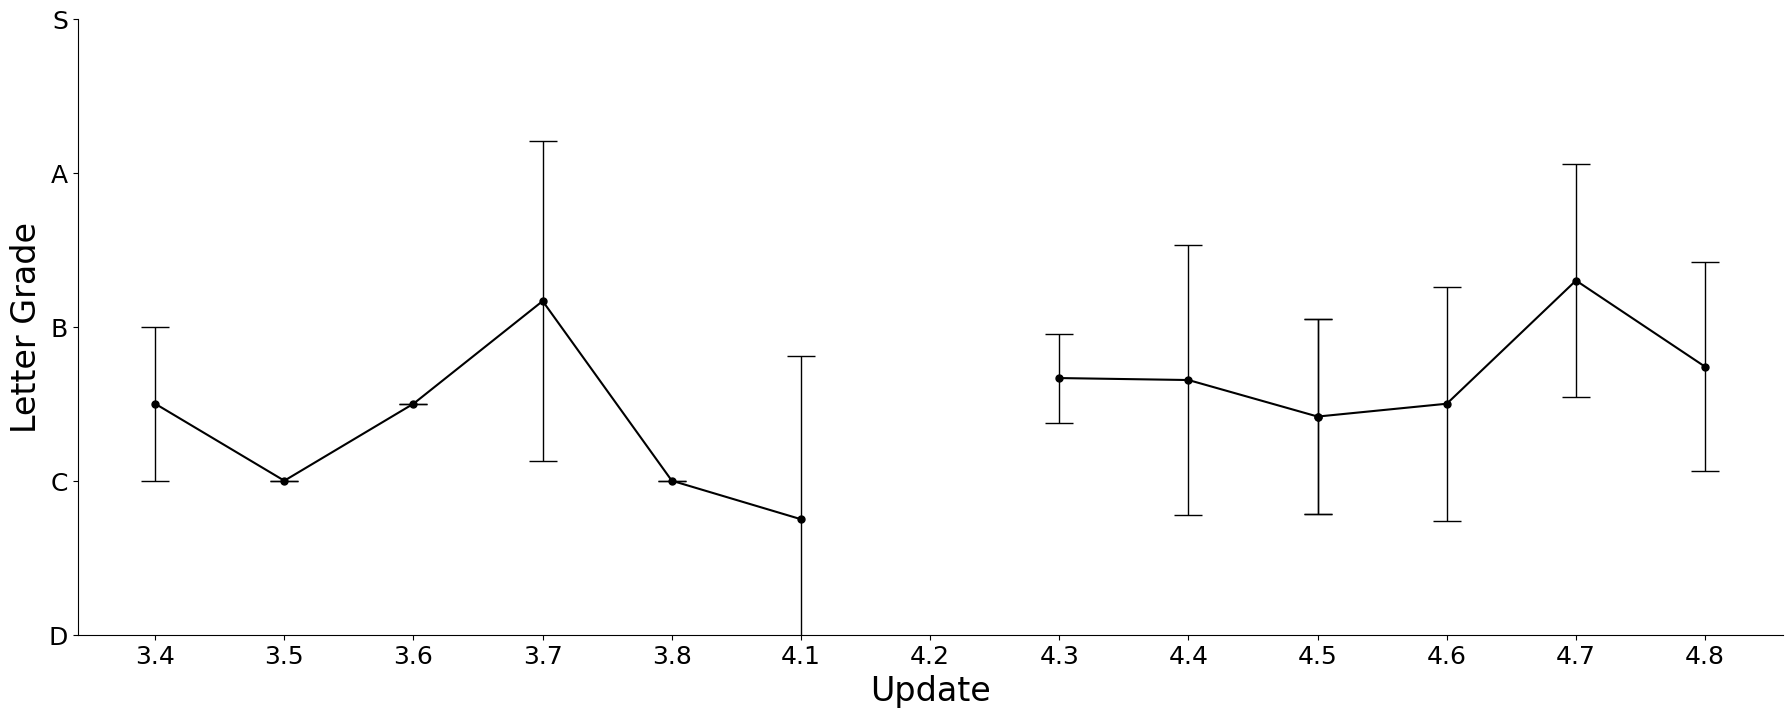

In [ ]:
plt.figure()
# fig = plt.gcf()
fig, ax = plt.subplots()
fig.set_size_inches(22, 8)

unique_patches = list(pdf_rank_meta_filt_lastseen['Last Appears'].unique())
plt.plot(unique_patches, [0] * len(unique_patches), 'k-')

plt.errorbar(
    pdf_rank_meta_filt_lastseen['Last Appears'],
    pdf_rank_meta_filt_lastseen[('Points', 'mean')],
    yerr = pdf_rank_meta_filt_lastseen[('Points', 'std')],
    capsize=10, elinewidth=1, color = 'black'
)
plt.plot(
    pdf_rank_meta_filt_lastseen['Last Appears'],
    pdf_rank_meta_filt_lastseen[('Points', 'mean')],
    'k.', markersize = 10
)

# Plot a best fit line with 'Last Appears' and 'Points

plt.ylim([1, 5])
plt.yticks(np.arange(1, 6), ('D', 'C', 'B', 'A', 'S'))
plt.xlabel('Update', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

<Figure size 640x480 with 0 Axes>

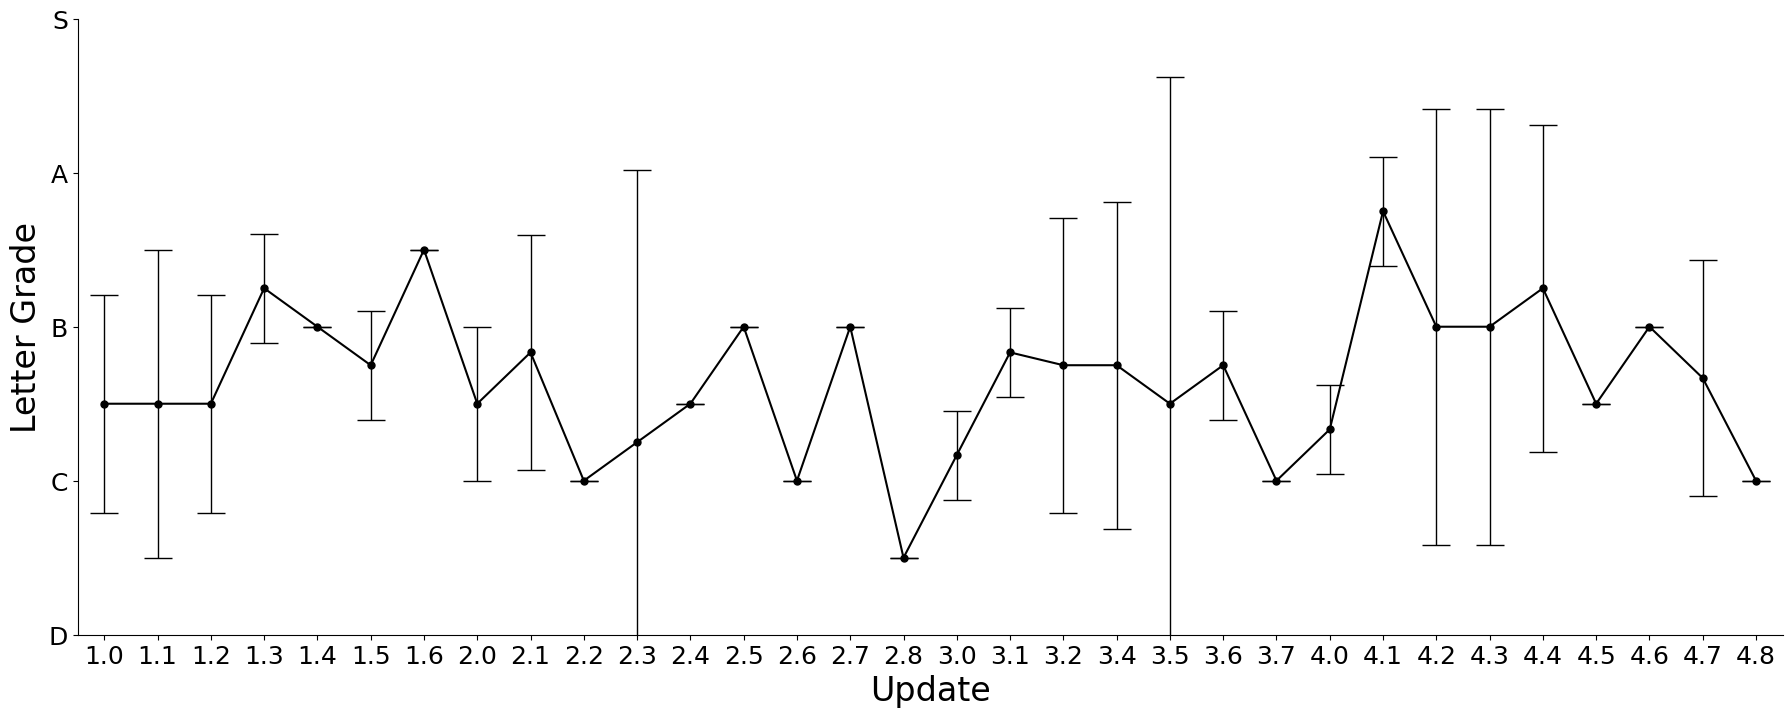

In [ ]:
plt.figure()
# fig = plt.gcf()
fig, ax = plt.subplots()
fig.set_size_inches(22, 8)

unique_patches = list(pdf_rank_meta_filt_releasepatch['Unit Release Patch'].unique())
plt.plot(unique_patches, [0] * len(unique_patches), 'k-')

plt.errorbar(
    pdf_rank_meta_filt_releasepatch['Unit Release Patch'],
    pdf_rank_meta_filt_releasepatch[('Points', 'mean')],
    yerr = pdf_rank_meta_filt_releasepatch[('Points', 'std')],
    capsize=10, elinewidth=1, color = 'black'
)
plt.plot(
    pdf_rank_meta_filt_releasepatch['Unit Release Patch'],
    pdf_rank_meta_filt_releasepatch[('Points', 'mean')],
    'k.', markersize = 10
)

# Plot a best fit line with 'Unit Release Patch' and 'Points

plt.ylim([1, 5])
plt.xlim([-0.5, 31.5])
plt.yticks(np.arange(1, 6), ('D', 'C', 'B', 'A', 'S'))
plt.xlabel('Update', size = 24)
plt.ylabel('Letter Grade', size = 24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.spines[['right', 'top']].set_visible(False)

# Participant trends

In [ ]:
pdf_rank_all_long_merge_agg = pdf_rank_all_long.merge(
    pdf_rank_all_long_agg.drop(columns = 'index'), on = 'Character', how = 'outer'
)
pdf_rank_all_long_merge_agg['Points__diff_from_mean'] = pdf_rank_all_long_merge_agg['Points'] - pdf_rank_all_long_merge_agg[('Points', 'mean')]
pdf_rank_all_long_merge_agg['Rank__diff_from_Borda'] = pdf_rank_all_long_merge_agg['Rank'] - pdf_rank_all_long_merge_agg['Borda Rank']
pdf_rank_all_long_merge_agg['Points__abs_diff_from_mean'] = np.abs(pdf_rank_all_long_merge_agg['Points'] - pdf_rank_all_long_merge_agg[('Points', 'mean')])
pdf_rank_all_long_merge_agg['Rank__abs_diff_from_Borda'] = np.abs(pdf_rank_all_long_merge_agg['Rank'] - pdf_rank_all_long_merge_agg['Borda Rank'])

pdf_rank_all_long_merge_agg

,Character,Responder,Rank,Grade,Points,Borda,"(Points, mean)","(Points, median)","(Points, std)","(Borda, sum)","(Rank, mean)","(Rank, median)","(Rank, min)","(Rank, max)",Borda Rank,Points__diff_from_mean,Rank__diff_from_Borda,Points__abs_diff_from_mean,Rank__abs_diff_from_Borda
0,Aether,David,86,D,1,0,1.916667,2.0,0.900337,332,58.333333,59.5,32,86,78,-0.916667,8,0.916667,8
1,Aether,Aerin,32,C,2,54,1.916667,2.0,0.900337,332,58.333333,59.5,32,86,78,0.083333,-46,0.083333,46
2,Aether,Qihan,41,B,3,45,1.916667,2.0,0.900337,332,58.333333,59.5,32,86,78,1.083333,-37,1.083333,37
3,Aether,Jason,50,C,2,36,1.916667,2.0,0.900337,332,58.333333,59.5,32,86,78,0.083333,-28,0.083333,28
4,Aether,Frozen,61,B,3,25,1.916667,2.0,0.900337,332,58.333333,59.5,32,86,78,1.083333,-17,1.083333,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Zhongli,Amy,8,S,5,78,4.083333,4.0,0.900337,843,15.750000,11.0,1,39,3,0.916667,5,0.916667,5
1028,Zhongli,Fei,27,B,3,59,4.083333,4.0,0.900337,843,15.750000,11.0,1,39,3,-1.083333,24,1.083333,24
1029,Zhongli,Benji,10,S,5,76,4.083333,4.0,0.900337,843,15.750000,11.0,1,39,3,0.916667,7,0.916667,7
1030,Zhongli,Amethyst,39,B,3,47,4.083333,4.0,0.900337,843,15.750000,11.0,1,39,3,-1.083333,36,1.083333,36


In [ ]:
def RescaleValueToRange(value, min_value, max_value):
  return (value - min_value) / (max_value - min_value)

In [ ]:
exclude_outliers = False

pdf_rank_agg_by_rater = pdf_rank_all_long_merge_agg.copy()

if exclude_outliers:
  pdf_rank_agg_by_rater = pdf_rank_agg_by_rater[pdf_rank_agg_by_rater['Responder'] != 'Aerin']
  pdf_rank_agg_by_rater = pdf_rank_agg_by_rater[pdf_rank_agg_by_rater['Responder'] != 'Frozen']
  pdf_rank_agg_by_rater = pdf_rank_agg_by_rater[pdf_rank_agg_by_rater['Responder'] != 'Qihan']
  pdf_rank_agg_by_rater = pdf_rank_agg_by_rater[pdf_rank_agg_by_rater['Responder'] != 'Fei']

pdf_rank_agg_by_rater = pdf_rank_agg_by_rater.groupby('Responder').agg(
    {
        'Points' : 'mean',
        'Points__abs_diff_from_mean' : 'mean',
        'Rank__abs_diff_from_Borda' : 'mean',
    }
)
pdf_rank_agg_by_rater = pdf_rank_agg_by_rater.reset_index()
pdf_rank_agg_by_rater['Points_rescaled'] = pdf_rank_agg_by_rater['Points'].apply(lambda row : RescaleValueToRange(row, min(pdf_rank_agg_by_rater['Points']), max(pdf_rank_agg_by_rater['Points'])))
pdf_rank_agg_by_rater['Rank__abs_diff_from_Borda_rescaled'] = pdf_rank_agg_by_rater['Rank__abs_diff_from_Borda'].apply(lambda row : RescaleValueToRange(row, min(pdf_rank_agg_by_rater['Rank__abs_diff_from_Borda']), max(pdf_rank_agg_by_rater['Rank__abs_diff_from_Borda'])))
# pdf_rank_agg_by_rater.columns = pdf_rank_agg_by_rater.columns.to_flat_index()

display(pdf_rank_agg_by_rater)

,Responder,Points,Points__abs_diff_from_mean,Rank__abs_diff_from_Borda,Points_rescaled,Rank__abs_diff_from_Borda_rescaled
0,Aerin,2.186047,0.999031,22.255814,0.000000,1.000000
1,Alice,2.372093,0.873062,18.511628,0.107383,0.247664
2,Amethyst,2.511628,1.103682,18.116279,0.187919,0.168224
3,Amy,2.802326,0.942829,17.581395,0.355705,0.060748
4,Benji,2.930233,0.812984,17.906977,0.429530,0.126168
5,David,2.651163,0.774225,19.000000,0.268456,0.345794
6,Fei,2.581395,0.907946,20.604651,0.228188,0.668224
7,Frozen,3.918605,1.281977,19.953488,1.000000,0.537383
8,Jason,2.465116,0.979651,18.372093,0.161074,0.219626
9,Qihan,3.255814,0.824612,20.186047,0.617450,0.584112


In [ ]:
pdf_rank_agg_by_rater_devs = pdf_rank_all_long_merge_agg.copy()
pdf_rank_agg_by_rater_devs = pdf_rank_agg_by_rater_devs.groupby('Responder').agg(
    {
        'Rank__diff_from_Borda' : ['min', 'max'],
    }
)
pdf_rank_agg_by_rater_devs.columns = pdf_rank_agg_by_rater_devs.columns.to_flat_index()
pdf_rank_agg_by_rater_devs = pdf_rank_agg_by_rater_devs.reset_index()

pdf_rank_agg_by_rater_devs = pdf_rank_agg_by_rater_devs.merge(pdf_rank_all_long_merge_agg, on = 'Responder', how = 'left')

pdf_rank_agg_by_rater_devs_better = pdf_rank_agg_by_rater_devs[
    pdf_rank_agg_by_rater_devs['Rank__diff_from_Borda'] == pdf_rank_agg_by_rater_devs[('Rank__diff_from_Borda', 'min')]
]

pdf_rank_agg_by_rater_devs_better

,Responder,"(Rank__diff_from_Borda, min)","(Rank__diff_from_Borda, max)",Character,Rank,Grade,Points,Borda,"(Points, mean)","(Points, median)",...,"(Borda, sum)","(Rank, mean)","(Rank, median)","(Rank, min)","(Rank, max)",Borda Rank,Points__diff_from_mean,Rank__diff_from_Borda,Points__abs_diff_from_mean,Rank__abs_diff_from_Borda
23,Aerin,-73,61,Dori,3,S,5,83,2.333333,2.0,...,335,58.083333,68.0,3,86,76,2.666667,-73,2.666667,73
108,Alice,-66,59,Diona,15,A,4,71,2.000000,2.0,...,312,60.000000,64.5,9,81,81,2.000000,-66,2.000000,66
196,Amethyst,-50,55,Emilie,16,A,4,70,2.333333,2.0,...,410,51.833333,64.0,11,85,66,1.666667,-50,1.666667,50
291,Amy,-60,45,Heizou,10,S,5,76,2.250000,1.5,...,378,54.500000,61.5,9,85,70,2.750000,-60,2.750000,60
368,Benji,-54,51,Emilie,12,A,4,74,2.333333,2.0,...,410,51.833333,64.0,11,85,66,1.666667,-54,1.666667,54
452,David,-72,54,Diona,9,A,4,77,2.000000,2.0,...,312,60.000000,64.5,9,81,81,2.000000,-72,2.000000,72
584,Fei,-64,57,Tartaglia,8,A,4,78,2.166667,2.0,...,357,56.250000,65.0,8,86,72,1.833333,-64,1.833333,64
626,Frozen,-55,57,Emilie,11,S,5,75,2.333333,2.0,...,410,51.833333,64.0,11,85,66,2.666667,-55,2.666667,55
721,Jason,-61,62,Heizou,9,S,5,77,2.250000,1.5,...,378,54.500000,61.5,9,85,70,2.750000,-61,2.750000,61
830,Qihan,-61,54,Noelle,10,A,4,76,1.833333,1.0,...,360,56.000000,57.5,10,82,71,2.166667,-61,2.166667,61


In [ ]:
pdf_rank_agg_by_rater_devs_worse = pdf_rank_agg_by_rater_devs[
    pdf_rank_agg_by_rater_devs['Rank__diff_from_Borda'] == pdf_rank_agg_by_rater_devs[('Rank__diff_from_Borda', 'max')]
]

pdf_rank_agg_by_rater_devs_worse

,Responder,"(Rank__diff_from_Borda, min)","(Rank__diff_from_Borda, max)",Character,Rank,Grade,Points,Borda,"(Points, mean)","(Points, median)",...,"(Borda, sum)","(Rank, mean)","(Rank, median)","(Rank, min)","(Rank, max)",Borda Rank,Points__diff_from_mean,Rank__diff_from_Borda,Points__abs_diff_from_mean,Rank__abs_diff_from_Borda
73,Aerin,-73,61,Wriothesley,84,D,1,2,3.250000,3.5,...,595,36.416667,33.5,3,84,23,-2.250000,61,2.250000,61
165,Alice,-66,59,Yae,70,D,1,16,3.500000,3.0,...,692,28.333333,23.5,1,70,11,-2.500000,59,2.500000,59
229,Amethyst,-50,55,Qiqi,80,D,1,6,2.916667,3.0,...,586,37.166667,29.5,5,80,25,-1.916667,55,1.916667,55
300,Amy,-60,45,Klee,55,C,2,31,3.333333,3.0,...,695,28.083333,24.5,2,57,10,-1.333333,45,1.333333,45
315,Amy,-60,45,Qiqi,70,D,1,16,2.916667,3.0,...,586,37.166667,29.5,5,80,25,-1.916667,45,1.916667,45
373,Benji,-54,51,Furina,55,C,2,31,4.000000,4.0,...,834,16.500000,7.0,3,55,4,-2.000000,51,2.000000,51
469,David,-72,54,Kazuha,76,D,1,10,3.166667,3.5,...,619,34.416667,28.5,5,76,22,-2.166667,54,2.166667,54
591,Fei,-64,57,Xianyun,64,C,2,22,3.666667,4.0,...,757,22.916667,16.5,3,64,7,-1.666667,57,1.666667,57
622,Frozen,-55,57,Dehya,71,B,3,15,3.583333,4.0,...,675,29.750000,21.0,2,74,14,-0.583333,57,0.583333,57
733,Jason,-61,62,Lisa,77,D,1,9,3.333333,3.5,...,658,31.166667,30.0,1,77,15,-2.333333,62,2.333333,62


<Figure size 640x480 with 0 Axes>

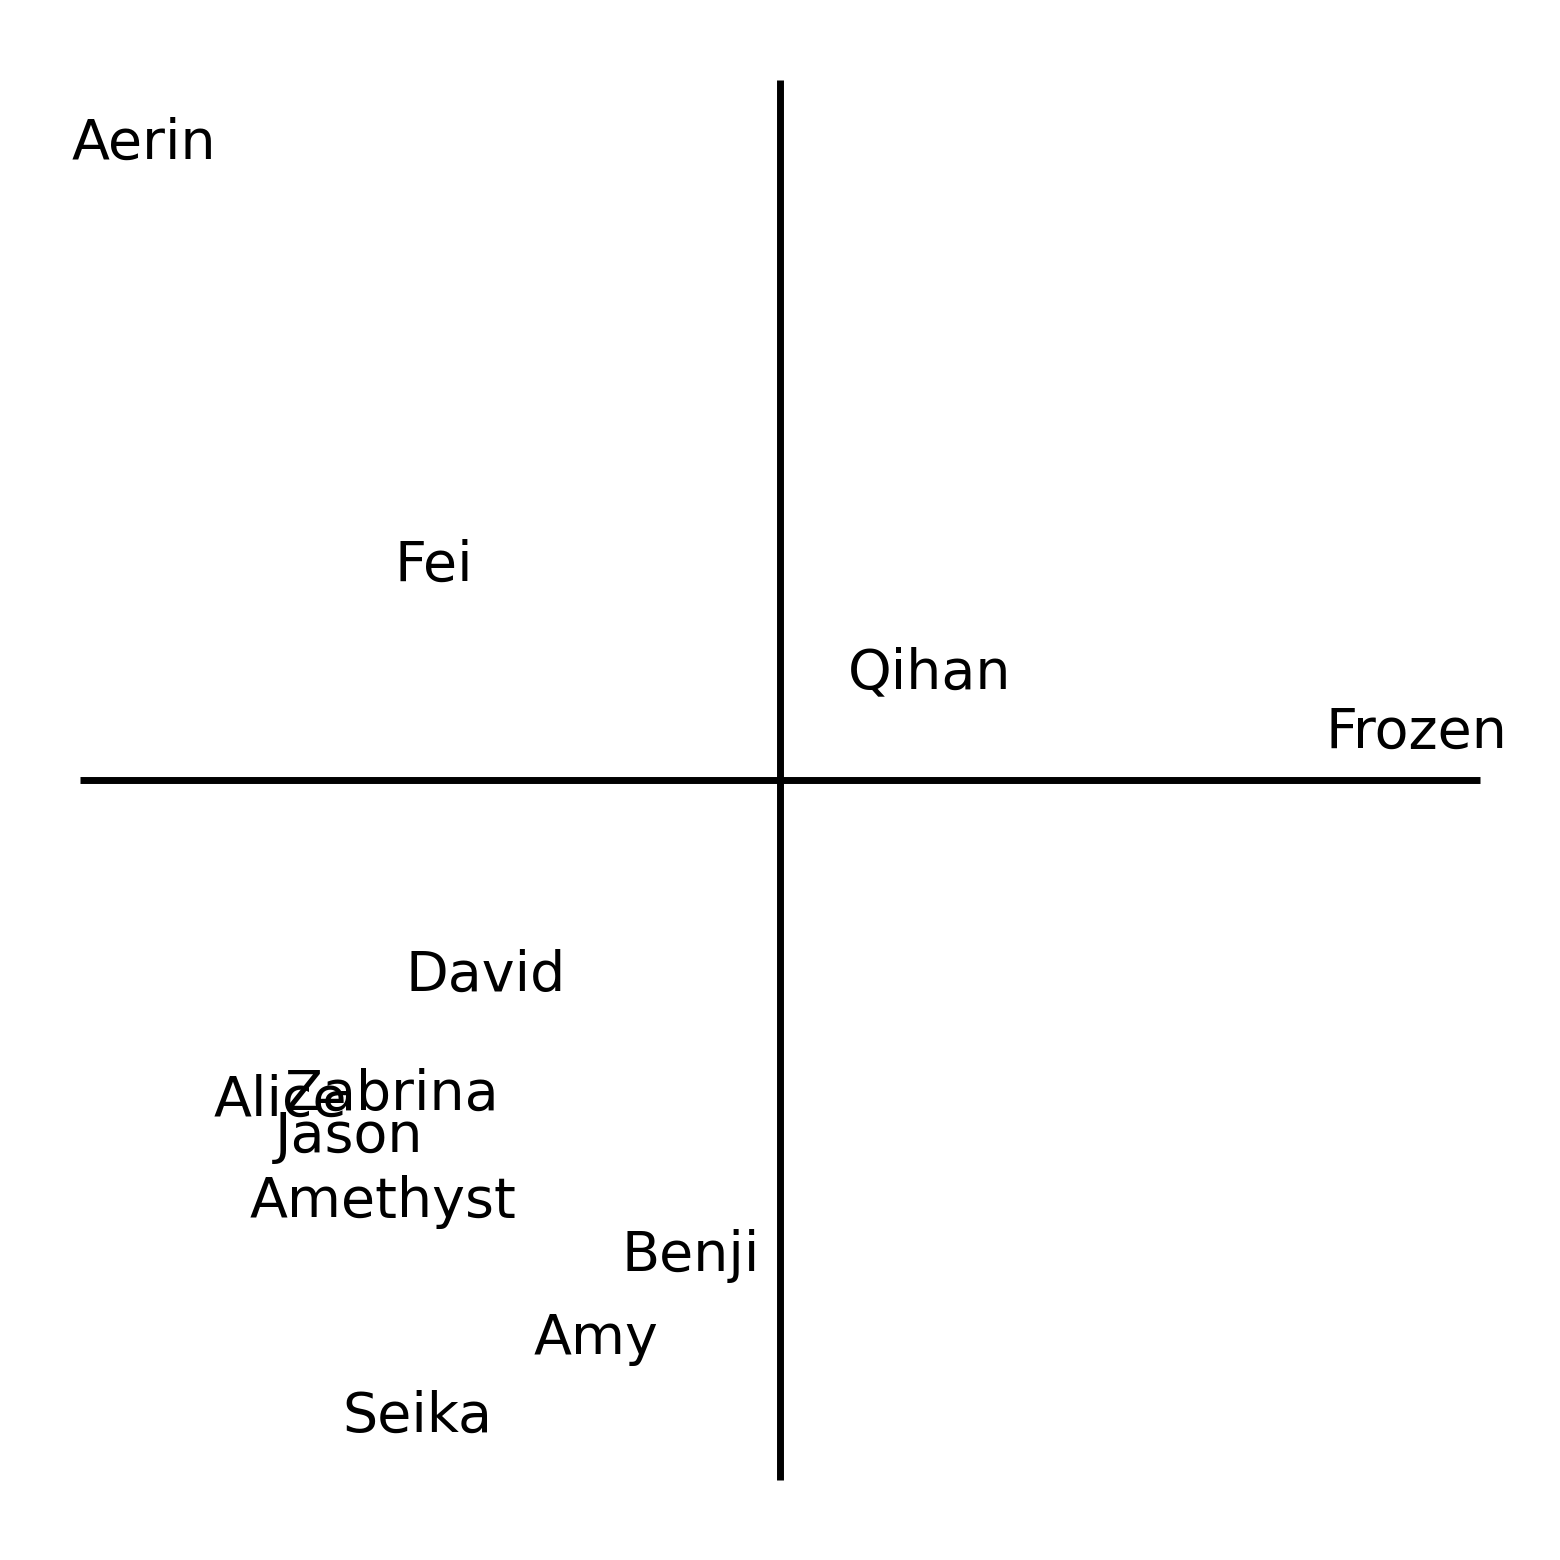

In [ ]:
plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)

for curr_row_num in range(len(pdf_rank_agg_by_rater)):

  curr_row = pdf_rank_agg_by_rater.iloc[curr_row_num, :]
  plt.text(curr_row['Points_rescaled'], curr_row['Rank__abs_diff_from_Borda_rescaled'], curr_row['Responder'],
        size = 40,
        horizontalalignment='center',
        verticalalignment='center'
  )
  #print()

plt.hlines(0.5, -0.05, 1.05, linewidth = 5, color = 'black')
plt.vlines(0.5, -0.05, 1.05, linewidth = 5, color = 'black')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
ax.set_aspect('equal')
ax.axis('off')
plt.show()

# Taste similarity

In [ ]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  responder_list = list(pdf_rank_all_long['Responder'].unique())
  responder_combinations = list(itertools.combinations(responder_list, 2))

  pdf_all_pairs = None

  for curr_pair in responder_combinations:

    curr_pair_dict = {}
    responder_1 = curr_pair[0]
    responder_2 = curr_pair[1]

    pdf_curr_pair = pdf_rank_all_wide[['Character', f'{responder_1} Rank', f'{responder_2} Rank']]
    pdf_curr_pair['Square Diff'] = (pdf_curr_pair[f'{responder_2} Rank'] - pdf_curr_pair[f'{responder_1} Rank'])**2
    curr_euc_distance = np.sqrt(np.sum(np.array(pdf_curr_pair['Square Diff'])))

    curr_pair_dict['Responder 1'] = [responder_1]
    curr_pair_dict['Responder 2'] = [responder_2]
    curr_pair_dict['Euclidean Distance'] = [curr_euc_distance]

    pdf_curr_pair = pd.DataFrame(curr_pair_dict)

    if pdf_all_pairs is None:
      pdf_all_pairs = pdf_curr_pair.copy()
    else:
      pdf_all_pairs = pd.concat([pdf_all_pairs, pdf_curr_pair], axis = 0)

pdf_all_pairs = pdf_all_pairs.sort_values(by = 'Euclidean Distance').reset_index(drop = True)
pdf_all_pairs = pdf_all_pairs.reset_index(drop = True)
pdf_all_pairs

,Responder 1,Responder 2,Euclidean Distance
0,David,Alice,168.546729
1,Jason,Amy,194.221523
2,Qihan,Amethyst,210.394867
3,Qihan,Frozen,243.306391
4,Zabrina,Benji,244.196642
...,...,...,...
61,David,Qihan,315.746734
62,Frozen,Alice,319.946871
63,Aerin,Qihan,326.830231
64,David,Zabrina,328.624406


# Clustering

In [ ]:
# import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pdf_rank_wide_char = pdf_rank_heatmap.copy()
pdf_rank_wide_char.columns = pdf_rank_wide_char.columns.to_flat_index()
pdf_rank_wide_char = pdf_rank_wide_char.reset_index()

pdf_rank_wide_char

Character,Responder,Aether,Albedo,Alhaitham,Aloy,Amber,Arlecchino,Ayaka,Ayato,Baizhu,...,Xiao,Xingqiu,Xinyan,Yae,Yanfei,Yaoyao,Yelan,Yoimiya,Yun Jin,Zhongli
0,Aerin,2,1,1,1,1,1,3,2,3,...,3,2,3,3,1,2,2,3,4,3
1,Alice,1,3,4,1,1,3,1,1,2,...,3,2,3,1,1,1,2,2,4,4
2,Amethyst,1,1,2,1,2,1,1,2,3,...,2,2,2,5,4,1,5,4,2,3
3,Amy,1,5,4,1,2,4,3,4,2,...,5,2,1,3,2,2,3,3,2,5
4,Benji,3,1,3,1,1,5,3,2,3,...,3,2,2,3,4,2,4,3,2,5
5,David,1,2,3,1,3,4,2,2,4,...,4,2,4,3,2,2,3,4,3,4
6,Fei,1,1,4,1,3,4,5,3,1,...,4,2,1,3,2,1,3,3,2,3
7,Frozen,3,5,5,1,3,3,4,4,5,...,4,5,2,5,5,5,5,4,5,5
8,Jason,2,2,4,1,2,4,2,4,1,...,3,1,1,4,2,2,3,2,4,5
9,Qihan,3,4,3,2,3,3,2,2,1,...,3,3,3,5,3,3,4,4,3,3


In [ ]:
# Separating out the features
x_feature_vals = pdf_rank_wide_char.loc[:, 'Aether':'Zhongli'].values
id_vals = pdf_rank_wide_char.loc[:, ['Responder']].values
id_vals

# # Standardizing the features
# x_feature_vals = StandardScaler().fit_transform(x_feature_vals)

# Run the PCA
pca = PCA(n_components=0.95, svd_solver='full')
princomps = pca.fit_transform(x_feature_vals)
princomps
pdf_rank_princomps = pd.DataFrame(data = np.concatenate((id_vals, princomps[:, :3]),axis=1), columns = ['Responder', 'pc1', 'pc2', 'pc3'])
pdf_rank_princomps

,Responder,pc1,pc2,pc3
0,Aerin,-5.694736,-5.816115,3.674644
1,Alice,-6.24593,0.67733,2.805739
2,Amethyst,1.350743,-7.233901,-7.858827
3,Amy,-0.744257,7.999591,-2.963156
4,Benji,3.525404,-0.694565,-0.996986
5,David,-3.47637,-0.905061,4.517118
6,Fei,-2.329497,2.280022,3.169096
7,Frozen,12.873336,1.78407,4.149463
8,Jason,-4.65117,5.558772,-4.935586
9,Qihan,6.831721,-0.996169,-0.399949


Text(0.5, 1.0, 'Projection, first 2 Principal Components')

<Figure size 640x480 with 0 Axes>

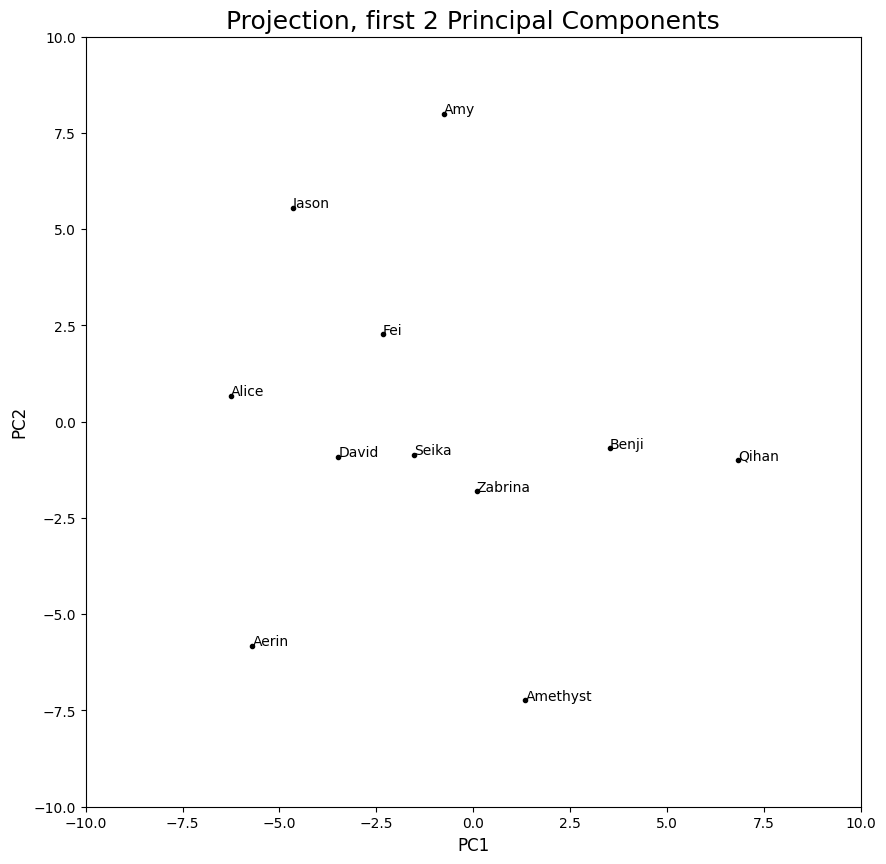

In [ ]:
plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# ax = plt.axes(projection='3d')

plt.plot(pdf_rank_princomps['pc1'], pdf_rank_princomps['pc2'], 'k.')
# ax.plot3D(pdf_rank_princomps['pc1'], pdf_rank_princomps['pc2'], pdf_rank_princomps['pc3'], 'k.');

for i in range(len(pdf_rank_princomps)):
    plt.annotate(pdf_rank_princomps['Responder'][i], (pdf_rank_princomps['pc1'][i], pdf_rank_princomps['pc2'][i]))

plt.xlabel('PC1', fontsize = 12)
plt.ylabel('PC2', fontsize = 12)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title('Projection, first 2 Principal Components', fontsize = 18)

In [ ]:
primcomp_components = np.transpose(pca.components_)
princomp_varianceratio = pca.explained_variance_ratio_

In [ ]:
pdf_components = pd.DataFrame(data = primcomp_components[:, :5], columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
pdf_components['Character'] = pdf_rank_wide_char.loc[:, 'Aether':'Zhongli'].columns
pdf_components

,pc1,pc2,pc3,pc4,pc5,Character
0,0.097433,-0.018250,0.018768,-0.040503,-0.167535,Aether
1,0.138314,0.192207,0.038259,0.147972,0.107615,Albedo
2,0.059344,0.203383,0.048830,0.051339,0.016061,Alhaitham
3,0.020363,-0.014250,-0.009636,-0.006969,0.035582,Aloy
4,0.065602,0.040766,0.035739,-0.017090,0.179189,Amber
...,...,...,...,...,...,...
81,0.150352,0.039651,0.083913,0.009828,-0.084483,Yaoyao
82,0.153696,-0.033630,-0.092101,0.014012,0.047327,Yelan
83,0.083439,-0.060098,0.022471,0.048579,0.097240,Yoimiya
84,0.025846,0.021876,0.118014,0.041843,-0.053379,Yun Jin


<Figure size 640x480 with 0 Axes>

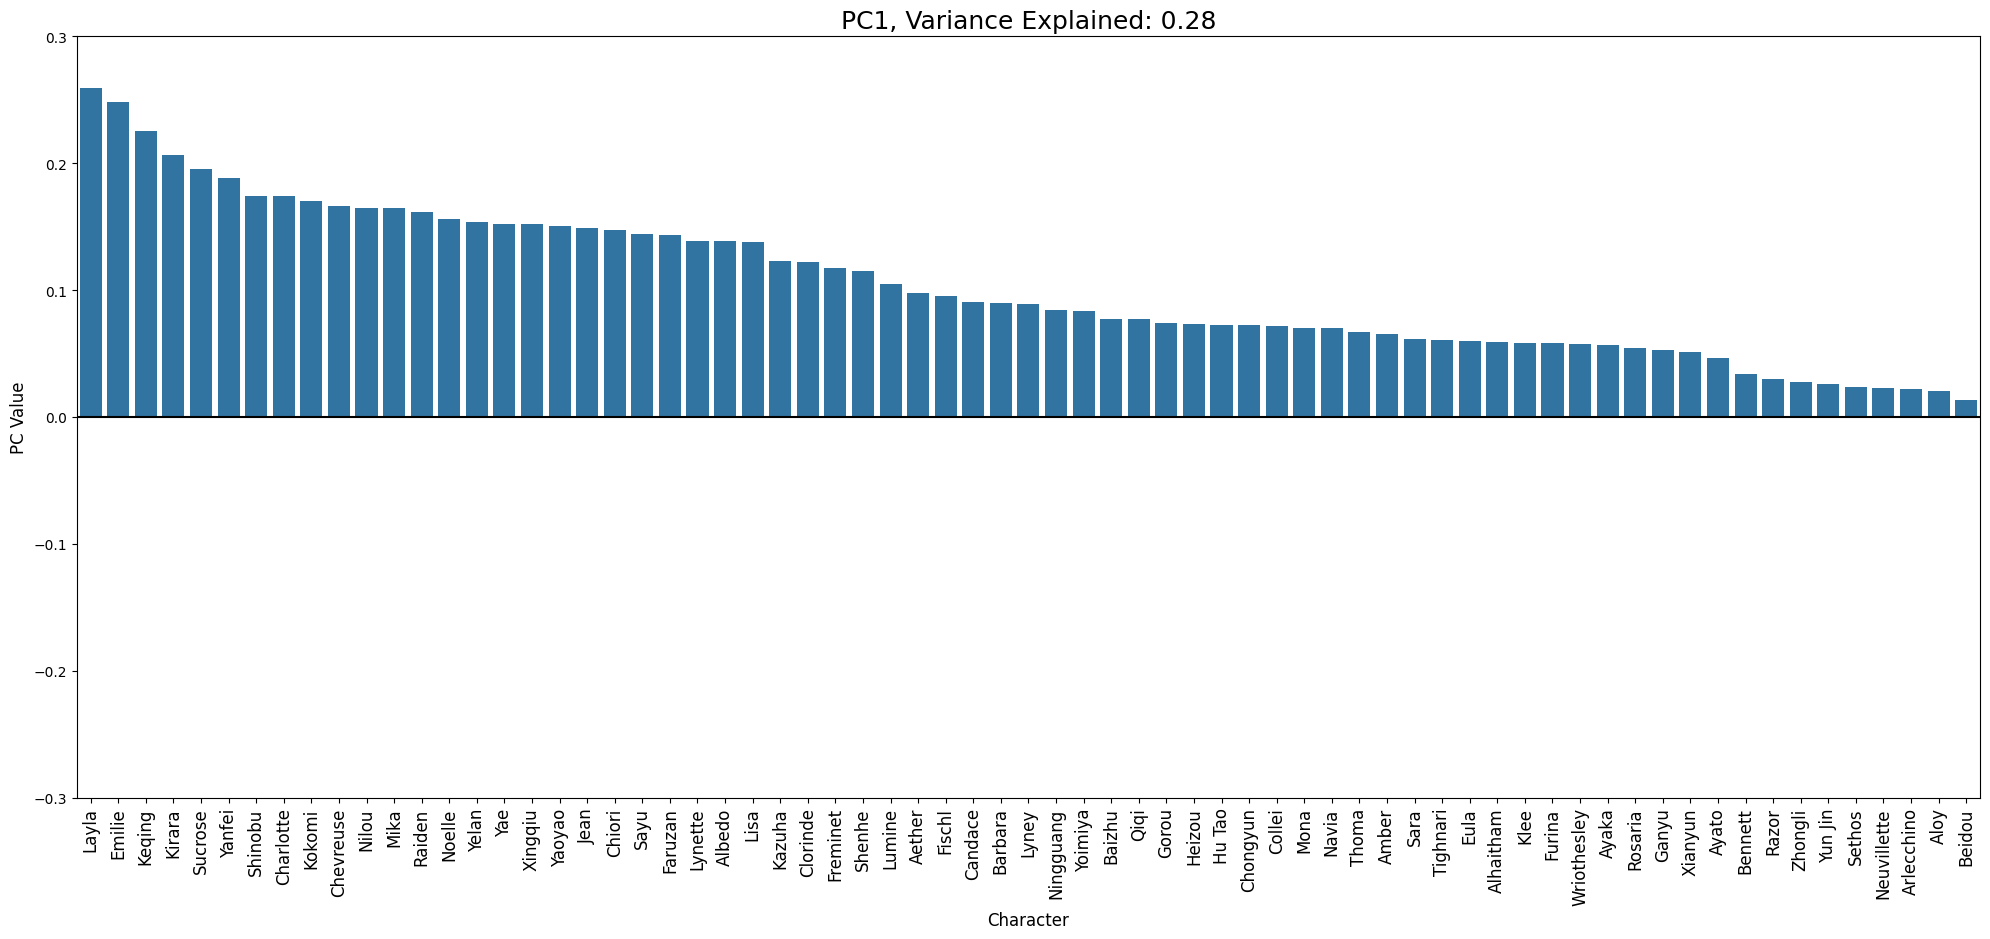

In [ ]:
num_comps = 1

plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(20, 9.5)

for curr_comp in range(1,num_comps+1):
  plt.subplot(num_comps,1,curr_comp)
  pdf_components = pdf_components.sort_values(by = [f'pc{curr_comp}'], ascending = [False])
  sns.barplot(pdf_components, x = 'Character', y = f'pc{curr_comp}')
  plt.xticks(fontsize=12, rotation=90)
  plt.xlabel('Character', fontsize = 12)
  plt.ylabel('PC Value', fontsize = 12)
  plt.ylim([-0.3, 0.3])
  plt.title('PC{:}, Variance Explained: {:.2}'.format(curr_comp, princomp_varianceratio[curr_comp-1]), fontsize = 18)
  plt.hlines(0, -1, 69, color = 'black')
  plt.xlim([-0.5, 68.5])
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

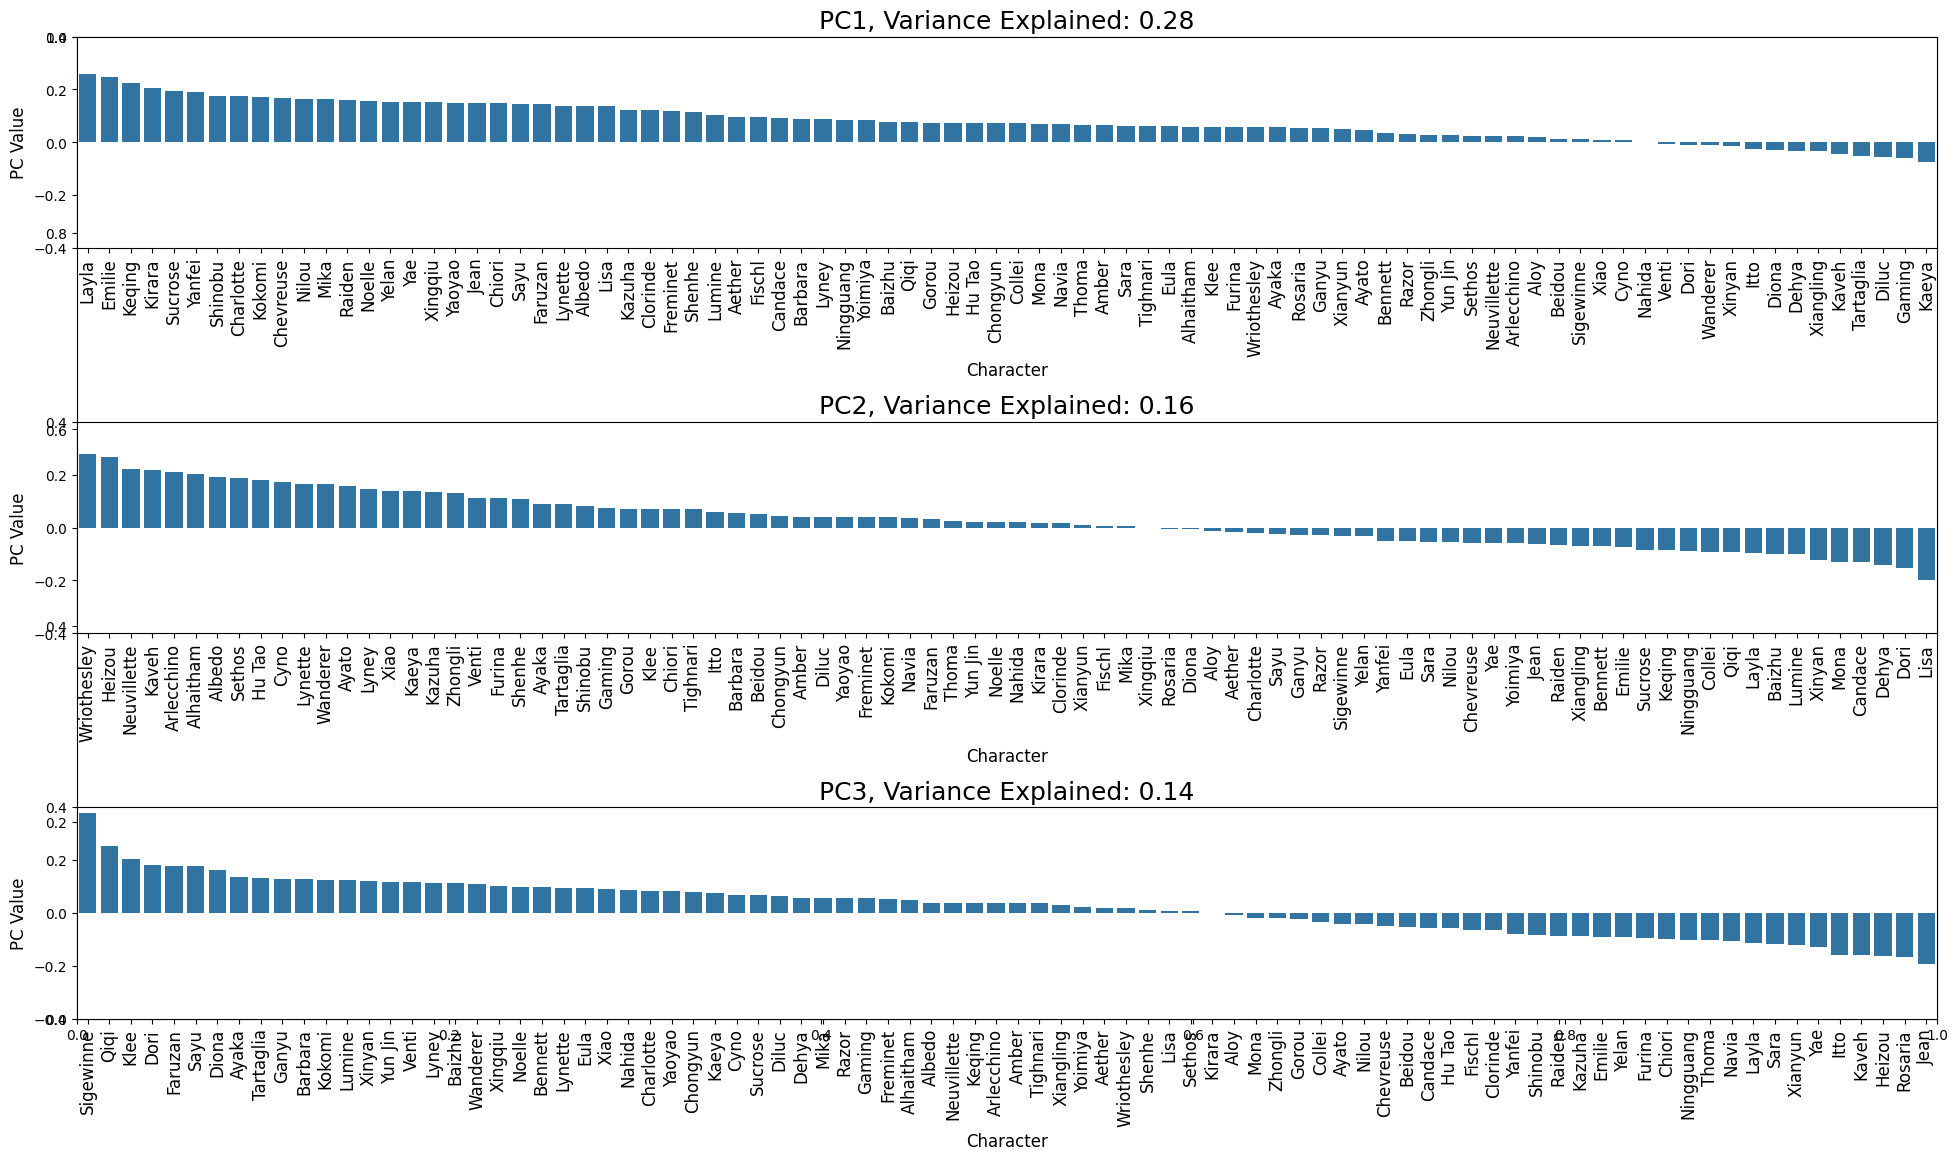

In [ ]:
num_comps = 3

plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(20, 4*num_comps)

for curr_comp in range(1,num_comps+1):
  plt.subplot(num_comps,1,curr_comp)
  pdf_components = pdf_components.sort_values(by = [f'pc{curr_comp}'], ascending = [False])
  sns.barplot(pdf_components, x = 'Character', y = f'pc{curr_comp}')
  plt.xticks(fontsize=12, rotation=90)
  plt.xlabel('Character', fontsize = 12)
  plt.ylabel('PC Value', fontsize = 12)
  plt.ylim([-0.4, 0.4])
  plt.title('PC{:}, Variance Explained: {:.2}'.format(curr_comp, princomp_varianceratio[curr_comp-1]), fontsize = 18)
plt.tight_layout()

# Previous years

## Load data

### 2021-2022

In [ ]:
sheet_id_2021 = '13am5LWLgg3_KfcC2cxYlq0-WeaTBbVW5Rlq6JwGJC5k'
sheet_id_2022 = '1CrhlCaVxEa1V9HcAl4ymWGrTZq6RY9JP42pUgQxieOU'

sheet_name_2021 = 'Rank'
sheet_name_tier_2021 = 'Tier'
sheet_name_2022 = 'Rank%20Order%20Data'
sheet_name_tier_2022 = 'Tier%20Data'

url_rank_2021 = f'https://docs.google.com/spreadsheets/d/{sheet_id_2021}/gviz/tq?tqx=out:csv&sheet={sheet_name_2021}'
url_rank_2022 = f'https://docs.google.com/spreadsheets/d/{sheet_id_2022}/gviz/tq?tqx=out:csv&sheet={sheet_name_2022}'
url_tier_2021 = f'https://docs.google.com/spreadsheets/d/{sheet_id_2021}/gviz/tq?tqx=out:csv&sheet={sheet_name_tier_2021}'
url_tier_2022 = f'https://docs.google.com/spreadsheets/d/{sheet_id_2022}/gviz/tq?tqx=out:csv&sheet={sheet_name_tier_2022}'


In [ ]:
pdf_rank_2021_raw = pd.read_csv(url_rank_2021)
pdf_rank_2022_raw = pd.read_csv(url_rank_2022)

pdf_tier_2021_raw = pd.read_csv(url_tier_2021)
pdf_tier_2022_raw = pd.read_csv(url_tier_2022)
pdf_tier_2022_raw

,Name,Frozen,Shoe,Jobo,Chloe,Amethyst,Zabrina,Amy,Jason,Hiro,...,Tivi,David,Qihan,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Aether,1,4,1,5,1,2,1,2,5,...,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albedo,4,4,1,4,1,4,4,2,5,...,5,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aloy,1,2,2,1,1,2,1,1,1,...,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amber,3,5,3,2,2,3,3,2,1,...,2,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ayaka,4,2,2,1,2,3,4,1,1,...,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Barbara,4,5,3,1,3,2,2,1,1,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Beidou,3,5,5,5,3,3,4,4,3,...,4,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bennett,1,3,1,3,1,3,2,1,5,...,2,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Chongyun,3,5,1,4,1,3,3,1,5,...,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Diluc,1,4,1,3,3,2,2,3,5,...,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2023

In [ ]:
sheet_id_2023 = '1VR9IRGKqCW_XQ4u9ZuJkuN2MUdT_gRuUE7n8rUSstFI'
sheet_name_2023 = 'Sheet1'
url_intermediate_2023 = f'https://docs.google.com/spreadsheets/d/{sheet_id_2023}/gviz/tq?tqx=out:csv&sheet={sheet_name_2023}'


In [ ]:
pdf_intermediate_2023_raw = pd.read_csv(url_intermediate_2023)
pdf_intermediate_2023_raw

list_all_responders_2023 = list(pdf_intermediate_2023_raw['Responder'].unique())

In [ ]:
list_all_responders_2022 = list(pdf_rank_2022_raw['Name'].unique())
list_all_responders_2021 = list(pdf_rank_2021_raw['Name'].unique())

## Rank data

### Edit dataframes

In [ ]:
pdf_rank_2021_edit = pdf_rank_2021_raw.copy()
pdf_rank_2022_edit = pdf_rank_2022_raw.loc[:, 'Name':'Qihan']

num_characters_2021 = len(pdf_rank_2021_edit)
num_characters_2022 = len(pdf_rank_2022_edit)

list_chars_2021 = list(pdf_rank_2021_edit['Name'].unique())
list_chars_2022 = list(pdf_rank_2022_edit['Name'].unique())

In [ ]:
pdf_rank_2023_edit = None

for curr_responder in list_all_responders_2023:
  pdf_curr_responder = pdf_intermediate_2023_raw[pdf_intermediate_2023_raw['Responder'] == curr_responder][['Character', 'Rank']].rename(columns = {'Rank' : curr_responder})
  if pdf_rank_2023_edit is None:
    pdf_rank_2023_edit = pdf_curr_responder.copy()
  else:
    pdf_rank_2023_edit = pdf_rank_2023_edit.merge(pdf_curr_responder, on = 'Character', how = 'outer')

pdf_rank_2023_edit = pdf_rank_2023_edit.rename(columns = {'Character' : 'Name'})

num_characters_2023 = len(pdf_rank_2023_edit)
list_chars_2023 = list(pdf_rank_2022_edit['Name'].unique())
list_chars_2023

['Aether',
 'Albedo',
 'Aloy',
 'Amber',
 'Ayaka',
 'Barbara',
 'Beidou',
 'Bennett',
 'Chongyun',
 'Diluc',
 'Diona',
 'Eula',
 'Fischl',
 'Ganyu',
 'Gorou',
 'Hu Tao',
 'Itto',
 'Jean',
 'Kaeya',
 'Kazuha',
 'Keqing',
 'Klee',
 'Kokomi',
 'Lisa',
 'Lumine',
 'Mona',
 'Ningguang',
 'Noelle',
 'Qiqi',
 'Raiden',
 'Razor',
 'Rosaria',
 'Sara',
 'Sayu',
 'Shenhe',
 'Sucrose',
 'Tartaglia',
 'Thoma',
 'Venti',
 'Xiangling',
 'Xiao',
 'Xingqiu',
 'Xinyan',
 'Yae',
 'Yanfei',
 'Yoimiya',
 'Yun Jin',
 'Zhongli']

### Borda

In [ ]:
dict_rank_years = {
    2021 : pdf_rank_2021_edit,
    2022 : pdf_rank_2022_edit,
    2023 : pdf_rank_2023_edit,
}

dict_numchars_years = {
    2021 : num_characters_2021,
    2022 : num_characters_2022,
    2023 : num_characters_2023,
}

dict_rank_long_years = {}

dict_borda_years = {}

In [ ]:
for curr_year in [2021, 2022, 2023]:

  pdf_rank_curr_edit = dict_rank_years[curr_year]
  num_characters_curr = dict_numchars_years[curr_year]

  pdf_rank_curr_long = pdf_rank_curr_edit.melt(id_vars = ['Name'])
  pdf_rank_curr_long = pdf_rank_curr_long.rename(columns = {'variable' : 'Responder', 'value' : 'Rank'})
  pdf_borda_curr = pdf_rank_curr_long.copy()
  pdf_borda_curr['Borda'] = num_characters_curr - pdf_borda_curr['Rank']
  pdf_borda_curr = pdf_borda_curr.groupby('Name').agg({'Borda' : 'sum'})
  pdf_borda_curr = pdf_borda_curr.reset_index()
  pdf_borda_curr = pdf_borda_curr.sort_values(by = ['Borda'], ascending = False).reset_index(drop = True)
  pdf_borda_curr['Borda Rank'] = pdf_borda_curr.index + 1
  pdf_borda_curr['Percentile'] = (num_characters_curr - pdf_borda_curr['Borda Rank']) / num_characters_curr * 100
  pdf_borda_curr['Year'] = curr_year

  dict_rank_long_years[curr_year] = pdf_rank_curr_long.copy()
  dict_borda_years[curr_year] = pdf_borda_curr.copy()

In [ ]:
pdf_borda_2024 = pdf_rank_all_long_agg[['Character', ('Borda', 'sum'), 'Borda Rank']]
pdf_borda_2024 = pdf_borda_2024.rename(columns = {'Character' : 'Name', ('Borda', 'sum') : 'Borda'})
pdf_borda_2024['Percentile'] = (num_characters - pdf_borda_2024['Borda Rank']) / num_characters * 100
pdf_borda_2024['Year'] = 2024
dict_borda_years[2024] = pdf_borda_2024.copy()

In [ ]:
dict_borda_years[2024]

,Name,Borda,Borda Rank,Percentile,Year
0,Nahida,903,1,98.837209,2024
1,Navia,850,2,97.674419,2024
2,Zhongli,843,3,96.511628,2024
3,Furina,834,4,95.348837,2024
4,Hu Tao,778,5,94.186047,2024
...,...,...,...,...,...
81,Freminet,278,82,4.651163,2024
82,Razor,211,83,3.488372,2024
83,Gorou,146,84,2.325581,2024
84,Mika,101,85,1.162791,2024


In [ ]:
pdf_changes = dict_borda_years[2024][['Name', 'Percentile']].rename(columns = {'Percentile' : 'Percentile_2024'}).merge(
    dict_borda_years[2023][['Name', 'Percentile']].rename(columns = {'Percentile' : 'Percentile_2023'}), on = ['Name'], how = 'outer'
).merge(
    dict_borda_years[2022][['Name', 'Percentile']].rename(columns = {'Percentile' : 'Percentile_2022'}), on = ['Name'], how = 'outer'
).merge(
    dict_borda_years[2021][['Name', 'Percentile']].rename(columns = {'Percentile' : 'Percentile_2021'}), on = ['Name'], how = 'outer'
)

for curr_year_old in [2021, 2022, 2023]:
  pdf_changes[f'Percentile_Change_2024-{curr_year_old}'] = pdf_changes[f'Percentile_2024'] - pdf_changes[f'Percentile_{curr_year_old}']

pdf_changes

,Name,Percentile_2024,Percentile_2023,Percentile_2022,Percentile_2021,Percentile_Change_2024-2021,Percentile_Change_2024-2022,Percentile_Change_2024-2023
0,Aether,9.302326,27.536232,27.083333,6.060606,3.241720,-17.781008,-18.233906
1,Albedo,44.186047,72.463768,77.083333,48.484848,-4.298802,-32.897287,-28.277722
2,Alhaitham,77.906977,91.304348,NaN,NaN,NaN,NaN,-13.397371
3,Aloy,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
4,Amber,25.581395,23.188406,39.583333,51.515152,-25.933756,-14.001938,2.392990
...,...,...,...,...,...,...,...,...
81,Yaoyao,13.953488,20.289855,NaN,NaN,NaN,NaN,-6.336367
82,Yelan,79.069767,88.405797,NaN,NaN,NaN,NaN,-9.336030
83,Yoimiya,72.093023,65.217391,16.666667,NaN,NaN,55.426357,6.875632
84,Yun Jin,69.767442,59.420290,72.916667,NaN,NaN,-3.149225,10.347152


## Tier data

### Edit dataframes

In [ ]:
pdf_tier_2021_edit = pdf_tier_2021_raw.copy()
pdf_tier_2022_edit = pdf_tier_2022_raw.loc[:, 'Name':'Qihan']

pdf_tier_2022_edit

,Name,Frozen,Shoe,Jobo,Chloe,Amethyst,Zabrina,Amy,Jason,Hiro,Guilty,Alice,Seika,John,Tivi,David,Qihan
0,Aether,1,4,1,5,1,2,1,2,5,4,1,2,2,3,1,3
1,Albedo,4,4,1,4,1,4,4,2,5,5,3,2,3,5,3,3
2,Aloy,1,2,2,1,1,2,1,1,1,1,1,1,1,1,1,2
3,Amber,3,5,3,2,2,3,3,2,1,3,2,3,2,2,3,3
4,Ayaka,4,2,2,1,2,3,4,1,1,1,1,4,3,3,2,2
5,Barbara,4,5,3,1,3,2,2,1,1,4,1,2,3,2,2,2
6,Beidou,3,5,5,5,3,3,4,4,3,5,4,4,4,4,4,3
7,Bennett,1,3,1,3,1,3,2,1,5,3,2,3,5,2,3,3
8,Chongyun,3,5,1,4,1,3,3,1,5,4,4,1,5,1,2,3
9,Diluc,1,4,1,3,3,2,2,3,5,3,2,3,3,3,2,1


In [ ]:
pdf_tier_2023_edit = None

for curr_responder in list_all_responders_2023:
  pdf_curr_responder = pdf_intermediate_2023_raw[pdf_intermediate_2023_raw['Responder'] == curr_responder][['Character', 'Points']].rename(columns = {'Points' : curr_responder})
  if pdf_tier_2023_edit is None:
    pdf_tier_2023_edit = pdf_curr_responder.copy()
  else:
    pdf_tier_2023_edit = pdf_tier_2023_edit.merge(pdf_curr_responder, on = 'Character', how = 'outer')

pdf_tier_2023_edit = pdf_tier_2023_edit.rename(columns = {'Character' : 'Name'})
pdf_tier_2023_edit

,Name,David,Shoe,Jason,Seika,FrOzEn,Amethyst,Chloe,Hiro,Amy,Alice,Zabrina,Erin
0,Aether,1,5,2,2,2,1,4,4,1,1,2,2
1,Albedo,3,3,2,2,5,1,4,4,5,3,4,1
2,Alhaitham,3,4,4,4,4,2,4,5,4,4,3,2
3,Aloy,1,1,1,2,1,1,1,1,1,1,2,1
4,Amber,3,4,2,3,2,2,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Yaoyao,3,3,2,3,4,2,2,2,2,2,2,4
65,Yelan,3,5,3,2,4,5,4,3,3,2,4,3
66,Yoimiya,4,5,2,4,3,3,3,1,3,1,2,4
67,Yun Jin,3,5,4,2,5,2,2,3,2,4,2,3


### Tier aggregates

In [ ]:
dict_tier_years = {
    2021 : pdf_tier_2021_edit,
    2022 : pdf_tier_2022_edit,
    2023 : pdf_tier_2023_edit,
}

dict_tier_agg_years = {}

In [ ]:
for curr_year in [2021, 2022, 2023]:

  pdf_tier_curr_edit = dict_tier_years[curr_year]
  pdf_tier_curr_agg = pdf_tier_curr_edit.melt(id_vars = 'Name').rename(columns = {'variable' : 'Rater', 'value' : 'Points'})
  pdf_tier_curr_agg = pdf_tier_curr_agg.groupby('Name').agg(
      {
          'Points' : ['mean', 'median']
      }
  )
  pdf_tier_curr_agg.columns = pdf_tier_curr_agg.columns.to_flat_index()
  pdf_tier_curr_agg = pdf_tier_curr_agg.reset_index()
  pdf_tier_curr_agg = pdf_tier_curr_agg.rename(columns = {
      'Name' : 'Character',
      ('Points', 'mean') : f'mean_points__{curr_year}',
      ('Points', 'median') : f'median_points__{curr_year}',
  })

  dict_tier_agg_years[curr_year] = pdf_tier_curr_agg.copy()

In [ ]:
pdf_tier_2024_agg = pdf_rank_all_long_agg.copy()
pdf_tier_2024_agg = pdf_tier_2024_agg[['Character', ('Points', 'mean'), ('Points', 'median')]]
pdf_tier_2024_agg = pdf_tier_2024_agg.rename(columns = {
    ('Points', 'mean') : 'mean_points__2024',
    ('Points', 'median') : 'median_points__2024',
})
dict_tier_agg_years[2024] = pdf_tier_2024_agg.copy()

In [ ]:
dict_tier_agg_years[2024]

,Character,mean_points__2024,median_points__2024
0,Nahida,4.333333,4.0
1,Navia,4.083333,4.0
2,Zhongli,4.083333,4.0
3,Furina,4.000000,4.0
4,Hu Tao,3.666667,3.5
...,...,...,...
81,Freminet,1.833333,2.0
82,Razor,1.500000,1.5
83,Gorou,1.500000,1.0
84,Mika,1.583333,1.0


In [ ]:
pdf_tier_agg_allyears = dict_tier_agg_years[2024].merge(
    dict_tier_agg_years[2023], on = 'Character', how = 'outer'
).merge(
    dict_tier_agg_years[2022], on = 'Character', how = 'outer'
).merge(
    dict_tier_agg_years[2021], on = 'Character', how = 'outer'
)

pdf_tier_agg_allyears

,Character,mean_points__2024,median_points__2024,mean_points__2023,median_points__2023,mean_points__2022,median_points__2022,mean_points__2021,median_points__2021
0,Aether,1.916667,2.0,2.250000,2.0,2.3750,2.0,2.2,2.0
1,Albedo,2.500000,2.0,3.083333,3.0,3.3125,3.5,2.6,2.5
2,Alhaitham,3.250000,3.5,3.583333,4.0,NaN,NaN,NaN,NaN
3,Aloy,1.166667,1.0,1.166667,1.0,1.2500,1.0,NaN,NaN
4,Amber,2.083333,2.0,2.083333,2.0,2.6250,3.0,2.7,2.5
...,...,...,...,...,...,...,...,...,...
81,Yaoyao,2.166667,2.0,2.583333,2.0,NaN,NaN,NaN,NaN
82,Yelan,3.250000,3.0,3.416667,3.0,NaN,NaN,NaN,NaN
83,Yoimiya,3.083333,3.0,2.916667,3.0,2.3750,2.0,NaN,NaN
84,Yun Jin,2.916667,2.5,3.083333,3.0,3.3750,3.0,NaN,NaN


## Rank charts

In [ ]:
pdf_years_long = pdf_changes[['Name', 'Percentile_2021', 'Percentile_2022', 'Percentile_2023', 'Percentile_2024']]
pdf_years_long = pdf_years_long.rename(columns = {
    'Percentile_2021' : '2021', 'Percentile_2022' : '2022', 'Percentile_2023' : '2023', 'Percentile_2024' : '2024'
})
pdf_years_long = pdf_years_long[pdf_years_long['2023'].notnull()]
pdf_years_long = pdf_years_long.melt(id_vars = 'Name')
pdf_years_long = pdf_years_long.rename(columns = {'Name' : 'Character', 'variable' : 'Year', 'value' : 'Percentile'})
pdf_years_long = pdf_years_long.merge(pdf_meta_edit, on = 'Character')

pdf_years_long

,Character,Year,Percentile,Body Type,Height,Gender,Affiliated Area,Vision,Rarity,Rarity 2,First Appears,Last Appears,Num Appearances,Unit Release Patch,Unit Release Year
0,Aether,2021,6.060606,Short Male,Short,Male,Outlander,Unknown,5,Outlander,1.0,NaN,NaN,NaN,2020
1,Albedo,2021,48.484848,Short Male,Short,Male,Mondstadt,Geo,5,Limited 5*,1.2,4.8,NaN,1.2,2020
2,Alhaitham,2021,NaN,Tall Male,Tall,Male,Sumeru,Dendro,5,Limited 5*,3.0,4.8,NaN,3.4,2023
3,Aloy,2021,NaN,Short Female,Short,Female,Outlander,Cryo,5,Outlander,NaN,NaN,NaN,NaN,2021
4,Amber,2021,51.515152,Short Female,Short,Female,Mondstadt,Pyro,4,4*,1.0,4.5,NaN,1.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Yaoyao,2024,13.953488,Child,Child,Female,Liyue,Dendro,4,4*,3.4,4.4,NaN,3.4,2023
272,Yelan,2024,79.069767,Tall Female,Tall,Female,Liyue,Hydro,5,Limited 5*,2.7,3.4,NaN,2.7,2022
273,Yoimiya,2024,72.093023,Short Female,Short,Female,Inazuma,Pyro,5,Limited 5*,2.0,4.6,NaN,2.0,2021
274,Yun Jin,2024,69.767442,Short Female,Short,Female,Liyue,Geo,4,4*,2.4,3.4,NaN,2.4,2022


In [ ]:
element_palettes = {
  'Pyro' : 'Reds_r',
  'Electro' : 'PuRd_r',
  'Hydro' : 'Blues_r',
  'Dendro' : 'YlGn_r',
  'Anemo' : 'Greens_r',
  'Cryo' : 'Greys_r',
  'Geo' : 'Oranges_r',
}

In [ ]:
# pdf_temp_recent_year = pdf_years_long_filt[pdf_years_long_filt['Year'] == '2024']
# pdf_temp_recent_year = pdf_temp_recent_year[['Character', 'Percentile']]
# pdf_temp_recent_year = pdf_temp_recent_year.rename(columns = {'Percentile' : 'TempRecentRank'})
# pdf_temp_recent_year = pdf_temp_recent_year.sort_values(by = ['TempRecentRank'], ascending = False).reset_index(drop = True)
# pdf_temp_recent_year['TempRecentRank'] = pdf_temp_recent_year.index + 1


# pdf_temp_recent_year

<Figure size 640x480 with 0 Axes>

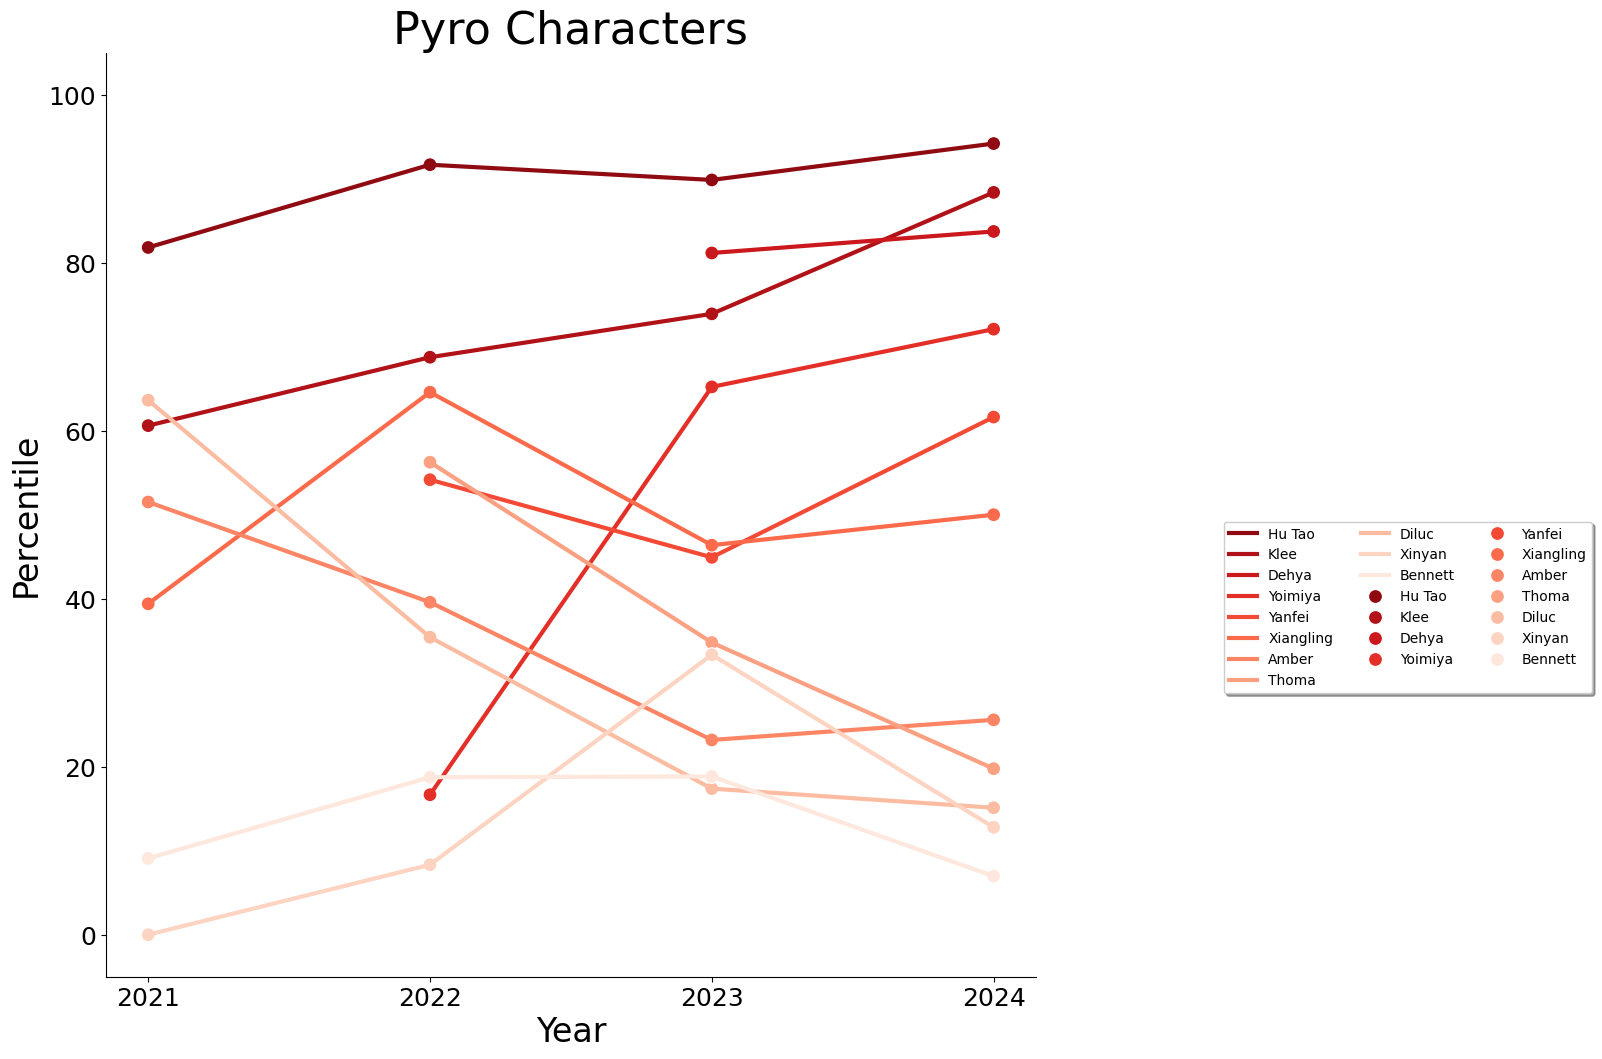

<Figure size 640x480 with 0 Axes>

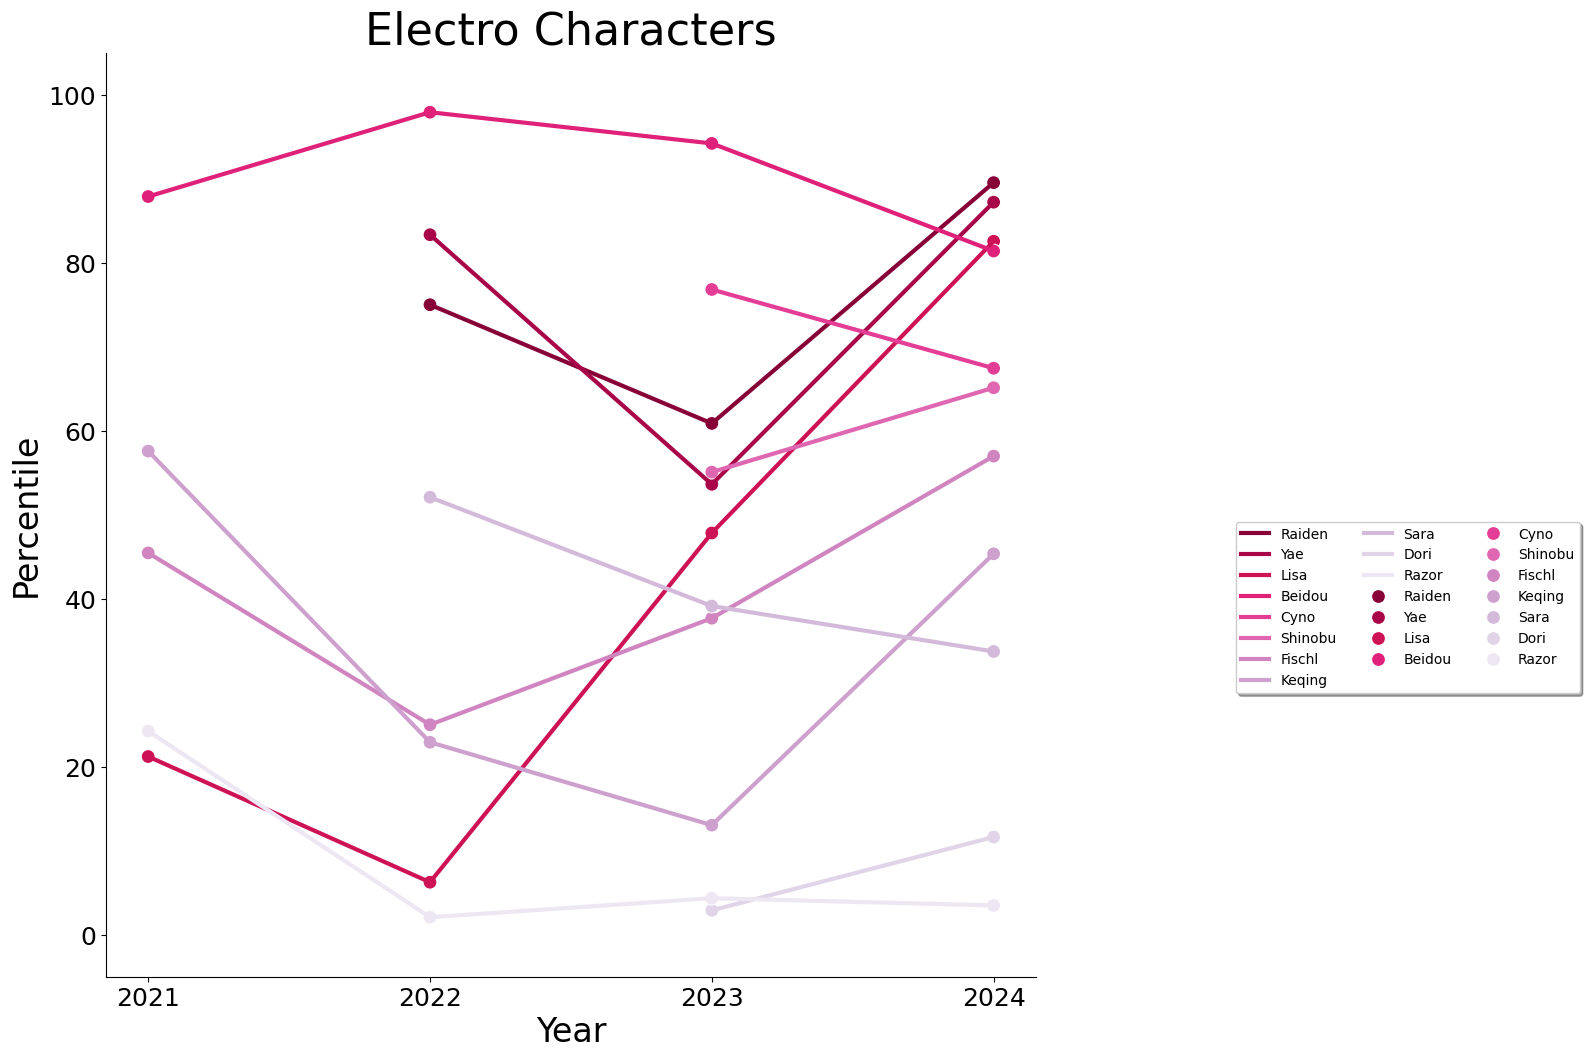

<Figure size 640x480 with 0 Axes>

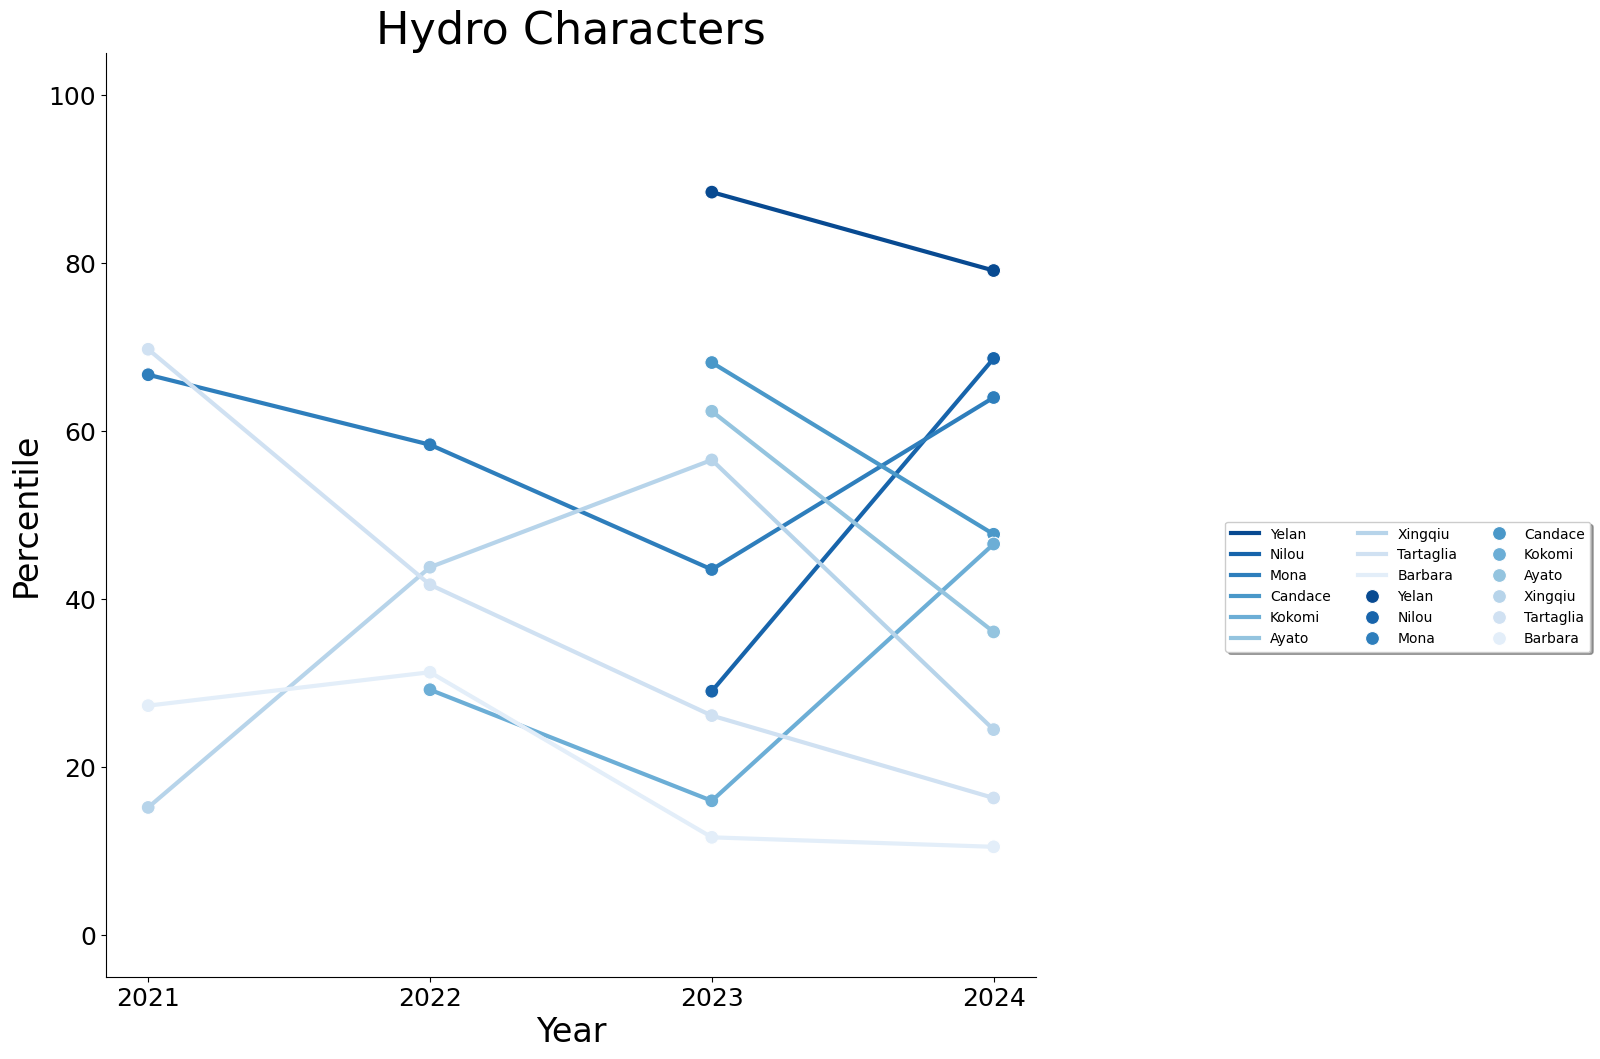

<Figure size 640x480 with 0 Axes>

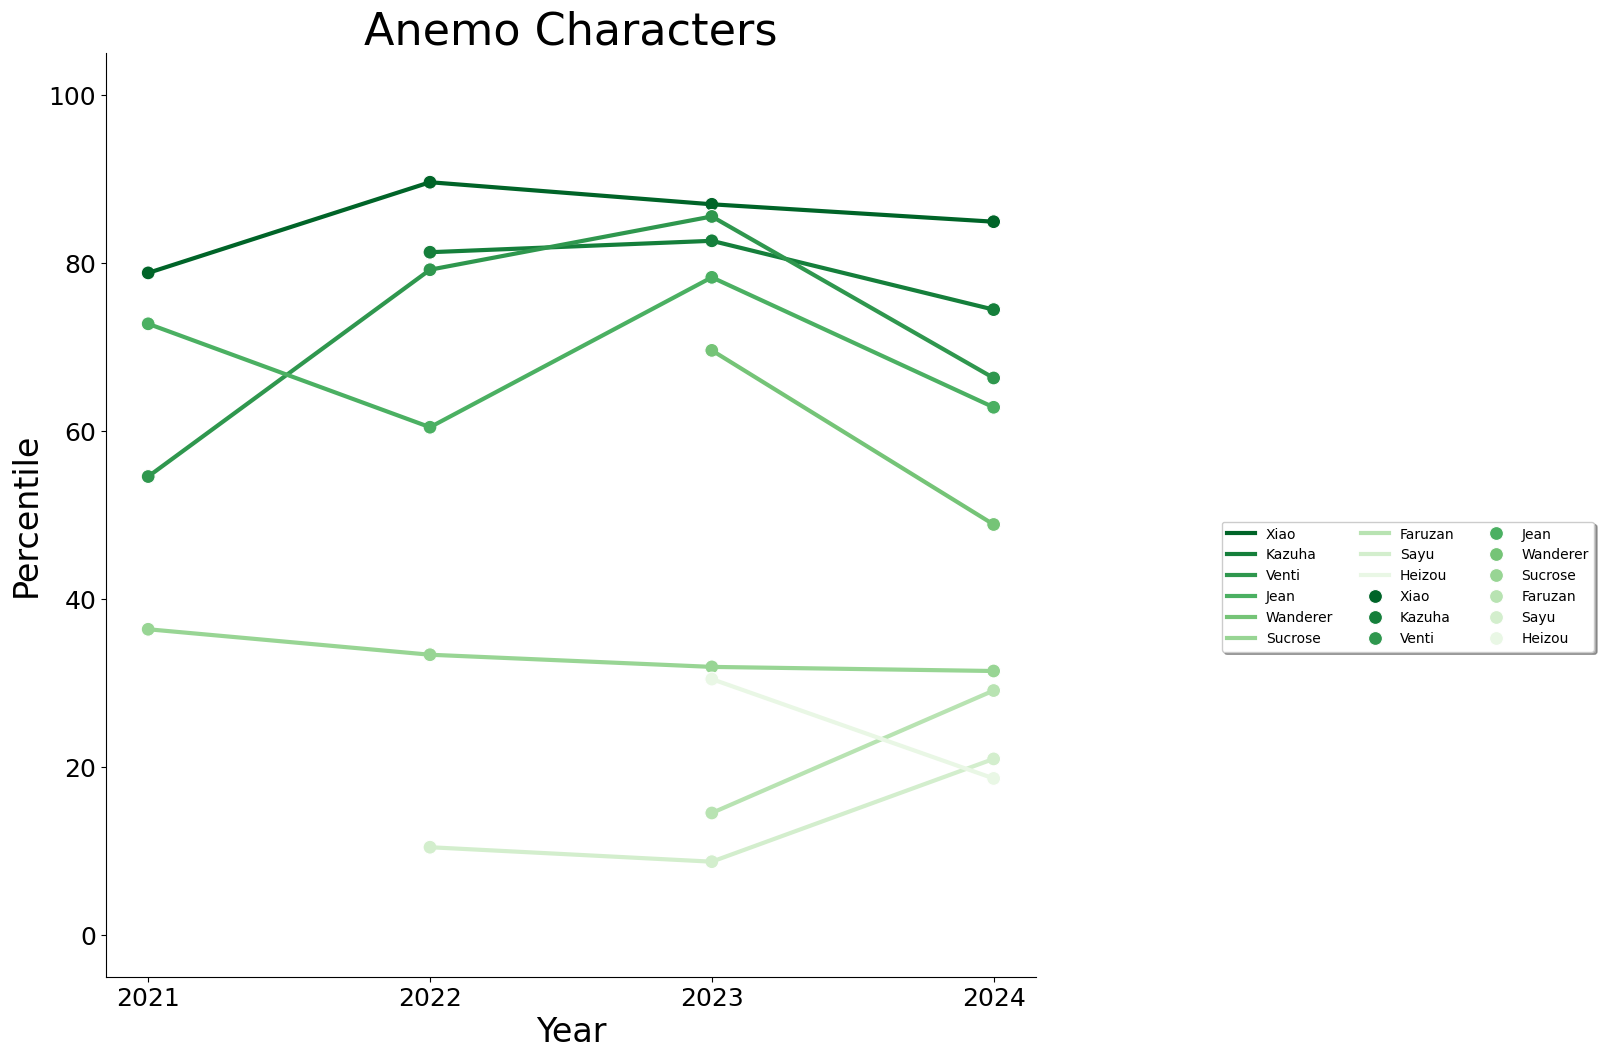

<Figure size 640x480 with 0 Axes>

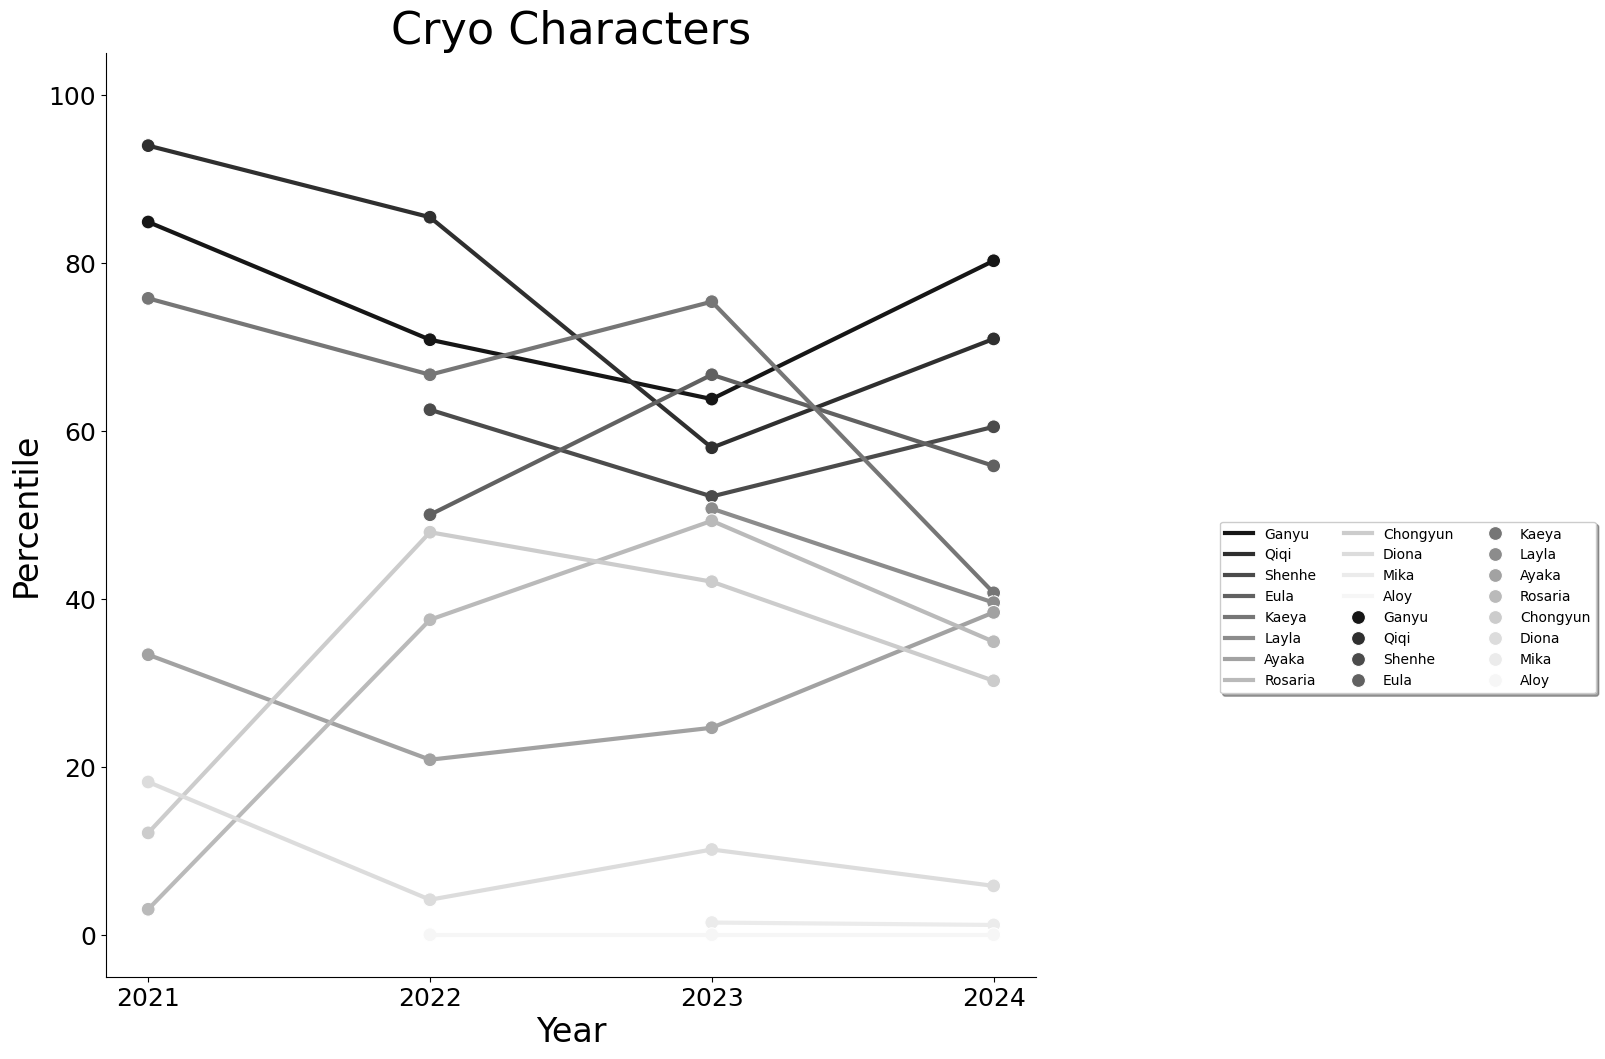

<Figure size 640x480 with 0 Axes>

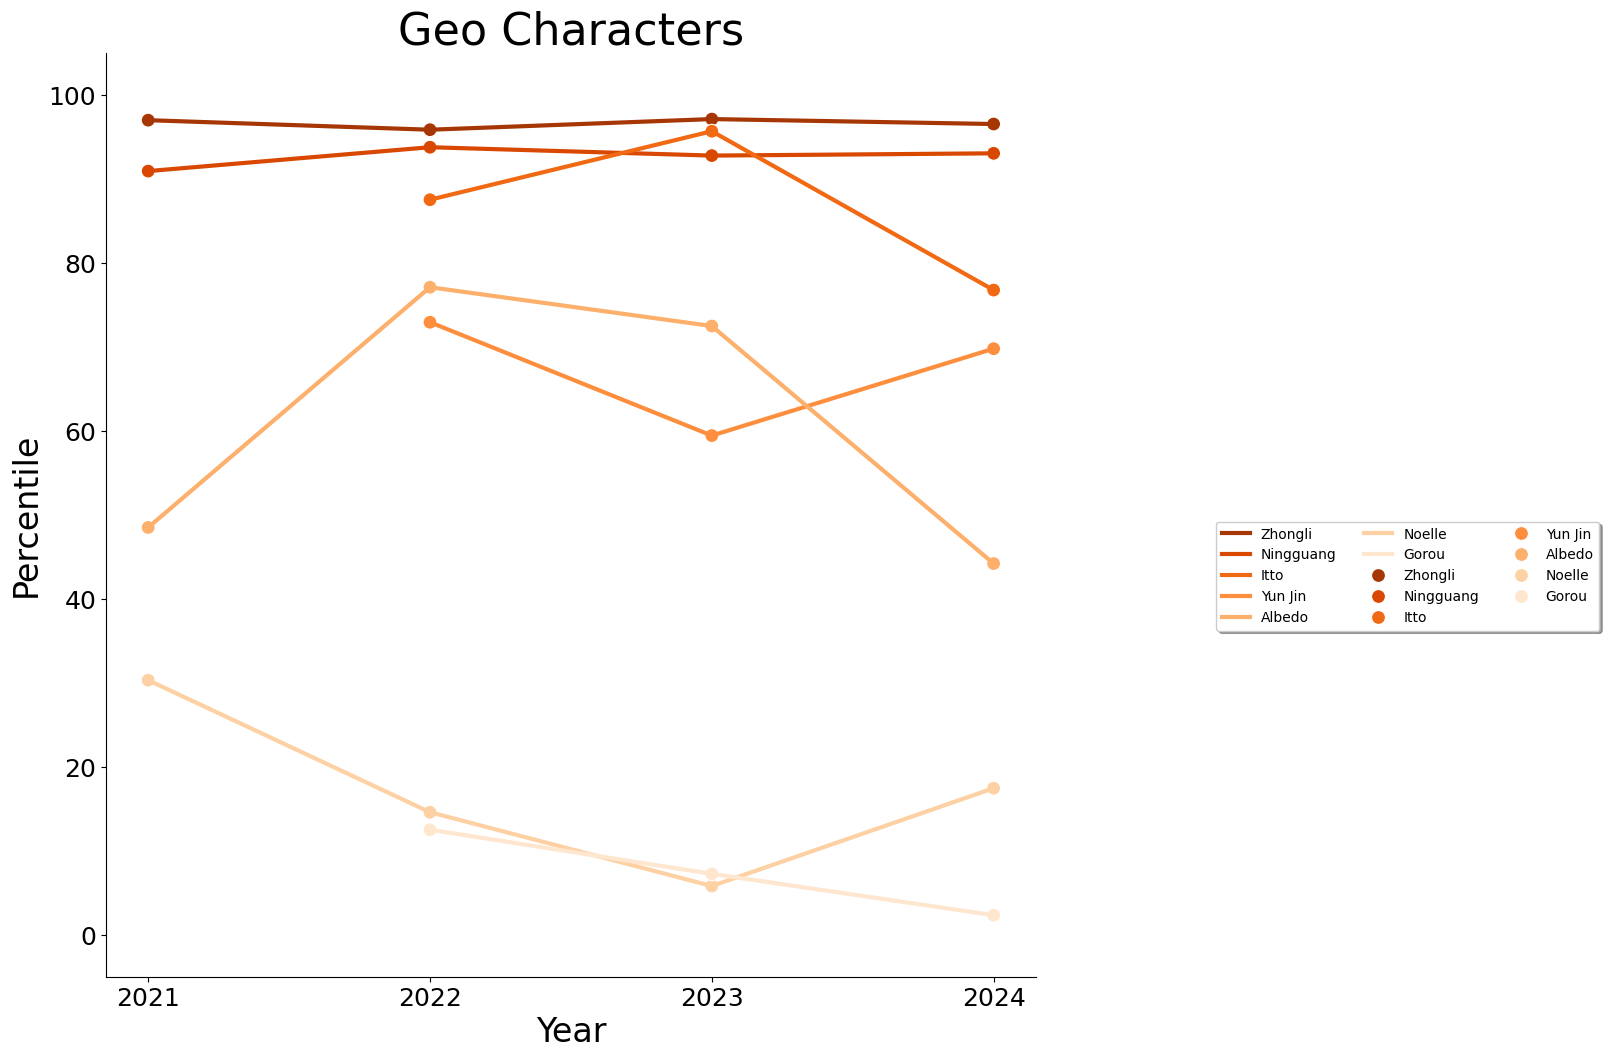

<Figure size 640x480 with 0 Axes>

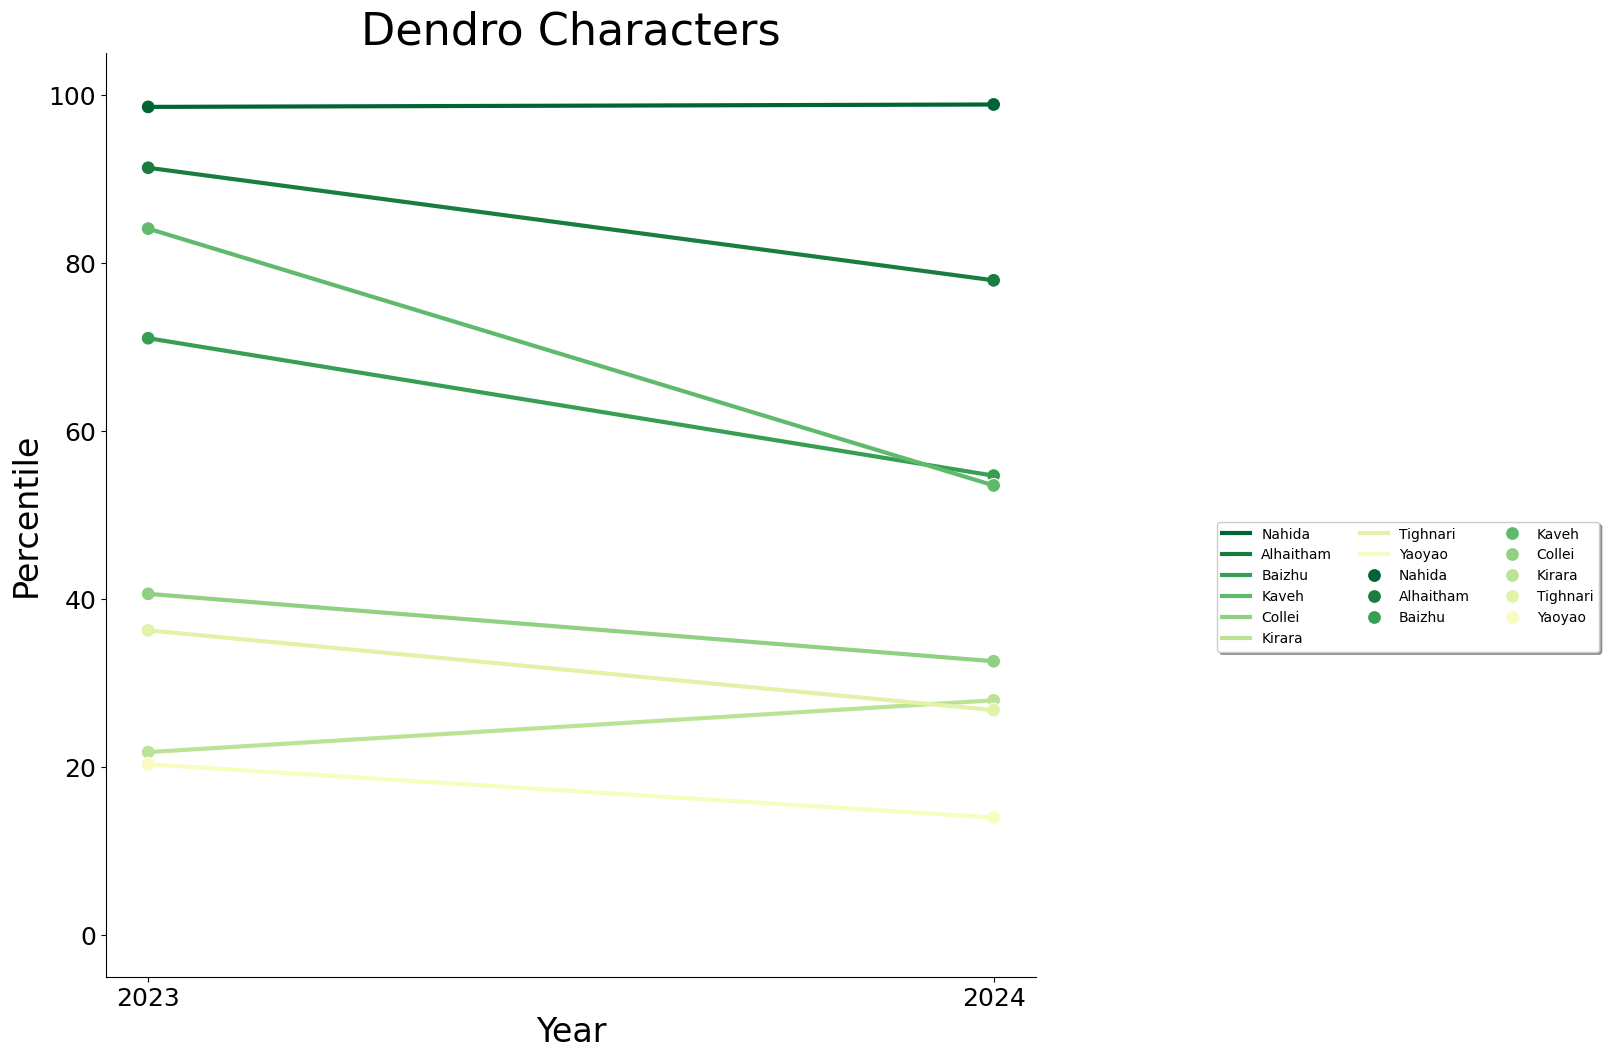

In [ ]:
for curr_element in ['Pyro', 'Electro', 'Hydro', 'Anemo', 'Cryo', 'Geo', 'Dendro']:

  plt.figure()
  fig, ax = plt.subplots()
  fig.set_size_inches(12, 12)

  pdf_years_long_filt = pdf_years_long[
      (pdf_years_long['Vision'] == curr_element)
  ]

  pdf_temp_recent_year = pdf_years_long_filt[pdf_years_long_filt['Year'] == '2024']
  pdf_temp_recent_year = pdf_temp_recent_year[['Character', 'Percentile']]
  pdf_temp_recent_year = pdf_temp_recent_year.rename(columns = {'Percentile' : 'TempRecentRank'})
  pdf_temp_recent_year = pdf_temp_recent_year.sort_values(by = ['TempRecentRank'], ascending = False).reset_index(drop = True)
  pdf_temp_recent_year['TempRecentRank'] = pdf_temp_recent_year.index + 1

  pdf_years_long_filt = pdf_years_long_filt.merge(pdf_temp_recent_year, on = 'Character', how = 'left')
  pdf_years_long_filt = pdf_years_long_filt.sort_values(by = ['TempRecentRank', 'Year'], ascending = [True, True]).reset_index(drop = True)

  sns.lineplot(
      pdf_years_long_filt, x = 'Year', y = 'Percentile', hue = 'Character',
      linewidth = 3, palette = element_palettes[curr_element]
  )
  sns.scatterplot(
      pdf_years_long_filt, x = 'Year', y = 'Percentile', hue = 'Character',
      s = 100, palette = element_palettes[curr_element]
  )
  ax.legend(loc='upper center', bbox_to_anchor=(1.4, 0.5),
            ncol=3, fancybox=True, shadow=True)

  plt.ylim([-5, 105])
  plt.xlabel('Year', size = 24)
  plt.ylabel('Percentile', size = 24)
  plt.xticks(fontsize=18, rotation=0)
  plt.yticks(fontsize=18, rotation=0)
  plt.title(f'{curr_element} Characters', size = 32)
  ax.spines[['right', 'top']].set_visible(False)

## Year changes

### Make responder-specific dataframes

In [ ]:
dict_rank_long_years_updated = {}

In [ ]:
for curr_year in [2021, 2022, 2023]:

  num_characters_curr = dict_numchars_years[curr_year]
  pdf_rank_curr_long = dict_rank_long_years[curr_year].copy()

  pdf_rank_curr_long['Percentile'] = (num_characters_curr - pdf_rank_curr_long['Rank']) / num_characters_curr * 100
  pdf_rank_curr_long = pdf_rank_curr_long.rename(
      columns = {
          'Name' : 'Character',
          'Rank' : f'Rank_{curr_year}',
          'Percentile' : f'Percentile_{curr_year}',
      }
  )
  pdf_rank_curr_long['Responder'] = pdf_rank_curr_long['Responder'].replace({'Yuhan' : 'Frozen'})
  pdf_rank_curr_long['Responder'] = pdf_rank_curr_long['Responder'].replace({'FrOzEn' : 'Frozen'})
  pdf_rank_curr_long['Responder'] = pdf_rank_curr_long['Responder'].replace({'Erin' : 'Aerin'})
  pdf_rank_curr_long

  dict_rank_long_years_updated[curr_year] = pdf_rank_curr_long.copy()

In [ ]:
dict_rank_long_years_updated[2022]

,Character,Responder,Rank_2022,Percentile_2022
0,Aether,Frozen,44,8.333333
1,Albedo,Frozen,15,68.750000
2,Aloy,Frozen,47,2.083333
3,Amber,Frozen,32,33.333333
4,Ayaka,Frozen,8,83.333333
...,...,...,...,...
763,Yae,Qihan,3,93.750000
764,Yanfei,Qihan,20,58.333333
765,Yoimiya,Qihan,13,72.916667
766,Yun Jin,Qihan,25,47.916667


In [ ]:
pdf_rank_2024_long = pdf_rank_all_long.copy()
pdf_rank_2024_long['Percentile'] = (num_characters - pdf_rank_2024_long['Rank']) / num_characters * 100
pdf_rank_2024_long = pdf_rank_2024_long[['Character', 'Responder', 'Rank', 'Percentile']]
pdf_rank_2024_long = pdf_rank_2024_long.rename(
    columns = {
        'Name' : 'Character',
        'Rank' : 'Rank_2024',
        'Percentile' : 'Percentile_2024',
    }
)
pdf_rank_2024_long['Responder'] = pdf_rank_2024_long['Responder'].replace({'FrOzEn' : 'Frozen'})
dict_rank_long_years_updated[2024] = pdf_rank_2024_long

pdf_rank_2024_long

,Character,Responder,Rank_2024,Percentile_2024
0,Aether,David,86,0.000000
1,Albedo,David,58,32.558140
2,Alhaitham,David,36,58.139535
3,Aloy,David,83,3.488372
4,Amber,David,33,61.627907
...,...,...,...,...
81,Yaoyao,Seika,33,61.627907
82,Yelan,Seika,66,23.255814
83,Yoimiya,Seika,27,68.604651
84,Yun Jin,Seika,54,37.209302


In [ ]:
pdf_rank_allyears_long = None

for curr_year in [2024, 2023, 2022, 2021]:

  if pdf_rank_allyears_long is None:
    pdf_rank_allyears_long = dict_rank_long_years_updated[curr_year].copy()
  else:
    pdf_rank_allyears_long = pdf_rank_allyears_long.merge(
        dict_rank_long_years_updated[curr_year], on = ['Character', 'Responder'], how = 'outer'
    )

pdf_rank_allyears_long

,Character,Responder,Rank_2024,Percentile_2024,Rank_2023,Percentile_2023,Rank_2022,Percentile_2022,Rank_2021,Percentile_2021
0,Aether,Aerin,32.0,62.790698,43.0,37.681159,NaN,NaN,NaN,NaN
1,Aether,Alice,85.0,1.162791,68.0,1.449275,39.0,18.750000,32.0,3.030303
2,Aether,Amethyst,61.0,29.069767,40.0,42.028986,36.0,25.000000,NaN,NaN
3,Aether,Amy,74.0,13.953488,57.0,17.391304,45.0,6.250000,25.0,24.242424
4,Aether,Benji,34.0,60.465116,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1426,Zhongli,Qihan,35.0,59.302326,NaN,NaN,38.0,20.833333,7.0,78.787879
1427,Zhongli,Seika,2.0,97.674419,2.0,97.101449,2.0,95.833333,2.0,93.939394
1428,Zhongli,Shoe,NaN,NaN,16.0,76.811594,14.0,70.833333,NaN,NaN
1429,Zhongli,Tivi,NaN,NaN,NaN,NaN,2.0,95.833333,NaN,NaN


### Make year dropoff

In [ ]:
pdf_responder_year_dropoff = pdf_rank_allyears_long.drop_duplicates(subset = ['Responder'])
pdf_responder_year_dropoff = pdf_responder_year_dropoff[['Responder', 'Rank_2024', 'Rank_2023', 'Rank_2022', 'Rank_2021']]

# prompt: Change the rows 'Rank_2024' through 'Rank_2021' such that value is 0 if the current value is NaN, and 1 if the current value is not NaN.
columns_to_check = ['Rank_2024', 'Rank_2023', 'Rank_2022', 'Rank_2021']
for col in columns_to_check:
  pdf_responder_year_dropoff[col] = pdf_responder_year_dropoff[col].apply(lambda x: 0 if pd.isna(x) else 1)
pdf_responder_year_dropoff = pdf_responder_year_dropoff.rename(columns = {'Rank_2024' : '2024', 'Rank_2023' : '2023', 'Rank_2022' : '2022', 'Rank_2021' : '2021'})
pdf_responder_year_dropoff = pdf_responder_year_dropoff[['Responder', '2021', '2022', '2023', '2024']]
pdf_responder_year_dropoff['Total Years Active'] = pdf_responder_year_dropoff.iloc[:, 1:].sum(axis=1)

pdf_responder_year_dropoff = pdf_responder_year_dropoff.sort_values(by = ['2021', '2022', '2023', 'Total Years Active', 'Responder'], ascending = [False, False, False, False, True]).reset_index(drop = True)

pdf_responder_year_dropoff

,Responder,2021,2022,2023,2024,Total Years Active
0,Alice,1,1,1,1,4
1,Amy,1,1,1,1,4
2,David,1,1,1,1,4
3,Frozen,1,1,1,1,4
4,Jason,1,1,1,1,4
5,Seika,1,1,1,1,4
6,Chloe,1,1,1,0,3
7,Qihan,1,1,0,1,3
8,Jobo,1,1,0,0,2
9,John,1,1,0,0,2


In [ ]:
# prompt: Modify the dataframe pdf_responder_year_dropoff such that going from left to right for the columns 2021, 2022, 2023, and 2024, if a value of 0 appears before a value of 1 has appeared in that row, the value should be set to -1 instead.

columns_to_modify = ['2021', '2022', '2023', '2024']

def modify_row(row):
  found_one = False
  for col in columns_to_modify:
    if not found_one and row[col] == 0:
      row[col] = -1
    elif row[col] == 1:
      found_one = True
  return row

pdf_responder_year_dropoff = pdf_responder_year_dropoff.apply(modify_row, axis=1)

pdf_responder_year_dropoff


,Responder,2021,2022,2023,2024,Total Years Active
0,Alice,1,1,1,1,4
1,Amy,1,1,1,1,4
2,David,1,1,1,1,4
3,Frozen,1,1,1,1,4
4,Jason,1,1,1,1,4
5,Seika,1,1,1,1,4
6,Chloe,1,1,1,0,3
7,Qihan,1,1,0,1,3
8,Jobo,1,1,0,0,2
9,John,1,1,0,0,2


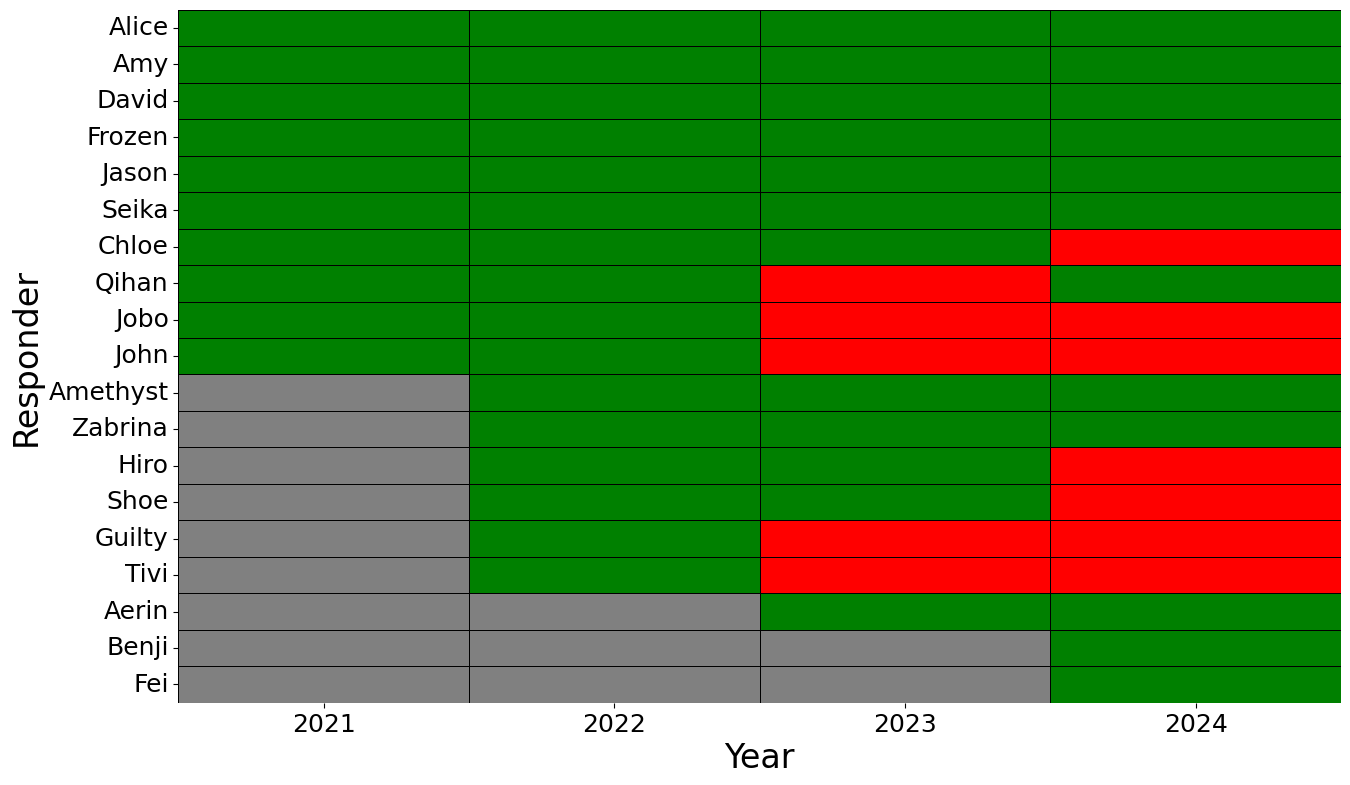

In [ ]:
# prompt: Make a heatmap plot of the dataframe pdf_responder_year_dropoff. The x-axis should be Responder and the y-axis should be the columns [2021, 2022, 2023, 2024]. Map the value -1 to black, 0, to green, and 0 to red.

plt.figure(figsize=(15, 9))
sns.heatmap(
    pdf_responder_year_dropoff.set_index('Responder')[columns_to_modify],
    cmap=['gray', 'red', 'green'],
    cbar=False,
    linewidths=.5,
    linecolor='black'
)

plt.xlabel('Year', size = 24)
plt.ylabel('Responder', size = 24)
# plt.title('Responder Attrition by Year', size = 28)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)

plt.show()

In [ ]:
# prompt: Set the x tick labels font size to 24

ax.set_xticklabels(ax.get_xticklabels(), fontsize=24)


/tmp/ipython-input-4177253800.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=24)


[Text(0, 0, '2021'),
 Text(1, 0, '2022'),
 Text(2, 0, '2023'),
 Text(3, 0, '2024')]

### Look at year-specific differences

In [ ]:
# prompt: Get all combinations of [2024, 2023, 2022, 2021], with the larger number as the first entry
import itertools

# Get all combinations of two distinct years
year_combinations = list(itertools.combinations([2024, 2023, 2022, 2021], 2))
year_combinations

[(2024, 2023),
 (2024, 2022),
 (2024, 2021),
 (2023, 2022),
 (2023, 2021),
 (2022, 2021)]

In [ ]:
# # prompt: # For each Responder in input_pdf, get the Character corresponding to that Responder's highest and lowest Percentile_Diff, and store that in a pandas dataframe.
# def GenerateExtremePercentileDiff(input_pdf):

#   # Initialize an empty list to store the results
#   results = []

#   # Iterate through each Responder in the filtered dataframe input_pdf
#   for responder in input_pdf['Responder'].unique():
#       # Filter input_pdf for the current Responder
#       df_responder = input_pdf[input_pdf['Responder'] == responder].copy()

#       # Find the character with the highest Percentile_Diff for the current Responder
#       highest_diff_char = df_responder.loc[df_responder['Percentile_Diff'].idxmax()]
#       highest_diff_character_name = highest_diff_char['Character']
#       highest_diff_value = highest_diff_char['Percentile_Diff']

#       # Find the character with the lowest Percentile_Diff for the current Responder
#       lowest_diff_char = df_responder.loc[df_responder['Percentile_Diff'].idxmin()]
#       lowest_diff_character_name = lowest_diff_char['Character']
#       lowest_diff_value = lowest_diff_char['Percentile_Diff']

#       # Append the results for the current Responder to the list
#       results.append({
#           'Responder': responder,
#           'Highest_Percentile_Diff_Character': highest_diff_character_name,
#           'Highest_Percentile_Diff': highest_diff_value,
#           'Lowest_Percentile_Diff_Character': lowest_diff_character_name,
#           'Lowest_Percentile_Diff': lowest_diff_value
#       })

#   # Create a pandas DataFrame from the results list
#   pdf_responder_diff_extremes = pd.DataFrame(results)

#   # Display the resulting DataFrame
#   return(pdf_responder_diff_extremes)

In [ ]:
# prompt: For each Responder in input_pdf, get the Character corresponding to that Responder's highest and lowest Percentile_Diff, and the lowest Abs_Percentile_Diff, and store that in a pandas dataframe.

def GenerateExtremePercentileDiff(input_pdf):
  """
  Finds the Character corresponding to the highest and lowest Percentile_Diff,
  and the lowest Abs_Percentile_Diff for each Responder in the input DataFrame.

  Args:
    input_pdf: A pandas DataFrame with at least 'Responder', 'Character',
               'Percentile_Diff', and 'Percentile_Abs_Diff' columns.

  Returns:
    A pandas DataFrame containing the extreme Percentile_Diffs and the lowest
    Abs_Percentile_Diff Character for each Responder.
  """
  results = []

  for responder in input_pdf['Responder'].unique():
    df_responder = input_pdf[input_pdf['Responder'] == responder].copy()

    if df_responder.empty:
      continue

    # Find the character with the highest Percentile_Diff
    highest_diff_row = df_responder.loc[df_responder['Percentile_Diff'].idxmax()]
    highest_diff_character_name = highest_diff_row['Character']
    highest_diff_value = highest_diff_row['Percentile_Diff']

    # Find the character with the lowest Percentile_Diff
    lowest_diff_row = df_responder.loc[df_responder['Percentile_Diff'].idxmin()]
    lowest_diff_character_name = lowest_diff_row['Character']
    lowest_diff_value = lowest_diff_row['Percentile_Diff']

    # Find the character with the lowest Abs_Percentile_Diff
    lowest_abs_diff_row = df_responder.loc[df_responder['Percentile_Abs_Diff'].idxmin()]
    lowest_abs_diff_character_name = lowest_abs_diff_row['Character']
    lowest_abs_diff_value = lowest_abs_diff_row['Percentile_Abs_Diff']


    results.append({
        'Responder': responder,
        'Highest_Percentile_Diff_Character': highest_diff_character_name,
        'Highest_Percentile_Diff': highest_diff_value,
        'Lowest_Percentile_Diff_Character': lowest_diff_character_name,
        'Lowest_Percentile_Diff': lowest_diff_value,
        'Lowest_Abs_Percentile_Diff_Character': lowest_abs_diff_character_name,
        'Lowest_Abs_Percentile_Diff': lowest_abs_diff_value
    })

  return pd.DataFrame(results)

In [ ]:
dict_year_change = {}
dict_year_change_extreme = {}
dict_year_change_agg = {}

with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  for curr_year_combo in year_combinations:

    year_new = curr_year_combo[0]
    year_old = curr_year_combo[1]

    pdf_diff_curr_combo = pdf_rank_allyears_long[
      pdf_rank_allyears_long[f'Rank_{year_new}'].notnull() &
      pdf_rank_allyears_long[f'Rank_{year_old}'].notnull()
    ]

    pdf_diff_curr_combo['Percentile_Diff'] = pdf_diff_curr_combo[f'Percentile_{year_new}'] - pdf_diff_curr_combo[f'Percentile_{year_old}']
    pdf_diff_curr_combo['Percentile_Abs_Diff'] = np.abs(pdf_diff_curr_combo['Percentile_Diff'])

    pdf_diff_extreme_curr_combo = GenerateExtremePercentileDiff(pdf_diff_curr_combo)

    pdf_diff_curr_combo_agg = pdf_diff_curr_combo.groupby('Responder').agg(
        {'Percentile_Abs_Diff' : ['mean', 'median']}
    )
    pdf_diff_curr_combo_agg

    dict_year_change[f'{year_new}-{year_old}'] = pdf_diff_curr_combo.copy()
    dict_year_change_extreme[f'{year_new}-{year_old}'] = pdf_diff_extreme_curr_combo.copy()
    dict_year_change_agg[f'{year_new}-{year_old}'] = pdf_diff_curr_combo_agg.copy()

#### Display

In [ ]:
curr_year_change_str = '2024-2021'

In [ ]:
dict_year_change[curr_year_change_str]

,Character,Responder,Rank_2024,Percentile_2024,Rank_2023,Percentile_2023,Rank_2022,Percentile_2022,Rank_2021,Percentile_2021,Percentile_Diff,Percentile_Abs_Diff
1,Aether,Alice,85.0,1.162791,68.0,1.449275,39.0,18.750000,32.0,3.030303,-1.867512,1.867512
3,Aether,Amy,74.0,13.953488,57.0,17.391304,45.0,6.250000,25.0,24.242424,-10.288936,10.288936
6,Aether,David,86.0,0.000000,69.0,0.000000,48.0,0.000000,33.0,0.000000,0.000000,0.000000
8,Aether,Frozen,61.0,29.069767,54.0,21.739130,44.0,8.333333,27.0,18.181818,10.887949,10.887949
11,Aether,Jason,50.0,41.860465,38.0,44.927536,26.0,45.833333,16.0,51.515152,-9.654686,9.654686
...,...,...,...,...,...,...,...,...,...,...,...,...
1418,Zhongli,David,11.0,87.209302,5.0,92.753623,3.0,93.750000,2.0,93.939394,-6.730092,6.730092
1420,Zhongli,Frozen,29.0,66.279070,48.0,30.434783,28.0,41.666667,10.0,69.696970,-3.417900,3.417900
1423,Zhongli,Jason,1.0,98.837209,1.0,98.550725,1.0,97.916667,1.0,96.969697,1.867512,1.867512
1426,Zhongli,Qihan,35.0,59.302326,NaN,NaN,38.0,20.833333,7.0,78.787879,-19.485553,19.485553


In [ ]:
dict_year_change_extreme[curr_year_change_str]

,Responder,Highest_Percentile_Diff_Character,Highest_Percentile_Diff,Lowest_Percentile_Diff_Character,Lowest_Percentile_Diff,Lowest_Abs_Percentile_Diff_Character,Lowest_Abs_Percentile_Diff
0,Alice,Klee,66.701903,Razor,-43.410853,Diluc,0.317125
1,Amy,Venti,57.857646,Keqing,-73.678647,Bennett,0.211416
2,David,Xiao,67.406624,Razor,-69.943622,Aether,0.000000
3,Frozen,Venti,33.227625,Diona,-49.436223,Noelle,0.810430
4,Jason,Rosaria,42.917548,Keqing,-57.117689,Diona,0.246653
5,Qihan,Aether,18.992248,Ayaka,-72.057787,Tartaglia,0.000000
6,Seika,Hu Tao,58.809020,Chongyun,-27.061311,Ningguang,0.880902


In [ ]:
dict_year_change_agg[curr_year_change_str]

Percentile_Abs_Diff           
                         mean     median
Responder                               
Alice               18.553399  12.226920
Amy                 29.781963  29.633545
David               25.083819  21.035941
Frozen              11.836120   7.434813
Jason               14.568518  11.627907
Qihan               11.059859   7.470049
Seika               16.416811  12.966878

## Controlled tier changes

In [ ]:
dict_tier_changes_2024_vs_prev = {}

curr_year = 2024
pdf_long_curr_year = dict_rank_long_years_updated[curr_year]
list_responders_curr_year = pdf_long_curr_year['Responder'].unique()
num_characters_curr_year = len(pdf_long_curr_year['Character'].unique())

for prev_year in [2021, 2022, 2023]:

  pdf_long_prev_year = dict_rank_long_years_updated[prev_year]
  list_responders_prev_year = pdf_long_prev_year['Responder'].unique()
  num_characters_prev_year = len(pdf_long_prev_year['Character'].unique())

  list_responders_intersection = list(set(list_responders_curr_year) & set(list_responders_prev_year))

  print(list_responders_intersection)

  pdf_long_curr_year_filt = pdf_long_curr_year[pdf_long_curr_year['Responder'].isin(list_responders_intersection)]
  pdf_long_prev_year_filt = pdf_long_prev_year[pdf_long_prev_year['Responder'].isin(list_responders_intersection)]
  users_curr_year_new = len(pdf_long_curr_year_filt['Responder'].unique())
  users_prev_year_new = len(pdf_long_prev_year_filt['Responder'].unique())
  print(f'{curr_year}: {users_curr_year_new}, {prev_year}: {users_prev_year_new}')

  # Calculate character rank for each responder
  pdf_long_curr_year_filt['Borda'] = num_characters_curr_year - pdf_long_curr_year_filt[f'Rank_{curr_year}']
  pdf_long_prev_year_filt['Borda'] = num_characters_prev_year - pdf_long_prev_year_filt[f'Rank_{prev_year}']

  # Aggregate Borda sum (curr year)
  pdf_curr_year_filt_agg = pdf_long_curr_year_filt.groupby('Character').agg({'Borda' : 'sum'}).reset_index()
  pdf_curr_year_filt_agg = pdf_curr_year_filt_agg.sort_values(by = ['Borda'], ascending = False).reset_index(drop = True)
  pdf_curr_year_filt_agg[f'Borda Rank {curr_year}'] = pdf_curr_year_filt_agg.index + 1
  pdf_curr_year_filt_agg[f'Percentile {curr_year}'] = (num_characters_curr_year - pdf_curr_year_filt_agg[f'Borda Rank {curr_year}']) / num_characters_curr_year * 100
  pdf_curr_year_filt_agg = pdf_curr_year_filt_agg.rename(columns = {'Borda' : f'Borda {curr_year}'})

  # Aggregate Borda sum (prev year)
  pdf_prev_year_filt_agg = pdf_long_prev_year_filt.groupby('Character').agg({'Borda' : 'sum'}).reset_index()
  pdf_prev_year_filt_agg = pdf_prev_year_filt_agg.sort_values(by = ['Borda'], ascending = False).reset_index(drop = True)
  pdf_prev_year_filt_agg[f'Borda Rank {prev_year}'] = pdf_prev_year_filt_agg.index + 1
  pdf_prev_year_filt_agg[f'Percentile {prev_year}'] = (num_characters_prev_year - pdf_prev_year_filt_agg[f'Borda Rank {prev_year}']) / num_characters_prev_year * 100
  pdf_prev_year_filt_agg = pdf_prev_year_filt_agg.rename(columns = {'Borda' : f'Borda {prev_year}'})

  # Merge characters
  pdf_borda_merged_both_years = pdf_curr_year_filt_agg.merge(pdf_prev_year_filt_agg, on = 'Character', how = 'inner')
  pdf_borda_merged_both_years[f'Percentile Diff {curr_year}-{prev_year}'] = pdf_borda_merged_both_years[f'Percentile {curr_year}'] - pdf_borda_merged_both_years[f'Percentile {prev_year}']

  # Add to dict
  dict_tier_changes_2024_vs_prev[prev_year] = pdf_borda_merged_both_years.copy()

['Seika', 'Amy', 'Qihan', 'Alice', 'Jason', 'David', 'Frozen']
2024: 7, 2021: 7
['Amethyst', 'Seika', 'Zabrina', 'Amy', 'Qihan', 'Alice', 'Jason', 'Frozen', 'David']
2024: 9, 2022: 9
['Amethyst', 'Seika', 'Amy', 'Zabrina', 'Aerin', 'Alice', 'Jason', 'Frozen', 'David']
2024: 9, 2023: 9


/tmp/ipython-input-2777513589.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_long_curr_year_filt['Borda'] = num_characters_curr_year - pdf_long_curr_year_filt[f'Rank_{curr_year}']
/tmp/ipython-input-2777513589.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_long_prev_year_filt['Borda'] = num_characters_prev_year - pdf_long_prev_year_filt[f'Rank_{prev_year}']
/tmp/ipython-input-2777513589.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [ ]:
dict_tier_changes_2024_vs_prev[2023]

,Character,Borda 2024,Borda Rank 2024,Percentile 2024,Borda 2023,Borda Rank 2023,Percentile 2023,Percentile Diff 2024-2023
0,Nahida,677,1,98.837209,516,1,98.550725,0.286485
1,Zhongli,657,2,97.674419,470,2,97.101449,0.572969
2,Hu Tao,585,7,91.860465,461,4,94.202899,-2.342433
3,Ningguang,578,8,90.697674,448,5,92.753623,-2.055949
4,Beidou,534,9,89.534884,419,8,88.405797,1.129087
...,...,...,...,...,...,...,...,...
64,Noelle,227,81,5.813953,181,63,8.695652,-2.881699
65,Razor,168,83,3.488372,141,65,5.797101,-2.308729
66,Gorou,114,84,2.325581,118,67,2.898551,-0.572969
67,Mika,59,85,1.162791,73,68,1.449275,-0.286485
